#**Final Project for Coursera's 'How to Win a Data Science Competition'**

**Optional Section - Description of Project Objectives, Inputs, Outputs**

Andreas Theodoulou and Michael Gaidis (April - May, 2020)

##**About this Competition**

You are provided with **daily** historical sales data. The task is to forecast the total amount of products (irrespective of product type;  we just want the sum of all products) sold in every shop for the test set (the **month** of November, 2015). Note that the list of shops(!) and products slightly *changes every month*. Creating a robust model that can handle such situations is part of the challenge.


###**File descriptions**

***sales_train.csv*** - the training set. Daily historical data from January 2013 to October 2015.

***test.csv*** - the test set. You need to forecast the sales for these shops and products for November 2015.

***sample_submission.csv*** - a sample submission file in the correct format (two columns: "shop ID number" and "total number of products sold in Nov. 2015")

***items.csv*** - item names, their corresponding item_categories IDs, and item IDs to link with the other files

***item_categories.csv***  - item category names and corresponding IDs to link with the other files

***shops.csv***- shop names and corresponding IDs to link with the other files

###**Data fields**

***ID*** - an Id that represents a (Shop, Item) tuple within the test set

***shop_id*** - unique identifier of a shop

***item_id*** - unique identifier of a product

***item_category_id*** - unique identifier of item category

***item_cnt_day*** - number of products sold. You are predicting a monthly amount of this measure

***item_price*** - current price of an item

***date*** - date in format dd/mm/yyyy

***date_block_num*** - a consecutive month number. January 2013 is 0, February 2013 is 1,..., October 2015 is 33

***item_name*** - name of item

***shop_name*** - name of shop

***item_category_name*** - name of item category

##**About This IPynb Notebook**
If you are a reviewer or plan to use this notebook for your own learning, here are some tips to help you understand the layout of this notebook, and the rationale behind it.  We used Google Colab to develop our code, so you may notice certain aspects of the notebook that are not conventional in a standard Jupyter framework.  Hopefully any such deviations do not cause issues for you.

###**For Jupyter Notebook Readability:**
Many sections are grouped so they may be collapsed for easier navigation to the code of interest.  (For example, the code to create new features and save them to a csv file exists in this notebook, but after that is done, a simple csv import is all that is needed, and we keep the code in the notebook just for future reference -- not to re-run every time we start a Google Colab runtime.)  Unfortunately, I haven't found a way in Colab to set cell metadata to disable running these unnecessary cells when selecting the "Run All" or "Run Before" menu options for the notebook.  Apparently this can be done in a standard (non-Colab) Jupyter notebook, or maybe using a plug-in like the one [here](https://github.com/ipython-contrib/jupyter_contrib_nbextensions/tree/master/src/jupyter_contrib_nbextensions/nbextensions/freeze).


###**For The Development Team:**
**An effort has been made to comment-out non-essential cells from the development team's viewpoint** (especially for long-running code, or code that might overwrite datasets).  In this way, when starting a new Google Colab runtime, the development team can choose a cell far down in the IPynb notebook, and use the menu option "run before" to run all code cells necessary to import the relevant data into our Colab environment to support ongoing code development beneath that chosen cell.

###**For People Not On The Development Team:**
If someone *not* on the development team wishes to recreate the operations in this notebook, that person may expand sections and uncomment code cells as desired.  If a code block is commented out, we will try to indicate if the danger is from overwriting an existing data file, or if there is inconvenience from spending substantial time waiting for that code to execute.

###**If You Are Using The Google Colab VM To Execute This Notebook**
* Click **File -> Save a copy in Drive** and accordingly save your progress in your own personal Google Drive.
* Click **Runtime -> Change runtime type** and select **GPU** hardware acceleration if required / desired.

#FOR THE DEVELOPMENT TEAM BEFORE FINAL PROJECT SUBMISSION:
   -- ***To Do* Items** (from Coursera/Kaggle class info) --

**Optional Section - Intended for Project Development Team to compare with actual work done, and verify we have met the course requirements.  This code may be deleted when project is complete.**

**Course Instructors' Requirements**

Follow these guidelines to simplify life for you and for the fellow learner. This is a must.

1. The solution runs without errors. 

2. Specify required libraries and their versions in the first notebook cell or in requirements.txt -- https://pip.readthedocs.io/en/1.1/requirements.html This will save a lot of time for other students, assessing your project.

3. Serialize the trained model to disk. This enables code to use the trained model to make predictions on the test data without re-training the model (which is typically much more time-intensive)

**Review Criteria for Coursera Peer Review**

Pay attention to the following criteria. Try to complete most of them and present results in a form that can be easily assessed.

1. Clarity

>* Clear step-by-step instructions on how to produce the final submit file are provided.

>* Code has comments where it is needed and meaningful function names

2. Feature preprocessing and generation with respect to models

>* Several simple features are generated

>* For non-tree-based models, preprocessing is used or the absence of it is explained

3. Feature extraction from text and images

>* Features from text are extracted

>* Special preprocessings for text are utilized (TF-IDF, stemming, levenshtening...)

4. EDA

>* Several interesting observations about data are discovered and explained

>* Target distribution is visualized, time trend is assessed

5. Validation

>* Type of train/test split is identified and used for validation

>* Type of public/private split is identified

6. Data leakages

>* Data is investigated for data leakages and investigation process is described

>* Found data leakages are utilized

7. Metrics optimization

>* Correct metric is optimized

8. Advanced Features I: mean encodings

>* Mean-encoding is applied

>* Mean-encoding is set up correctly, i.e. KFold or expanding scheme are utilized correctly

9. Advanced Features II

>* At least one feature from this topic is introduced (Statistics & Distance-Based Features, Matrix Factorizations, Feature Interactions, tSNE)

10. Hyperparameter tuning

>* Parameters of models are roughly optimal

11. Ensembles

>* Ensembling is utilized (linear combination counts)

>* Validation with ensembling scheme is set up correctly, i.e. KFold or Holdout is utilized

>* Models from different classes are utilized (at least two from the following: KNN, linear models, RF, GBDT, NN)

#**Workflow**

##0. Configure Environment\*


*   Install packages not present in our Google Colab environment
*   Import python libraries / modules needed for EDA / Feature Gen / Modeling

</br>

\*Our competition team utilized Google Colab for our computations.  We used GitHub for remote file storage / git coordination with each other.  We each have local repositories linking GitHub remote to our individual Google Drives.  As such, you will find below some code for enabling this file manipulation and use of Colab.  We have made every attempt to also provide the reader of this notebook with alternatives, such as Colab without git, and local machine hosting without Colab or git.  (Code is provided for all alternatives to access any "augmented" or newly-created files that we have stored in our public GitHub repository.  You will not need to have your own local copy of any data.  You will only need the IPynb notebook(s) containing our code, and will need to ensure your python and package versions are consistent with running this code. -- ref. Colab versions of packages as of April 30, 2020)

##1. Load Data

*   Load competition data files\*
*   Load any utility "helper" code files

</br>

>\* We also load "augmented" data files that are essentially the original competition datafiles, after subjected to our EDA, Cleanup, and Feature Generation.  In this way, the entire EDA / Cleanup / Feature Generation code does not have to be executed each time we open this IPynb notebook.  However, the original data files and (commented-out) code exists below if you wish to step through each code cell to generate your own "augmented" files.  **NOTE:** some of the "augmented" files contain manually-entered information, so for complete conformity with our feature generation and model inputs, you will need to rely on these "augmented" files to some extent. (*note to self* - to do: set up code cells to essentially perform these manual entries, so nobody will be dependent on anything but the original data files and our IPynb code)

##2. Explore Data / Clean Data / Generate Features


*   Data formatting and translating
*   Observations about the provided competition data
*   Grouping and statistical descriptions of the provided competition data
*   Data visualizations and correlations
*   Cleaning (outliers, missing entries, NaNs, irrelevant data, ...)
*   Signs of data leakage --> Data Manipulation and Model Adjustments
*   Feature Generation (pre-processing for initial training; to be revised based on model performance and choice of model/ensemble)
*   **Save Generated Features** to GitHub repo so we do not have to recompute



##3. Quick Modeling (set up framework for more complex model improvement)


*   Choose and implement a fast and simple approach for train/val data splitting
*   Choose a simple and fast evaluation metric (comparable to Kaggle's metric)
*   Choose a simple, but appropriate, model to use (minimal \# hyperparameters)
*   Train the model, check for major issues
*   Save the model parameters, etc., along with version control
*   Submit model to Kaggle/Coursera to verify proper formatting of entry and evaluate how much improvement is required
*   Verify that Kaggle/Coursera test performance is reasonably close to validation metric



##4. Refine the Model and the Features

*   Evaluate suitability of inital model.  Determine if we continue with this type of model and/or what other models to include if we utilize ensemble methods.
*   Consider alternative metrics for training and validation (speed, accuracy)
*   Explore hyperparameter tuning (vs. resources and time limitations)
*   Adjust methods of train/val splitting if desirable and timely
*   **Version control** using git and GitHub remote repo







##5. Finalize Model and Documentation


*   Restart kernel, clean any possible lingering variables
*   Train and tune hyperparamers until you run out of time
*   Clean up code for readability by reviewers
*   Submit model



---



---





#On Commenting Out Optional Code Cells:
on Windows - Chrome - Colab - Jupyter, 

*  select contents of a code cell (ctrl-a) then automatically comment (add "# " before the line) with (ctrl-/)
*  toggle (uncomment) using the exact same procedure
</br></br>

Our development team has commented out several cells that we only needed to run once (and then saved results as a datafile that could be reloaded much faster than recomputed when starting a new runtime).  If you wish to recreate the execution of the entire notebook, use the above shortcut to uncomment the cells that are rendered inactive by our commenting.

###Alternative Code Cell Commenting:
Sometimes it can be nice to have the red color of the script parser to indicate a code block is commented out for a specific reason.  This can easily be achieved using triple quotes before and after the block. (''' or """).  However, Jupyter likes to print out this commented text in the output box, if you run such a cell that ends with the triple-quote commented block.  You could mess around with rawNB convert to prevent this from happening, or, more simply, end your code cell with an active code line.  You'll see in some places we have done this, trying to use red-colored text as an indicator that you don't need to run this code, but can if you wish (by removing the relevant triple quotes).

#0. Configure Environment

*  **Section 0.1 is optional**

*  **Section 0.2 is NOT optional**

##0.1) Install Packages (for Google Colab)
**Optional Section**

To run this IPynb in its entirety, you will need to use some packages not found in Google Colab.  We install them here.

In [0]:
optional_cell = True  # in a code block: (at top of cell = notice for you; at bottom = prevents Jupyter printing """ comments)
'''
############################################################

# Run this cell only if you plan to redo all preprocessing and feature generation
#   (otherwise, you can use existing, already saved data files, and eliminate many hours of runtime)
#   ** If you are not running in Google Colab, remove the !pip statement, and instead make sure googletrans 2.4.0 is installed on your machine

############################################################

# Translating Package using Google API
#   used for translating Russian text in dataframes, so we can better understand potential features, data leaks, or outliers
!pip install googletrans  # version 2.4.0

# Assuming you are planning to use this package (because you ran this cell and imported the googletrans package),
#  we will go ahead and import the library and instantiate a Translator class
# TIP: Google limits the rate and size of queries to its free translation service.  There is minimal information
#   online about what these limits are. (I believe they change depending on other workload.)
#   In a code cell far, far below, you will find us using a 2 second delay between requests to the translation
#   service.  This was found necessary for arbitrarily large numbers of requests (e.g., when translating
#   21,700 rows of the "items" dataframe).  Smaller numbers of requests to the service require no delay.
#   (The 60-row "shops" and 84-row "item_categories" dataframes did not require any such throttling.)
from googletrans import Translator
translator = Translator()
'''
optional_cell = True  # in a code block: (at top of cell = notice for you; at bottom = prevents Jupyter printing """ comments)

In [0]:
optional_cell = True  # in a code block: (at top of cell = notice for you; at bottom = prevents Jupyter printing """ comments)
'''
############################################################

# Run this cell only if you plan to redo preprocessing and feature generation related to shop location
#   (otherwise, you can use existing, already saved data files, and eliminate many hours of runtime)
#   ** If you are not running in Google Colab, remove the !pip statement, and instead make sure geopy 1.17.0 is installed on your machine

############################################################

# Geocoding library 
#   used for creating features from shop location
!pip install geopy   # version 1.17.0

# Assuming you are planning to use this package (because you ran this cell and imported the geopy package),
#  we will go ahead and import the library elements and instantiate two rate-limited geocoders
from geopy.geocoders import Nominatim
from geopy.geocoders import GeoNames
from geopy.extra.rate_limiter import RateLimiter

# Utilize "RateLimiter" to limit location queries to one per second, as the free services tend to throttle rate of use
# We will use Nominatim for location, and GeoNames for population
# Note that for Nominatum, the mgaidis@yahoo.com is an arbitrary identifier to help 
#   the service detect the rate at which a particular user is querying the service (and throttle as necessary)
# For GeoNames, you do need to set up a (free) account at their site before using the python package.  
#   The user_agent in GeoNames must correspond to the email you used to create that GeoNames account.
nominatum_service = Nominatim(timeout=10, user_agent = "mgaidis@yahoo.com", format_string="%s, Russia")
nominatum_geocode = RateLimiter(nominatum_service.geocode, min_delay_seconds=1)
geonames_service = GeoNames(username='gaidis', timeout=10, user_agent="mgaidis@yahoo.com")  # be sure to enable free web services when creating geonames account
geonames_geocode = RateLimiter(geonames_service.geocode, min_delay_seconds=1)
'''
optional_cell = True  # in a code block: (at top of cell = notice for you; at bottom = prevents Jupyter printing """ comments)

##0.2) Import Libraries/Modules
**NOT OPTIONAL**

In [3]:
# General python libraries/modules used throughout the notebook
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
import numpy as np
import seaborn as sns

import os
from itertools import product
import re
import json
import time
from time import sleep, localtime, strftime
import pickle

'''
# NLP packages
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
'''


# ML packages
from sklearn.linear_model import LinearRegression

#!pip install catboost
#from catboost import CatBoostRegressor 


# Magics
%matplotlib inline

%tensorflow_version 2.x
import tensorflow as tf
import keras as K

modules = ['pandas','matplotlib','numpy','seaborn','sklearn','tensorflow','keras','catboost','pip']

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [4]:
import platform
python_version=platform.python_version()
print (python_version)
#!pip --version

3.6.9


In [0]:
for name in sorted(modules): 
    try:
      print(name, pkg_resources.get_distribution(name).version)
    except:
      pass

In [6]:
# Check if you are indeed connected to a GPU-enabled runtime, or even possibly a TPU:
#  (particularly relevant for people using Google Colab)

gpu_device_name = tf.test.gpu_device_name()
if gpu_device_name != '/device:GPU:0':
    print('You are not connected to a GPU-enabled runtime.')
else:
    print(f'Running on GPU at: {gpu_device_name}')

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
    print(f'Running on TPU at: {tpu.cluster_spec().as_dict()["worker"]}')
except ValueError:
    print('You are not connected to a TPU-enabled runtime.')


You are not connected to a GPU-enabled runtime.
You are not connected to a TPU-enabled runtime.


In [0]:
# Notebook formatting
# Adjust as per your preferences.  I'm using a FHD monitor with a full-screen browser window containing my IPynb notebook

# format pandas output so we can see all the columns we care about (instead of "col1  col2  ........ col8 col9", we will see "col1 col2 col3 col4 col5 col6 col7 col8 col9" if it fits inside display.width parameter)
pd.set_option("display.max_columns",30)  
pd.set_option("display.max_rows",100)     # Override pandas choice of how many rows to show, so, for example, we can see the full 84-row item_category dataframe instead of the first few rows, then ...., then the last few rows
pd.set_option("display.width", 300)       # Similar to the above for showing more rows than pandas defaults to, we can show more columns than default, if we tune this to our monitor window size
pd.set_option("max_colwidth", None)

#pd.set_option("display.precision", 3)  # Nah, this is helpful, but below is even better
#Try to convince pandas to print without decimal places if a number is actually an integer (helps keep column width down, and highlights data types)
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if round(x,0) == x else '{:,.3f}'.format(x)

#1. Load Data and Code Utility Files

*  **Section 1.1 is NOT optional**

*  **Section 1.2 is NOT optional** (but, choose only 1 of three file load methods)

The list of data files contains the original files provided by Kaggle, which can be run through this notebook to generate the new features used in our model.

As the data set preprocessing and feature generation can take several hours, this notebook is set up to also read data files that contain the features we created.  This allows you to skip execution of the code cells that take a long time to generate features. (They will be highlighted, so you will know which ones to skip.)

The code cells below therefore load the original and the augmented data files, and allow you to choose whether or not to execute "re-creation" of the augmented data files.



##1.1) Enter Data File Names and Paths

**NOT Optional**

In [0]:
#  FYI, data is coming from a public repo on GitHub at github.com/migai/Kag
# List of the data files (path relative to GitHub master), to be loaded into pandas DataFrames
data_files = [  "readonly/final_project_data/items.csv",
                "readonly/final_project_data/item_categories.csv",
                "readonly/final_project_data/shops.csv",
                "readonly/final_project_data/sample_submission.csv.gz",
                "readonly/final_project_data/sales_train.csv.gz",
                "readonly/final_project_data/test.csv.gz",
                "data_output/shops_transl.csv",
                "data_output/shops_augmented.csv",
                "data_output/item_categories_transl.csv",
                "data_output/item_categories_augmented.csv",
                "data_output/items_transl.csv",
                "readonly/en_50k.csv"  ]


# Dict of helper code files, to be loaded and imported {filepath : import_as}
code_files = {}  # not used at this time; example dict = {"helper_code/kaggle_utils_at_mg.py" : "kag_utils"}


# GitHub file location info
git_hub_url = "https://raw.githubusercontent.com/migai"
repo_name = 'Kag'
branch_name = 'master'
base_url = os.path.join(git_hub_url, repo_name, branch_name)

##1.2) Load Data Files

**NOT Optional** (but, choose only one of the 3 methods below)
</br></br>
Three options are provided for loading the source data files and similar data files augmented with additional preprocessing material.  The files are located in GitHub, within a public repo [migai/Kag](https://github.com/migai/Kag)

1. **For Development Team:**  If you are running in Google Colab with git (and have cloned the repo from GitHub to your local Google Drive already)... contact me if you wish to do this, and I can get you set up with an appropriate git token, etc.)

2. If you are running in Google Colab without git

3. If you are running on a local machine / not using Colab

**Expand the appropriate ipynb section for your needs, and use those code cells to load the data**

####**Option 1:  You are running in Colab with local git repo on Google Drive**
(e.g., you are a code developer on this team --> **USE THIS**)

In [9]:
# click on the URL link presented to you by this command, get your authorization code from Google, then paste it into the input box and hit 'enter' to complete mounting of the drive
from google.colab import drive  
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [10]:
'''
############################################################
############################################################
'''
# Replace this path with the path on *your* Google Drive where the repo master branch is stored
#   (on GitHub, the remote repo is located at github.com/migai/Kag --> below is my cloned repo location)
GDRIVE_REPO_PATH = "/content/drive/My Drive/Colab Notebooks/NRUHSE_2_Kaggle_Coursera/final/Kag"
'''
############################################################
############################################################
'''

%cd "{GDRIVE_REPO_PATH}"

print("Loading Files from Google Drive repo into Colab...\n")

# Loop to load the data files into appropriately-named pandas DataFrames
for path_name in data_files:
    filename = path_name.rsplit("/")[-1]
    data_frame_name = filename.split(".")[0]
    exec(data_frame_name + " = pd.read_csv(path_name)")
    if data_frame_name == 'sales_train':
        sales_train['date'] = pd.to_datetime(sales_train['date'], format = '%d.%m.%Y')
    print("Data Frame: " + data_frame_name)
    print(eval(data_frame_name).head(2))
    print("\n")

"""
unused at this time...

# Load in any helper functions from the code_files dictionary
#    dictionary key is the path (replace "/"" with "." when using Google Drive + Colab), 
#      and dictionary value is the module reference name
#    note that the directory chain on GitHub (and local repo) from current directory down to the .py file
#      must include a "__init__.py" file (it can be empty) in each of the directories
for filepath, module in code_files.items():
  path_name = filepath.replace("/",".")[:-3]  # Google Drive reference does not use .py, and uses a "." instead of "/" for directory delineation
  exec("import " + path_name + " as " + module)

# Sanity check test
test1 = kag_utils.add_one(2)
print(test1)
"""
optional_code = True  # in a code block: (at top of cell = notice for you; at bottom = prevents Jupyter printing """ comments)

/content/drive/My Drive/Colab Notebooks/NRUHSE_2_Kaggle_Coursera/final/Kag
Loading Files from Google Drive repo into Colab...

Data Frame: items
                                                              item_name  item_id  item_category_id
0                             ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0                40
1  !ABBYY FineReader 12 Professional Edition Full [PC, Цифровая версия]        1                76


Data Frame: item_categories
        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1


Data Frame: shops
                       shop_name  shop_id
0  !Якутск Орджоникидзе, 56 фран        0
1  !Якутск ТЦ "Центральный" фран        1


Data Frame: sample_submission
   ID  item_cnt_month
0   0           0.500
1   1           0.500


Data Frame: sales_train
        date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0 2013-01-02               0       59    22154    

####**Option 2:  You are running in Colab and are not integrating git with Google Drive**

In [0]:
optional_code = True  # in a code block: (at top of cell = notice for you; at bottom = prevents Jupyter printing """ comments)
'''
############################################################

# Run this cell if you are executing this notebook in Google Colab, but you
#   are not using git to integrate Colab with GitHub and Google Drive 
#   (e.g., you are not a code developer on this team, but you run in Colab)

############################################################

def xfer_github_to_colab(path, filename):
    os.system("wget " + base_url + "/{} -O {}".format(path, filename))
    print(base_url + "/" + path + " ---> loaded into ---> " + filename)
    return

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
if IN_COLAB:
    print("Loading Files from GitHub to Colab...\n")

    # Loop to load the above data files into appropriately-named pandas DataFrames
    for path_name in data_files:
      filename = path_name.rsplit("/")[-1]
      xfer_github_to_colab(path_name, filename)
      data_frame_name = path_name.rsplit("/")[-1].split(".")[0]
      exec(data_frame_name + " = pd.read_csv(filename)")
      if data_frame_name == 'sales_train':
        sales_train['date'] = pd.to_datetime(sales_train['date'], format = '%d.%m.%Y')
      print("Data Frame: " + data_frame_name)
      print(eval(data_frame_name).head(2))
      print("\n")


    # Load in any helper functions from the code_files dictionary
    for code_path, import_as in code_files.items():
      code_filename = code_path.rsplit("/")[-1]
      xfer_github_to_colab(code_path, code_filename)
      exec("import " + code_filename[:-3] + " as " + import_as)  # no ".py" on the filepath for import
'''
optional_code = True  # in a code block: (at top of cell = notice for you; at bottom = prevents Jupyter printing """ comments)

####**Option 3:  You are running this code on a local machine**

In [0]:
optional_code = True  # in a code block: (at top of cell = notice for you; at bottom = prevents Jupyter printing """ comments)
'''
############################################################

# Execute this cell if you are executing this notebook on your local machine, and
#   therefore need no special accommodations for Colab integration

############################################################

print("Loading files from GitHub...\n")

# Loop to load the data files into appropriately-named pandas DataFrames
for path_name in data_files:
    full_url = os.path.join(base_url, path_name)
    data_frame_name = path_name.rsplit("/")[-1].split(".")[0]
    exec(data_frame_name + " = pd.read_csv(full_url)")
    if data_frame_name == 'sales_train':
      sales_train['date'] = pd.to_datetime(sales_train['date'], format = '%d.%m.%Y')
    print("Data Frame: " + data_frame_name)
    print(eval(data_frame_name).head(2))
    print("\n")

# Load in any helper functions from the code_files dictionary
#############################
# You need to do this manually, but lucky for you, we aren't using any helper functions at this time ;)
#############################
'''
optional_code = True  # in a code block: (at top of cell = notice for you; at bottom = prevents Jupyter printing """ comments)

#2. Explore Data (EDA), Clean Data, and Generate Features

**Optional Section**

(The following code in "Section 2" has all been stored in "augmented" .csv data files that were loaded above in "Section 1."  You are welcome to work through the cells in the notebook below, to re-generate the augmented data files, but it is sufficient if you simply look at the notes/comments and not run any of the code in this section.)

**Organization of the Following EDA/Cleaning/Feature Generation Subsections:**

*  2.1) *item_categories* dataset investigation (which produced several of the above recommendations)
*  2.2) *shops* dataset investigation (which produced the several of the above recommendations)
*  2.3) *shops* - *items* dataset correlations (suggesting potential elimination of shops 9 and 13, and highlighting the adustment of shop #40 category to be "online")
*  2.4) *shops* - *item_categories* dataset correlations (suggesting use of item_category3 rather than original item_category_id as a feature)
*  2.5) *items* dataset EDA, Cleaning, Feature Creation (tbd; ongoing)
*  2.6) *sales_train* dataset EDA, outliers - cleaning
*  2.7) *test* dataset EDA and considerations concerning overlap (or partial overlap) of *test* dataset inputs and *sales_train* training data

**Spoiler Alert... Recommendations from the EDA computations to come below:**
(TL;DR)

*sales_train* dataset outliers:
1.	Delete row 1163158 as in: sales_train.drop(1163158) or sales_train = sales_train[sales_train.item_price<300000] to handle the one high price outlier
2.	Delete rows 2257299, 2909401, and 2326930 to handle high item_count outlier, and hard-wire the output test prediction for shop12-item20949 to be 0 sales in Nov. 2015
3.	To handle the worst of the high item_count outliers, delete row 2909818, and use remaining *sales_train* data to do any predictions related to shop12-item11373
4.	To handle the one negative-price item in *sales_train*, delete row 484683  (shop 32, item 2973, on 2013-05-15)
 
*shops* dataset: create 2 or 3 features from this (**shop_id** and **shop_category**), and adjust *sales_train* dataset as below:
1.	For now, add shop “**shop_category**” (it is a column in *shops_augmented* csv file) as one of your categorical features, along with **shop_id** (also categorical)
2.	Combine shop 11 into shop 10 (i.e., in *sales_train* dataset, everywhere you see shop_id = 11, change it to shop_id = 10)
3.	Combine shop 0 into shop 57 (change shop_id = 0 rows in training set so they now say shop_id = 57)
4.	Combine shop 1 into shop 58 (1 changes to 58 in shop_id in training set)
5.  *If time permits*, check predictive power of shop 9 vs. other shops using correlation of time-lag data.  It seems that at least for no-lag data, **shop 9 could be dropped** from the training set alltogether. (It is not in the test set.)
6.  *If time permits*, consider odd behavior of shop 13, and given that it is a "supermarket" rather than a store of "entertainment" items/accessories like the other stores, **possibly drop shop 13** as well. (It is not in the test set.)
7.  *If data/features for training are not too large*, also use shop "**district**" as a categorical feature (along with shop_id and "shop_category")
 
*item_categories* dataset:  create 1 new feature (**item_category3**) from this
1.	Do not use **item_category_id** as a feature!  It is likely too specific, and will overfit the data.
2.	Use column “**item_category3**” from the *item_categories_augmented* csv file, and merge it into *sales_train* according to **item_id**, and use this as a categorical feature

#2.x Auxiliary Data Sets:  EDA, Cleaning, Feature Generation

**Optional Section**

*  Russian-to-English Translation and Geocoding
*  2.1) *item_categories* dataset investigation (which produced several of the above recommendations)
*  2.2) *shops* dataset investigation (which produced the several of the above recommendations)
*  2.3) *shops* - *items* dataset correlations (suggesting potential elimination of shops 9 and 13, and highlighting the adustment of shop #40 category to be "online")
*  2.4) *shops* - *item_categories* dataset correlations (suggesting use of item_category3 rather than original item_category_id as a feature)
*  2.5) *items* dataset EDA, Cleaning, Feature Creation (tbd; ongoing)


##2.1) ***item_categories*** Dataset: EDA, Cleaning, and Feature *Generation*

---



---



###2.1.1) **Translate and Ruminate**
We will start by translating the Russian text in the *item_categories* dataframe, then consider possible new features we can generate.

The dataframe *item_categories_transl* (equivalent to item_categories plus a column for English translation) is saved as a .csv file so we do not have to repeat the translation process the next time we open a **Google Colab** runtime.

**Tip**
</br>
If you want to run this code to generate translated features for the item categories, be sure to install the ***googletrans*** package and import ***Translator*** as in the environment setup code near the beginning of this notebook

If you have already created and saved this data, save time by importing the modified csv datafile and you won't have to re-run the translating.  (This can be a big deal, because **Google Translate API** restricts amount of usage and/or rate of usage for calls to the translator.)

In [0]:
optional_code = True  # in a code block: (at top of cell = notice for you; at bottom = prevents Jupyter printing """ comments)
'''
#################################################
#  Do NOT run unless recreating from beginning
#    This computation already stored in data file
#################################################

item_categories_transl = item_categories.copy(deep=True)
item_categories_transl['en_cat_name'] = item_categories_transl.item_category_name.apply(lambda x: translator.translate(x, src='ru', dest='en').text)

# Save the translated data
item_categories_transl.to_csv("data_output/item_categories_transl.csv", index=False)
'''
optional_code = True  # in a code block: (at top of cell = notice for you; at bottom = prevents Jupyter printing """ comments)

In [14]:
item_categories_transl.head(10)

,item_category_name,item_category_id,en_cat_name
0,PC - Гарнитуры/Наушники,0,PC - Headsets / Headphones
1,Аксессуары - PS2,1,Accessories - PS2
2,Аксессуары - PS3,2,Accessories - PS3
3,Аксессуары - PS4,3,Accessories - PS4
4,Аксессуары - PSP,4,Accessories - PSP
5,Аксессуары - PSVita,5,Accessories - PSVita
6,Аксессуары - XBOX 360,6,Accessories - XBOX 360
7,Аксессуары - XBOX ONE,7,Accessories - XBOX ONE
8,Билеты (Цифра),8,Tickets (digits)
9,Доставка товара,9,Delivery of goods


Observations...
There is clearly an overlap in item_category types that can be made into a new feature (e.g., all accessories for PlayStation, all accessories for XBox, ...)


###2.1.2) ***item_categories* With Manually-Augmented Features**
Since there are only 84 categories, offline hand-coding new categorical features into a csv file isn't difficult.  After the translation we just completed, we manually added 2 columns: "item_category1" and column "item_category2" which focus on (1) type of product (console, software, etc.), and (2) platform of product (playstation, xbox, pc, etc.).
</br>

These two new columns are added to the *item_categories_transl.csv* file using an external spreadsheet editor, and are saved as file ***item_categories_augmented.csv*** 

As the features were manually added, there is no code to generate the file *item_categories_augmented.csv*.  We therefore rely on the full augmented .csv file loaded from the repo in the "Load Data" part of this notebook. (Maybe I'll code in the manual additions we did..., but not for now.)


In [15]:
# These are the categories presently being used (hand-coded) in the two extra item_categories feature columns:
print(item_categories_augmented.item_category1.unique())
print(item_categories_augmented.item_category2.unique())

['Audio' 'Accessories' 'Tickets' 'Shipping' 'Consoles' 'Games'
 'Debit_Cards' 'Movies' 'Books' 'Music' 'Gifts' 'Software' 'Internet']
['PC' 'PlayStation' 'Xbox' 'Any' 'Other' 'Phone' 'Movies' 'Books' 'Music'
 'Gifts']


Later in this notebook, we update this augmented file further, but adding 3 more columns.  Since above you are loading the most recent version of the augmented csv file, the following dataframe descriptions will have extra columns that have not been explained yet.  You'll get that explanation as you navigate further into the notebook.

In [16]:
item_categories_augmented.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
 2   en_cat_name         84 non-null     object
 3   item_category1      84 non-null     object
 4   item_category2      84 non-null     object
 5   item_category3      84 non-null     object
 6   item_category4      84 non-null     object
 7   item_cat_tested     84 non-null     bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 4.8+ KB


In [17]:
item_categories_augmented.head(10)

,item_category_name,item_category_id,en_cat_name,item_category1,item_category2,item_category3,item_category4,item_cat_tested
0,PC - Гарнитуры/Наушники,0,PC - Headsets / Headphones,Audio,PC,Accessories,PC,True
1,Аксессуары - PS2,1,Accessories - PS2,Accessories,PlayStation,Accessories,PlayStation,False
2,Аксессуары - PS3,2,Accessories - PS3,Accessories,PlayStation,Accessories,PlayStation,True
3,Аксессуары - PS4,3,Accessories - PS4,Accessories,PlayStation,Accessories,PlayStation,True
4,Аксессуары - PSP,4,Accessories - PSP,Accessories,PlayStation,Accessories,PlayStation,False
5,Аксессуары - PSVita,5,Accessories - PSVita,Accessories,PlayStation,Accessories,PlayStation,True
6,Аксессуары - XBOX 360,6,Accessories - XBOX 360,Accessories,Xbox,Accessories,Xbox,True
7,Аксессуары - XBOX ONE,7,Accessories - XBOX ONE,Accessories,Xbox,Accessories,Xbox,True
8,Билеты (Цифра),8,Tickets (digits),Tickets,Any,Tickets,Any,False
9,Доставка товара,9,Delivery of goods,Shipping,Any,Shipping,Any,True


##2.2) ***shops*** Dataset: EDA, Cleaning, and Feature Generation

---



---



###2.2.1) **Translate and Ruminate**
We will start by translating the Russian text in the *shops* dataframe

The dataframe *shops_transl* (equivalent to *shops* + 'column for English translation') is saved as a .csv file so we do not have to repeat the translation process the next time we open a **Google Colab** runtime.

**Tip**
</br>
If you want to run this code to generate translated features for the item categories, be sure to install the ***googletrans*** package and import ***Translator*** as in the environment setup code near the beginning of this notebook

If you have already created and saved this data, save time by importing the modified csv datafile and you won't have to re-run the translating.  (This can be a big deal, because **Google Translate API** restricts amount of usage and/or rate of usage for calls to the translator.)

In [0]:
optional_code = True  # in a code block: (at top of cell = notice for you; at bottom = prevents Jupyter printing """ comments)
'''
#################################################
#  Do NOT run unless recreating from beginning
#    This computation already stored in data file
#################################################

shops_transl = shops.copy(deep=True)
shops_transl['en_shop_name'] = shops_transl.shop_name.apply(lambda x: translator.translate(x, src='ru', dest='en').text)
shops_transl.to_csv("data_output/shops_transl.csv", index=False)
print(len(shops_transl))
'''
optional_code = True  # in a code block: (at top of cell = notice for you; at bottom = prevents Jupyter printing """ comments)

In [19]:
shops_transl.head(15)

,shop_name,shop_id,en_shop_name
0,"!Якутск Орджоникидзе, 56 фран",0,"! Yakutsk Ordzhonikidze, 56 Franc"
1,"!Якутск ТЦ ""Центральный"" фран",1,"! Yakutsk TC ""Central"" Franc"
2,"Адыгея ТЦ ""Мега""",2,"Adygea TC ""Mega"""
3,"Балашиха ТРК ""Октябрь-Киномир""",3,"Balashikha TRC ""October-Kinomir"""
4,"Волжский ТЦ ""Волга Молл""",4,"Volzhsky mall ""Volga Mall"""
5,"Вологда ТРЦ ""Мармелад""",5,"Vologda SEC ""Marmalade"""
6,"Воронеж (Плехановская, 13)",6,"Voronezh (Plekhanovskaya, 13)"
7,"Воронеж ТРЦ ""Максимир""",7,"Voronezh SEC ""Maksimir"""
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,"Voronezh shopping center City Park ""Castle"""
9,Выездная Торговля,9,Itinerant trade


Observations:


1.  The number of shops is only 60, so manual feature generation is not out of the question.
2.  Most shops have a city associated with their name, so it's reasonable that we can do some feature generation based on shop location.
3.  (After Googling several of the shops, we realized that...) The shop type may be categorized.  We noticed that "Mega" shops were located inside shopping malls that were anchored (and managed) by Ikea stores.  "SEC" acronym implies the shop is part of a shopping and entertainment center (like a large shopping mall with a cinema or other activities).  SC, TC, TRK, and TRC acronyms generally imply the shop is in a standard shopping mall, but careful inspection on the world wide interweb shows that some of these shops are actually in SECs.  We will try assigning a shop_category to each store from the following:

**['Online', 'Itinerant', 'Shop', 'Mall', 'Mega', 'SEC']**



>*   Online (like Amazon or eBay)
*   Itinerant (traveling salesman)
*   Shop (small, isolated store)
*   Mall (store is based in a shopping mall)
*   Mega (store is based in an Ikea-managed mall)
*   SEC (store is located in a shopping-entertainment complex)




Once we have extracted city information from the shop names, we can use a geolocator package to help categorize the location of the store, and even the population of the city in which the store is located.


The ***geopy*** package seems pretty good for performing the location-based categorization.  "Free" services ***Nominatum*** and ***GeoNames*** can work with ***geopy*** to give us longitude, latitude, federal district, and population, for example.
</br></br>
Latitude and longitude of the shops are likely too fine-grained to prevent overfitting with our model.  Instead, we can generate a feature based on Russian **Federal District**, as retrieved with ***geocode Nominatum*** service.  Due to religious preferences, for example, there may be a bias for a certain region to have higher sales in November (before Christmas) or not.  The map below shows roughly how ***Nominatum*** would categorize the Russian Federal Districts (the red text in the image):

<img src="https://www.worldatlas.com/r/w728-h425-c728x425/upload/4c/4b/0f/shutterstock-183567236-1.jpg">

</br>

We have no shops in the dataframe that come from North Caucasia or Crimea, so the category types for district are as follows ('None' indicates online or itinerant shops):

**['Central', 'Northwestern', 'Siberian', 'Ural', 'Volga', 'South', 'Eastern', 'None']**



###2.2.2) **Geocoding New Features**
We now apply geocoding to the shop locations to create features including Russian **Federal District** and **population** of the shop's city.

***shops_augmented.csv*** file is saved to contain the original *shops.csv* data plus the English translation plus a feature column for **Federal District** and a feature column for **population**.

**Tip**
</br>
If you want to run this code to generate geo features for the shops, be sure to install the ***geopy*** package and import ***Nominatum*** and ***GeoNames*** as in environment setup code near the beginning of this notebook.

If you have already created and saved this data, save time by importing the modified csv datafile and you won't have to re-run the geocoding.

In [0]:
optional_code = True  # in a code block: (at top of cell = notice for you; at bottom = prevents Jupyter printing """ comments)
'''
#################################################
#  Do NOT run unless recreating from beginning
#    This computation already stored in data file
#################################################

# Add 'shop_federal_district' column to the shops_augmented dataframe using Nominatim
shops_augmented['shop_federal_district'] = shops_augmented.shop_city.apply(lambda x:  'None' if (x == 'None') else re.search(r'[,\s](\w*)\sFederal District', str(nominatum_geocode(x, language='en'))).group(1))

# Add 'shop_city_population' column to the shops_augmented dataframe using GeoNames
shops_augmented['shop_city_population'] = shops_augmented.shop_city.apply(lambda x:  'None' if (x == 'None') else geonames_geocode2(x, timeout=10).raw['population'])

# GeoNames had some trouble with Zhukovsky and Checkov... insert values from Wikipedia
shops_augmented.at[56,'shop_city_population'] = 61000
shops_augmented.at[10,'shop_city_population'] = 105000
shops_augmented.at[11,'shop_city_population'] = 105000

# for 'Itinerant' (traveling salesman) shop, set the population to 100,000 (roughly the number of people the salesman might have access to in day)
shops_augmented.at[9,'shop_city_population'] = 100000

# for 'Online' shops, set the population to 20,000,000 (estimate of the number of people who have internet and would place an online order from Russia)
shops_augmented.at[12,'shop_city_population'] = 20000000
shops_augmented.at[20,'shop_city_population'] = 20000000
shops_augmented.at[55,'shop_city_population'] = 20000000

shops_augmented.to_csv("data_output/shops_augmented.csv", index=False)

'''
optional_code = True  # in a code block: (at top of cell = notice for you; at bottom = prevents Jupyter printing """ comments)

###2.2.3) **Shop Inclusion in Test Dataset**
Add a column to the 60-row *shops_augmented* dataframe with boolean value indicating if the shop_id is contained in the set of 42 unique shops present in the *test* dataset.  (Analysis further below in this notebook explores the shops that are and are not included in the *test* dataset.)

In [0]:
optional_code = True  # in a code block: (at top of cell = notice for you; at bottom = prevents Jupyter printing """ comments)
'''
#################################################
#  Do NOT run unless recreating from beginning
#    This computation already stored in data file
#################################################

test_shops = test.shop_id.unique()
shops_augmented["shop_tested"] = False
for i in test_shops:
  shops_augmented.at[i,"shop_tested"] = True

shops_augmented.to_csv("data_output/shops_augmented.csv", index=False)
'''
optional_code = True  # in a code block: (at top of cell = notice for you; at bottom = prevents Jupyter printing """ comments)

###2.2.4) **Discussion of manually-augmented *shops* data**

In [22]:
shops_augmented.head()

,shop_name,shop_id,en_shop_name,shop_city,shop_category,shop_federal_district,shop_city_population,shop_tested
0,"!Якутск Орджоникидзе, 56 фран",0,"! Yakutsk Ordzhonikidze, 56 Franc",Yakutsk,Shop,Eastern,235600,False
1,"!Якутск ТЦ ""Центральный"" фран",1,"! Yakutsk TC ""Central"" Franc",Yakutsk,Mall,Eastern,235600,False
2,"Адыгея ТЦ ""Мега""",2,"Adygea TC ""Mega""",Adygea,Mega,South,144055,True
3,"Балашиха ТРК ""Октябрь-Киномир""",3,"Balashikha TRC ""October-Kinomir""",Balashikha,Mall,Central,150103,True
4,"Волжский ТЦ ""Волга Молл""",4,"Volzhsky mall ""Volga Mall""",Volgograd,Mall,South,1011417,True


A few things pop out when comparing the full *shops_augmented* dataframe with only the shop_id values included in the *test* dataframe:

*  shop_id #9 is not in the *test* set.  This particular "shop" is the only "itinerant" shop out of all 60, which makes it somewhat unique.  This gives some confidence that we should discard any training involving shop_id == 9

*  shop_id #10 and #11 are located at the same place, and web search does not distinguish between the two.  Shop #11 is not included in the *test* set.  Thus, there is a good chance we can either discard shop #11 or combine it into shop #10 when training our model.

*  shop_id #12, 20, and 55 are the only "online" shops in the database.  Shop #20 is not included in the *test* set.  Because these three shops are set apart from the others as being online, they may behave quite differently than the others.  And, because there are only 3 to look at, we can analyze rather quickly to see the characteristics of 12, 20, and 55 to see if 20 is a good supplement for training, or if 20 should be discarded during training.

*  shop_id #0 and 1 are not included in the *test* set, leaving shops 57 and 58 as the only shops to be tested that come from the Eastern Federal District.  We might want to consider treating these 4 shops differently from the other shops when training, as they might be considered as "outliers."  Interestingly, shops 0 and 1 might actually be the same as 57 and 58 (the names are strikingly similar).  Maybe we combine data from 0 into 57 and from 1 into 58 and train our model without 0 and 1?

*  shop_id #5, 42, and 43 are the only shops in the Northwestern Federal District, and shop 42 is not in the *test* set.  We need to watch closely at these shops too, to see if this makes any of the 3 to be outliers that we treat differently during training.

*  shop #40 is an "island" -- I belive this indicates it is "isolated" as in 'no contact with people' as in 'online' store.   Use 'online' for the type of shop for #40.  I've changed it as such, on 4/28/20.

*  shop #0 is a street address; it should be type 'shop' rather than 'mall' as I was using earlier.  I've changed it 4/28/20.


###2.2.5) **A Look at Some Individual Shops of Particular Interest**
This section is a work in progress.  

Time constraints have limited us to thorough analysis of only a few of the shops we address below.

####2.2.5.1) **A Typical Shop**

(tbd)

In [23]:
shops_sales_train = sales_train.groupby("shop_id").count()['item_cnt_day']
shops_sales_train.describe()

count           60
mean    48,930.817
std     44,692.573
min            306
25%     20,503.750
50%     42,037.500
75%          58211
max         235636
Name: item_cnt_day, dtype: float64

In [24]:
shops_sales_train.head()

shop_id
0     9857
1     5678
2    25991
3    25532
4    38242
Name: item_cnt_day, dtype: int64

####2.2.5.2) **Shop 9 - Analysis**

**Tentative Conclusion (TL;DR): We should dump shop \#9 from any model training**

In [25]:
# starting with shop #9, let's look at the behavior in the training dataset
shop9_sales = sales_train.loc[sales_train['shop_id']==9]
print(shop9_sales.item_id.nunique())
shop9_sales.info()

1404
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3751 entries, 1012860 to 2919700
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            3751 non-null   datetime64[ns]
 1   date_block_num  3751 non-null   int64         
 2   shop_id         3751 non-null   int64         
 3   item_id         3751 non-null   int64         
 4   item_price      3751 non-null   float64       
 5   item_cnt_day    3751 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 205.1 KB


In [26]:
shop9_sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1012860,2013-10-05,9,9,16205,299,2
1012861,2013-10-06,9,9,16205,299,1
1012862,2013-10-03,9,9,16209,299,1
1012863,2013-10-05,9,9,16209,299,1
1012864,2013-10-06,9,9,16209,299,2


In [27]:
print(shop9_sales.item_cnt_day.sum())
shop9_sales.describe()

15866.0


,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,3751,3751,3751,3751,3751
mean,18.945,9,"13,141.028","1,256.812",4.230
std,9.240,0,"6,627.185","1,421.344",7.992
min,9,9,1407,90,-1
25%,9,9,6740,629.050,1
50%,21,9,14828,974.125,2
75%,21,9,"20,404.500",1549,4
max,33,9,22102,27499,168


In [28]:
shop9_many_sales = shop9_sales[shop9_sales.item_cnt_day > 75]
shop9_many_sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1013357,2013-10-04,9,9,7802,299,78
1013358,2013-10-05,9,9,7802,299,89
1014331,2013-10-06,9,9,7096,498.992,168
1015280,2013-10-06,9,9,6457,598.990,135
1015736,2013-10-05,9,9,1448,598.983,83
2046634,2014-10-03,21,9,7018,599,78
2046784,2014-10-03,21,9,10199,298.995,91
2050285,2014-10-03,21,9,19436,798.992,124
2918705,2015-10-02,33,9,4201,399,110


In [29]:
print(shop9_sales.date.nunique())
shop9_sales.date.unique()

14


array(['2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
       '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
       '2014-10-05T00:00:00.000000000', '2014-10-04T00:00:00.000000000',
       '2014-10-02T00:00:00.000000000', '2014-10-03T00:00:00.000000000',
       '2015-04-22T00:00:00.000000000', '2015-10-04T00:00:00.000000000',
       '2015-10-01T00:00:00.000000000', '2015-10-02T00:00:00.000000000',
       '2015-10-03T00:00:00.000000000', '2015-10-14T00:00:00.000000000'],
      dtype='datetime64[ns]')

After a bunch of stumbling around and looking at shop \#9 in different ways, we found that the total number of days this shop had sales was only 14 (out of 34 months of training data), with a total of 1404 different items sold, and 3751 rows in the *sales_train* dataset.  So, it looks like this shop is indeed an outlier in that the sales take place on a few select days, and they don't happen to include November.

**We need to consider eliminating shop \#9 from any model training unless it has some time-lag benefit for prediction**

The "typical" shop had roughly 42000 rows in the *sales_train* dataset, as opposed to 3751 rows for shop #9.

In [30]:
shop9_2014_10_03 = shop9_sales[shop9_sales.date == pd.Timestamp(year=2014, month=10, day=3)]
print(shop9_2014_10_03.head())
print(shop9_2014_10_03.describe())

              date  date_block_num  shop_id  item_id  item_price  item_cnt_day
2046051 2014-10-03              21        9     1495     598.920            10
2046076 2014-10-03              21        9     1485        1799             1
2046080 2014-10-03              21        9     1905         249             2
2046084 2014-10-03              21        9     1914         249             5
2046088 2014-10-03              21        9     1916     248.975            12
       date_block_num  shop_id    item_id  item_price  item_cnt_day
count             390      390        390         390           390
mean               21        9 13,335.138   1,249.050         4.608
std                 0        0  6,555.131   1,560.627         9.600
min                21        9       1485          99             1
25%                21        9       7031         599             1
50%                21        9 14,227.500         999             2
75%                21        9 20,606.750   1,336.

####2.2.5.3) **Shops 10 and 11 - Analysis**

**Conclusion (TL;DR): Merge Shop 11 into Shop 10 -- change** *sales_train* **dataset so (if shop_id == 11, then  shop_id = 10)**

In [31]:
# let's look at the behavior in the training dataset for shops 10 and 11
shop10_sales = sales_train.loc[sales_train['shop_id']==10]
print(shop10_sales.item_id.nunique())
print(shop10_sales.info())
print("\n")
shop11_sales = sales_train.loc[sales_train['shop_id']==11]
print(shop11_sales.item_id.nunique())
print(shop11_sales.info())

6002
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21397 entries, 53564 to 2919922
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            21397 non-null  datetime64[ns]
 1   date_block_num  21397 non-null  int64         
 2   shop_id         21397 non-null  int64         
 3   item_id         21397 non-null  int64         
 4   item_price      21397 non-null  float64       
 5   item_cnt_day    21397 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 1.1 MB
None


371
<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 2461045 to 2462007
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            499 non-null    datetime64[ns]
 1   date_block_num  499 non-null    int64         
 2   shop_id         499 non-null    int64         
 3   item_i

Shop 10 (the one included in the *test* dataset) has far more transactions than Shop 11.  Should we just dump Shop 11, or should we merge it into shop 10?

Let's look at a comparison of the items sold, and see if perhaps it is really the same shop, and we should merge the data. (tbd)

####2.2.5.4) **Shops 0 and 1 vs. Shops 57 and 58 - Analysis**

**Conclusion (TL;DR): change** *sales_train* **dataset so (if shop_id == 0, then  shop_id = 57) and (if shop_id == 1, then shop_id = 58)**

In [0]:
# analysis tbd

TBD: look at the behavior in the training dataset for shops 0, 1, 57, 58... verify that 0/57 and 1/58 have similar distribution of sales over item_id

*  note shops 0 and 1 are not in the test set
*  note shops 0 and 1 have essentially the same names as 57 and 58

for now, do the merge; detailed analysis can follow if time allows

##2.3) **SHOP-ITEM** pairing and related correlations:

Correlate shops by sales in the different item_id options

*  How many rows in the *sales_train* dataset for each item (and, same info, but grouped by shop)?  (i.e., how many training examples do we have to work with)

*  From the *sales_train* dataset, how many total units of items were sold for each shop (i.e., how much traffic / importance should we assign to a particular item and shop)

###2.3.1) shop-item distributions
It appears as though only 21807 out of 22170 possible item_ids are present in the training set.  Let's look at some distributions... first, the number of total sales of each individual item_id for the entire train set:

In [33]:
# How many rows in the sales_train set for each item?  How many total units of each item were sold (per the sales_train dataset)?
items_sales = sales_train.groupby("item_id", as_index=False).agg({'item_cnt_day': ['count', 'sum']})
items_sales.columns = ['item_id','item_total_train_rows','item_total_units_sold']
print(items_sales.describe())
items_sales.head()

         item_id  item_total_train_rows  item_total_units_sold
count      21807                  21807                  21807
mean  11,098.699                134.629                167.295
std    6,397.059                406.938              1,366.220
min            0                      1                    -11
25%    5,551.500                      6                      7
50%        11105                     32                     33
75%   16,647.500                    119                    124
max        22169                  31340                 187642


,item_id,item_total_train_rows,item_total_units_sold
0,0,1,1
1,1,6,6
2,2,2,2
3,3,2,2
4,4,1,1


In [34]:
# How many rows in the sales_train set for each shop?  How many total items sold for each shop?
shops_sales = sales_train.groupby("shop_id", as_index=False).agg({'item_cnt_day': ['count', 'sum']})
shops_sales.columns = ['shop_id','shop_total_train_rows','shop_total_units_sold']
print(shops_sales.describe())
shops_sales.head()

       shop_id  shop_total_train_rows  shop_total_units_sold
count       60                     60                     60
mean    29.500             48,930.817             60,803.433
std     17.464             44,692.573             57,992.902
min          0                    306                    330
25%     14.750             20,503.750                  23333
50%     29.500             42,037.500                  50176
75%     44.250                  58211             69,562.250
max         59                 235636                 310777


,shop_id,shop_total_train_rows,shop_total_units_sold
0,0,9857,11705
1,1,5678,6311
2,2,25991,30620
3,3,25532,28355
4,4,38242,43942


In [35]:
# indeed every row has a nonzero value in item_cnt_day
nonzeros = sales_train[sales_train['item_cnt_day'].fillna(0).astype(bool) == False] #.sum(axis=0)
nonzeros

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day


In [36]:
# Compute the number of times a shop_id-item_id pair appears in the sales_train dataset
# Also, for each shop_id-item_id pair, compute the number of those particular items sold at that shop (in the entire sales_train dataset)
# Finally, for each shop_id-item_id pair, compute the percentage of the above two items with respect to the total numbers for the shop
#   and with respect to the total numbers for the item
shop_item_sales = sales_train.groupby(['shop_id','item_id'], as_index=False).agg({'item_cnt_day': ['count', 'sum']})
shop_item_sales.columns = ['shop_id','item_id','n_train_rows','n_units_sold']
shop_item_sales['n_units_sold'] = shop_item_sales['n_units_sold'].astype(int)
shop_item_sales = shop_item_sales.merge(items_sales, on = 'item_id')
shop_item_sales = shop_item_sales.merge(shops_sales, on = 'shop_id')
shop_item_sales['shop_row_pct'] = 100 * shop_item_sales.n_train_rows / shop_item_sales.shop_total_train_rows
shop_item_sales['shop_units_pct'] = 100 * shop_item_sales.n_units_sold / shop_item_sales.shop_total_units_sold
shop_item_sales['item_row_pct'] = 100 * shop_item_sales.n_train_rows / shop_item_sales.item_total_train_rows
shop_item_sales['item_units_pct'] = 100 * shop_item_sales.n_units_sold / shop_item_sales.item_total_units_sold
# clean up rows where total number of units sold = 0 (item_units_fraction = +/- inf)... note that we don't have to do this for shops column because total is never 0
shop_item_sales['item_units_pct'] = shop_item_sales['item_units_pct'].replace([np.inf, -np.inf], 0)
# drop the unneeded columns for easier readability
shop_item_sales.drop(['item_total_train_rows','item_total_units_sold','shop_total_train_rows','shop_total_units_sold'], axis=1, inplace=True)

print(shop_item_sales.describe())
print("\n")
shop_item_sales.head()

       shop_id    item_id  n_train_rows  n_units_sold  shop_row_pct  shop_units_pct  item_row_pct  item_units_pct
count   424124     424124        424124        424124        424124          424124        424124          424122
mean    31.431 11,458.020         6.922         8.602         0.014           0.014         5.142           5.141
std     16.962  6,133.332        15.694        64.506         0.038           0.077        11.280          11.345
min          0          0             1           -12         0.000          -0.016         0.010        -233.333
25%         18       6244             1             1         0.003           0.002         1.310           1.253
50%         30      11614             3             3         0.006           0.005         2.381           2.335
75%         46      16662             7             7         0.014           0.012         4.706           4.724
max         59      22169           867         19934         5.450          13.109     

,shop_id,item_id,n_train_rows,n_units_sold,shop_row_pct,shop_units_pct,item_row_pct,item_units_pct
0,0,30,9,31,0.091,0.265,0.651,1.484
1,0,31,7,11,0.071,0.094,0.631,0.767
2,0,32,11,16,0.112,0.137,0.584,0.765
3,0,33,6,6,0.061,0.051,0.723,0.718
4,0,35,12,15,0.122,0.128,6.667,6.757


###2.3.2) shop-item correlations 
Investigate correlation between shops using item sales as the correlation variable.  

The idea is that we may be able to find shops that behave in a similar fashion (as per total item sales for each particular item over the entire time period), and use that information to refine our categorization of the shop type as a useful feature.

In [37]:
# I would like to look at correlations between shops, between items, and between shop-item pairs
# For this, I need to fill out the shop_item_sales table to include all possible shop-item pairs, using itertools.product

l1=shops['shop_id'].unique().tolist()
l2=items['item_id'].unique().tolist()
pairs_df =  pd.DataFrame(list(product(l1,l2))).rename(columns={0:'shop_id',1:'item_id'})
all_shop_item = pd.merge(pairs_df, shop_item_sales, on=['shop_id', 'item_id'], how='left').fillna(0)
print(len(all_shop_item))
all_shop_item.head()

1330200


,shop_id,item_id,n_train_rows,n_units_sold,shop_row_pct,shop_units_pct,item_row_pct,item_units_pct
0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,2,0,0,0,0,0,0
3,0,3,0,0,0,0,0,0
4,0,4,0,0,0,0,0,0


In [38]:
shop_shop_units = all_shop_item.pivot(index='item_id',columns='shop_id',values='shop_units_pct')
print(len(shop_shop_units))
shop_shop_units.head()

22170


shop_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
item_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.001,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0.009,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.001,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.001,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.001,0,0,0,0,0


In [39]:
corr_matrix = shop_shop_units.corr().applymap(lambda x: 0 if abs(x) < 0.01 else x)  # stop the heatmap from printing -0.0 in some places instead of always 0.0, and no funky formatting from ":.1g"
print(len(corr_matrix))
corr_matrix.head()

60


shop_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
shop_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0.799,0.132,0.136,0.148,0.098,0.143,0.134,0.593,0.036,0.128,0.024,0,0.110,0.090,...,0.169,0.129,0.085,0.040,0.052,0.207,0.293,0.179,0.124,0.085,-0.014,0.149,0.127,0.172,0.161
1,0.799,1,0.128,0.129,0.160,0.104,0.147,0.135,0.531,0.036,0.131,0.025,0,0.115,0.088,...,0.160,0.123,0.080,0.037,0.049,0.201,0.388,0.200,0.122,0.074,-0.014,0.166,0.131,0.184,0.163
2,0.132,0.128,1,0.947,0.917,0.930,0.922,0.942,0.150,0.205,0.903,0.743,0.224,0.785,0.923,...,0.892,0.925,0.929,0.913,0.921,0.929,0.744,0.916,0.927,0.870,0,0.904,0.894,0.894,0.922
3,0.136,0.129,0.947,1,0.941,0.952,0.939,0.959,0.188,0.207,0.915,0.749,0.214,0.821,0.940,...,0.913,0.955,0.942,0.919,0.919,0.943,0.754,0.935,0.951,0.896,0,0.933,0.910,0.907,0.947
4,0.148,0.160,0.917,0.941,1,0.966,0.952,0.978,0.177,0.152,0.954,0.779,0.203,0.868,0.964,...,0.912,0.972,0.956,0.933,0.901,0.928,0.787,0.948,0.971,0.936,0,0.959,0.938,0.914,0.971


<IPython.core.display.Javascript object>

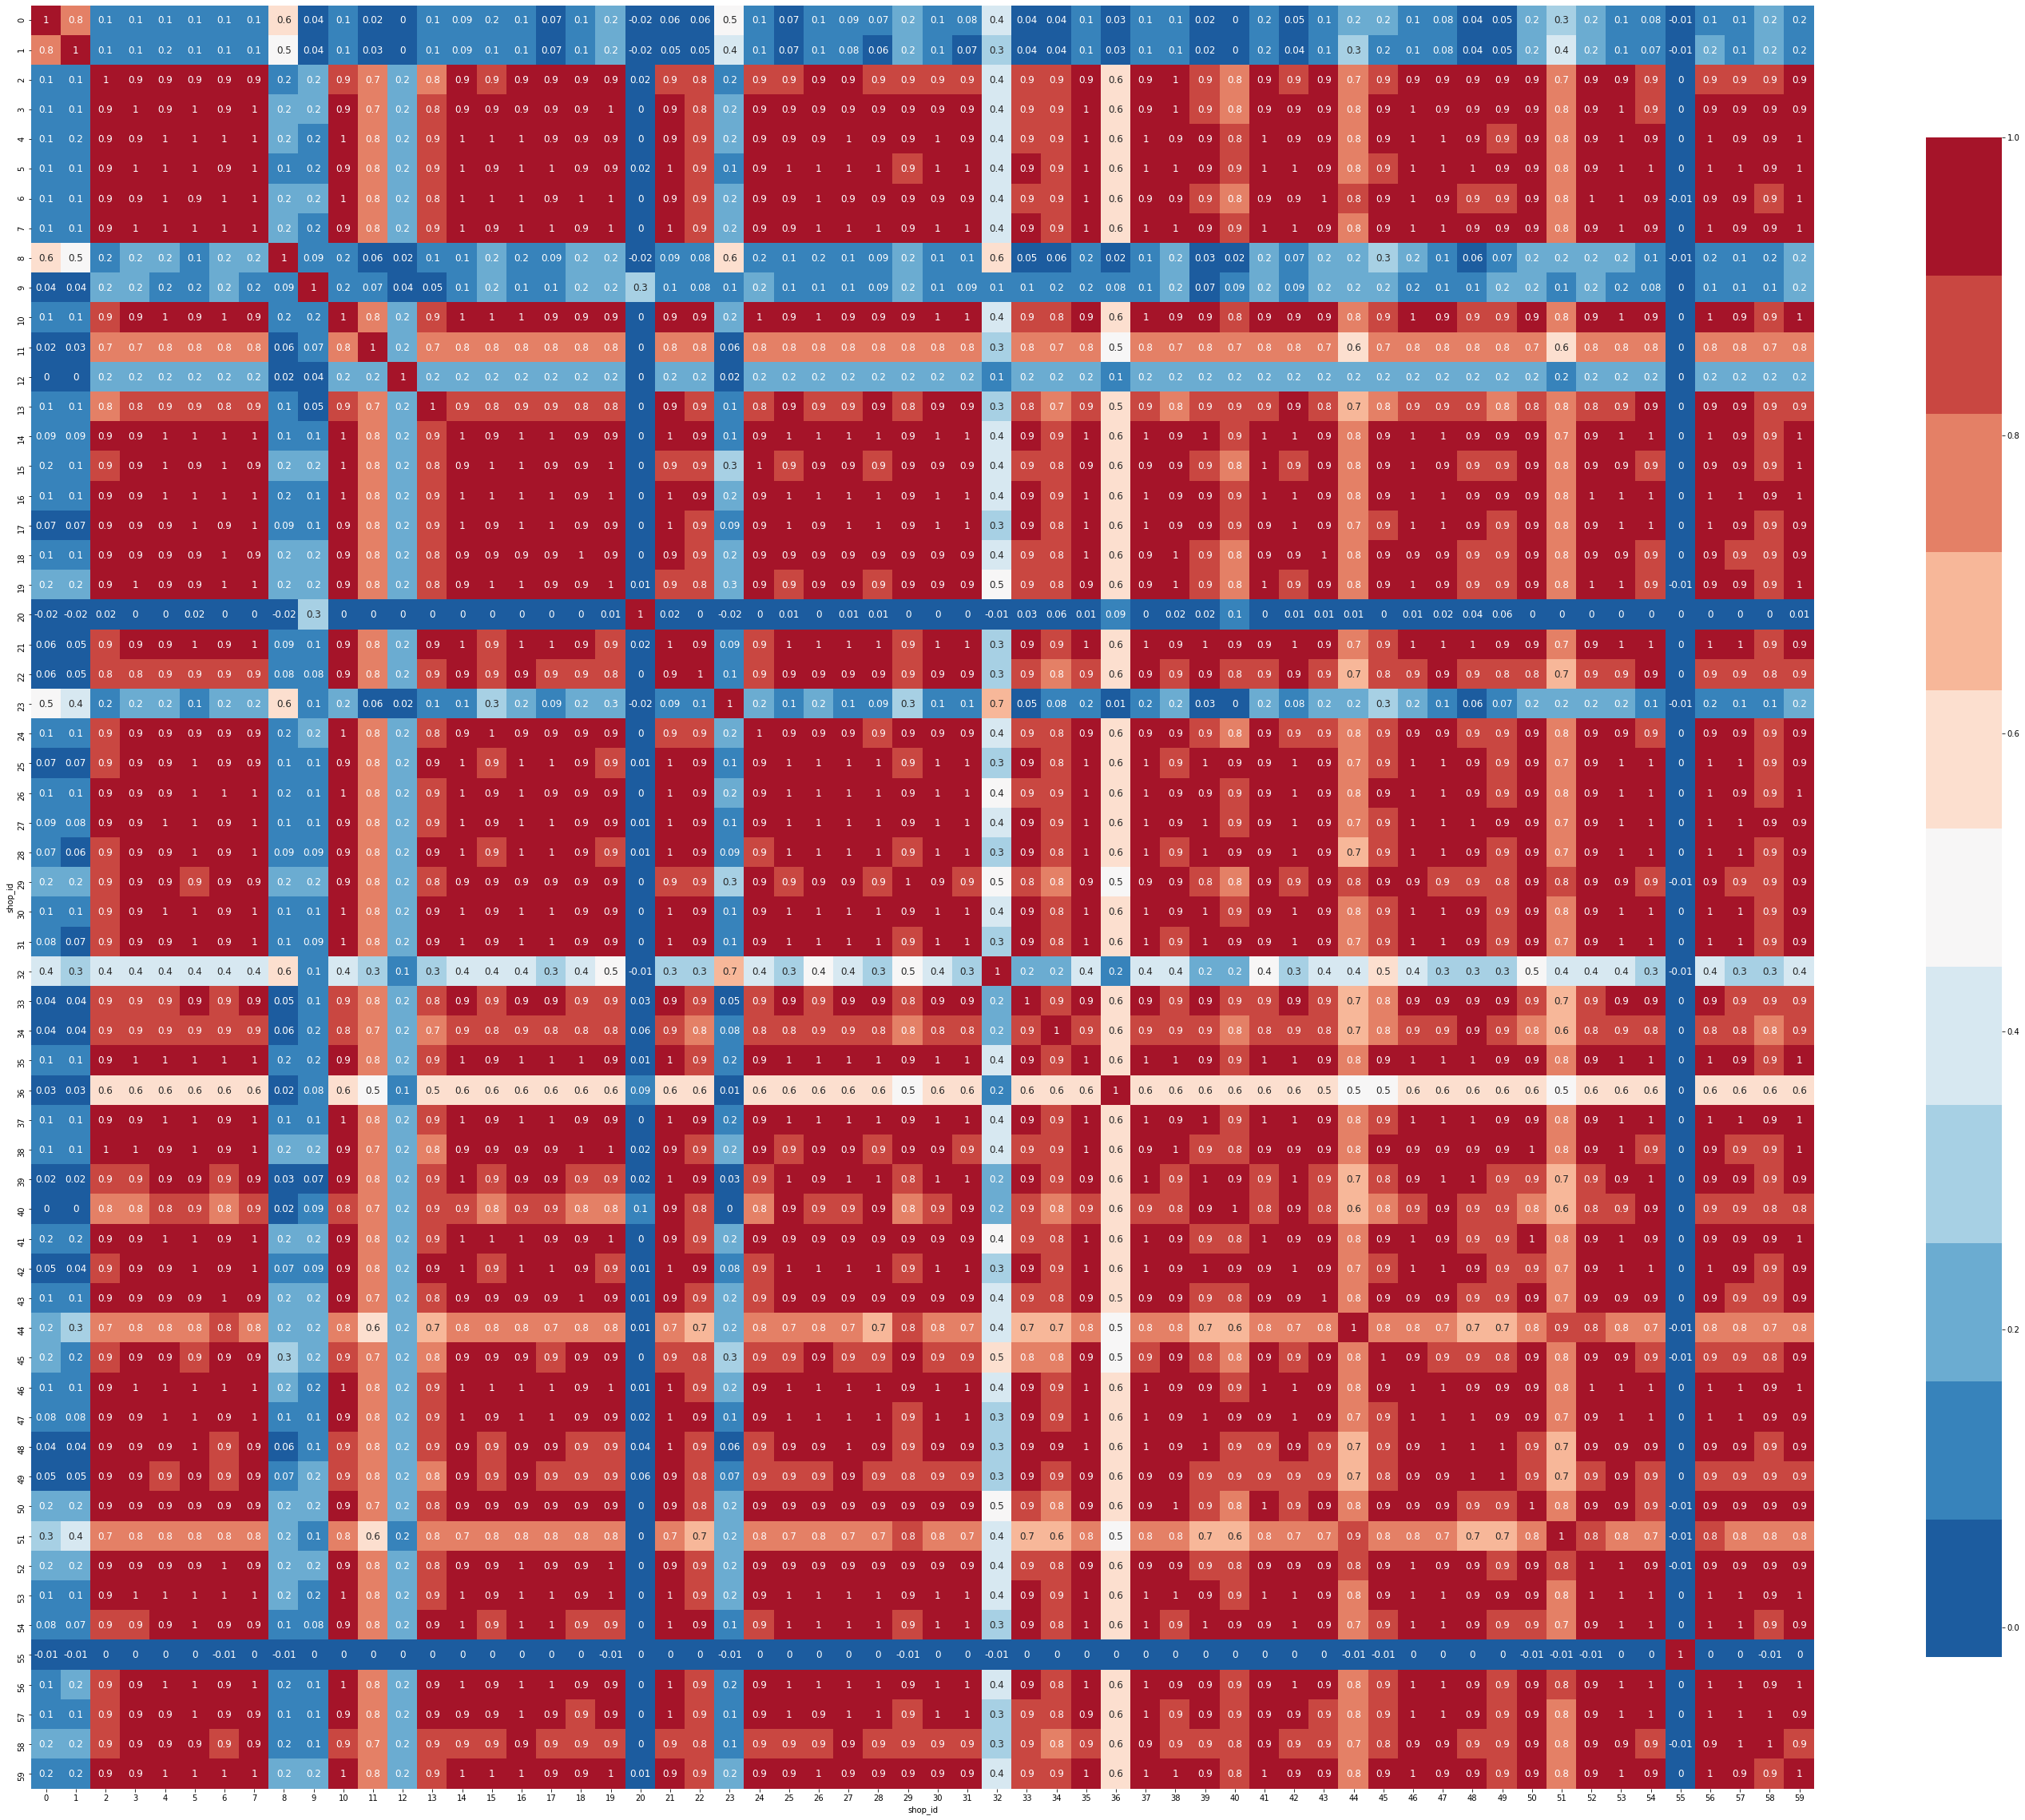

In [40]:
plt.rcParams["figure.figsize"] = [50,50]
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

h = sns.heatmap(corr_matrix,
                cmap= sns.color_palette("RdBu_r", 11), #sns.diverging_palette( 30, 50, s=90, l=60, n=11, center="dark"), #'coolwarm',
                annot=True,
                fmt= '.0g', #".1g", #".1f",
                annot_kws={'size':12},
                cbar=True,
                cbar_kws={"shrink": 0.7},
                square=True)
plt.show()

###Observations:
From the above heatmap, we can see that certain shops have very little overall correlation with any other shop.  A few issues with this analysis:

*  The correlation is computed based on all sales in the *sales_train* dataset, and has no accommodation for time-lag influences (e.g., one shop may predict a month ahead of another shop)

*  This calculation uses very fine discretization of 21,700 item_id values... if a shop calls an item by a slightly different name, it could undesirably reduce correlation to other shops to zero, for example.

Let's address the second of these issues first, by using item categories instead of item ids when comparing shop-to-shop.

##2.4) **SHOP-CATEGORY** pairing and related correlations:

Correlate shops by sales in the different item categories (for several of the choices we have to use as category variables), unlike the above where we correlated shops by sales in the different item_id options

*  How many rows in the *sales_train* dataset for each category (and, same info, but grouped by shop)?  (i.e., how many training examples do we have to work with)

*  From the *sales_train* dataset, how many total units of items were sold for each category (and, same info, but grouped by shop)?  (i.e., how much traffic / importance should we assign to a particular category?)

###2.4.1) dataframe merging/augmenting as setup for the EDA

In [41]:
# Recall the augmented item_categories data set:
item_categories_augmented.head()

,item_category_name,item_category_id,en_cat_name,item_category1,item_category2,item_category3,item_category4,item_cat_tested
0,PC - Гарнитуры/Наушники,0,PC - Headsets / Headphones,Audio,PC,Accessories,PC,True
1,Аксессуары - PS2,1,Accessories - PS2,Accessories,PlayStation,Accessories,PlayStation,False
2,Аксессуары - PS3,2,Accessories - PS3,Accessories,PlayStation,Accessories,PlayStation,True
3,Аксессуары - PS4,3,Accessories - PS4,Accessories,PlayStation,Accessories,PlayStation,True
4,Аксессуары - PSP,4,Accessories - PSP,Accessories,PlayStation,Accessories,PlayStation,False


In [42]:
# How many rows in the sales_train set for each category?  How many total units of each category were sold (per the sales_train dataset)?
# Let's do this for the original "item_category_id" as well as "item_category1" and "item_category2"
#    --> start by giving the augmented subcategories their own associated id numbers for simpler plot labeling, etc.
item_categories_augmented.item_category1 = pd.Categorical(item_categories_augmented.item_category1)
item_categories_augmented.item_category2 = pd.Categorical(item_categories_augmented.item_category2)
item_categories_augmented['cat1_id'] = item_categories_augmented.item_category1.cat.codes
item_categories_augmented['cat2_id'] = item_categories_augmented.item_category2.cat.codes

item_categories_augmented.item_category3 = pd.Categorical(item_categories_augmented.item_category3)
item_categories_augmented.item_category4 = pd.Categorical(item_categories_augmented.item_category4)
item_categories_augmented['cat3_id'] = item_categories_augmented.item_category3.cat.codes
item_categories_augmented['cat4_id'] = item_categories_augmented.item_category4.cat.codes

item_categories_augmented.head(10)

,item_category_name,item_category_id,en_cat_name,item_category1,item_category2,item_category3,item_category4,item_cat_tested,cat1_id,cat2_id,cat3_id,cat4_id
0,PC - Гарнитуры/Наушники,0,PC - Headsets / Headphones,Audio,PC,Accessories,PC,True,1,6,0,5
1,Аксессуары - PS2,1,Accessories - PS2,Accessories,PlayStation,Accessories,PlayStation,False,0,8,0,6
2,Аксессуары - PS3,2,Accessories - PS3,Accessories,PlayStation,Accessories,PlayStation,True,0,8,0,6
3,Аксессуары - PS4,3,Accessories - PS4,Accessories,PlayStation,Accessories,PlayStation,True,0,8,0,6
4,Аксессуары - PSP,4,Accessories - PSP,Accessories,PlayStation,Accessories,PlayStation,False,0,8,0,6
5,Аксессуары - PSVita,5,Accessories - PSVita,Accessories,PlayStation,Accessories,PlayStation,True,0,8,0,6
6,Аксессуары - XBOX 360,6,Accessories - XBOX 360,Accessories,Xbox,Accessories,Xbox,True,0,9,0,7
7,Аксессуары - XBOX ONE,7,Accessories - XBOX ONE,Accessories,Xbox,Accessories,Xbox,True,0,9,0,7
8,Билеты (Цифра),8,Tickets (digits),Tickets,Any,Tickets,Any,False,12,0,11,0
9,Доставка товара,9,Delivery of goods,Shipping,Any,Shipping,Any,True,10,0,9,0


In [43]:
# Merge the item category information with the sales_train data
train_cats = sales_train.merge(items[['item_id','item_category_id']], on = 'item_id')  
# sort on shops so we can get a look at several different items to verify all is ok
train_cats = train_cats.merge(item_categories_augmented[['item_category_id','cat1_id','cat2_id','cat3_id','cat4_id']], on = 'item_category_id').sort_values('shop_id')
print(len(train_cats))
train_cats.head(7)

2935849


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,cat1_id,cat2_id,cat3_id,cat4_id
64213,2013-01-04,0,0,16920,346,1,37,8,3,7,3
2250562,2013-01-18,0,0,5630,2060,1,2,0,8,0,6
2250572,2013-02-21,1,0,5630,2060,1,2,0,8,0,6
316316,2013-02-09,1,0,10906,72,1,55,9,4,8,4
316311,2013-01-10,0,0,10906,100,1,55,9,4,8,4
2100364,2013-02-23,1,0,10679,540,1,67,6,2,5,2
714115,2013-01-19,0,0,3187,1748,1,19,5,8,4,6


###2.4.2) Grouping shop/item info by item category 
5 different choices of item categorization (the original item_category_id, and then 4 modified versions that group similar category IDs into a single category, thus reducing the total number of categories)

####2.4.2.1) by item_category_id

sales_train total number of units sold by item_category_id:
    item_category_id  cat0_total_train_rows  cat0_total_units_sold                           en_cat_name
0                  0                      3                      3            PC - Headsets / Headphones
1                  1                      2                      2                     Accessories - PS2
2                  2                  18461                  19597                     Accessories - PS3
3                  3                  25283                  29807                     Accessories - PS4
4                  4                   2304                   2407                     Accessories - PSP
5                  5                   7231                   7413                  Accessories - PSVita
6                  6                  18498                  20472                Accessories - XBOX 360
7                  7                   4459                   5358                Accessories - XBOX

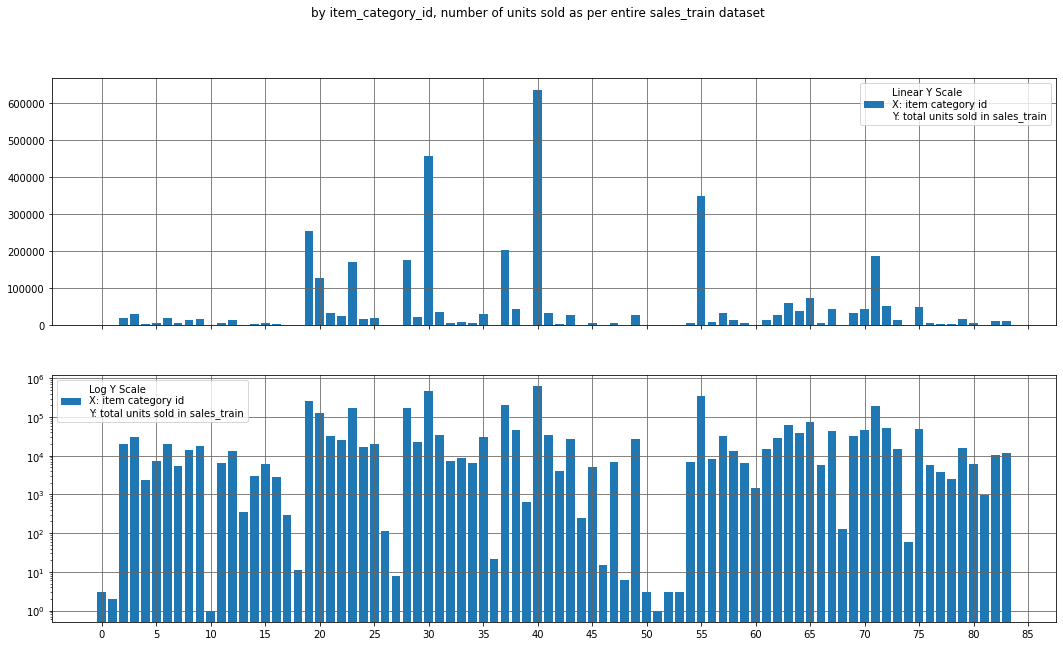

In [44]:
# Sales by category for the 84 unique categories in "item_category_id" (the original dataset categorization):

cat0_sales = train_cats.groupby("item_category_id", as_index=False).agg({'item_cnt_day': ['count', 'sum']})
cat0_sales.columns = ['item_category_id','cat0_total_train_rows','cat0_total_units_sold']
cat0_sales = cat0_sales.merge(item_categories_augmented.groupby('item_category_id').first().reset_index()[['item_category_id','en_cat_name']], on = 'item_category_id')
print(f'sales_train total number of units sold by item_category_id:\n{cat0_sales}\n')
print(f'{cat0_sales.describe()}\n')

plt.rcParams["figure.figsize"] = [18,10]
cat0_sales.sort_values('item_category_id', inplace=True)
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('by item_category_id, number of units sold as per entire sales_train dataset')
ax1.bar(cat0_sales['item_category_id'], cat0_sales['cat0_total_units_sold'], label = "Linear Y Scale\nX: item category id\nY: total units sold in sales_train")
ax1.xaxis.set_major_locator(MultipleLocator(5))
#ax1.xaxis.set_major_formatter(FormatStrFormatter('%d'))
#ax1.xaxis.set_minor_locator(MultipleLocator(5))
ax1.xaxis.grid(True, which='major', color='#666666', linestyle='-')
ax1.yaxis.grid(True, which='major', color='#666666', linestyle='-')
ax1.legend()
ax2.set_yscale('log')
ax2.bar(cat0_sales['item_category_id'], cat0_sales['cat0_total_units_sold'], label = "Log Y Scale\nX: item category id\nY: total units sold in sales_train")
ax2.xaxis.set_major_locator(MultipleLocator(5))
ax2.xaxis.grid(True, which='major', color='#666666', linestyle='-')
ax2.yaxis.grid(True, which='major', color='#666666', linestyle='-')
ax2.legend()
plt.show()

There looks to be a large variance by category when using original category IDs.

For "total units sold within a category for the entire sales_train dataset" vs. item_category_id:

*  Standard deviation is roughly 2x the mean value, and 10x the median value

*  Minimum category has just 1 item sold in entire *sales_train* dataset, and from the bar plot, you can see that there are several categories with irrelevant numbers of sales.  It is unlikely these will serve as useful distinctive categories because of the lack of training data (allowing overfitting, for example).

####2.4.2.2) by manually-created item_category1

sales_train total number of units sold by item_category1:
    cat1_id  cat1_total_train_rows  cat1_total_units_sold item_category1
0         0                  92511                 112918    Accessories
1         1                      3                      3          Audio
2         2                  69424                  76341          Books
3         3                  24770                  32155       Consoles
4         4                  37905                  53883    Debit_Cards
5         5                1029694                1335994          Games
6         6                 370450                 584366          Gifts
7         7                   5185                  11402       Internet
8         8                 833416                 916943         Movies
9         9                 401862                 411294          Music
10       10                   2193                  18118       Shipping
11       11                  65234                  74954       So

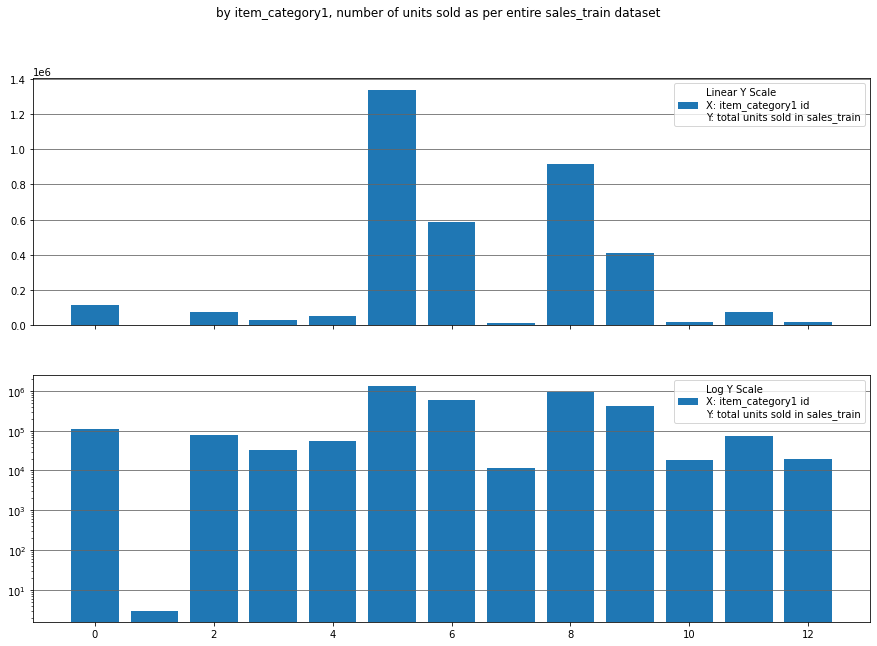

In [45]:
# Let's look at the data with the augmented category options.
# Sales by item_category1 (categories grouped into 13 unique values, relating to item "type")

# cat1_names_ids = item_categories_augmented.groupby('item_category1')['cat1_id'].mean()
# print(f"The {len(cat1_names_ids)} (manually generated) unique values in item_category1:")
# print(f'{cat1_names_ids}\n')

cat1_sales = train_cats.groupby("cat1_id", as_index=False).agg({'item_cnt_day': ['count', 'sum']})
cat1_sales.columns = ['cat1_id','cat1_total_train_rows','cat1_total_units_sold']
cat1_sales = cat1_sales.merge(item_categories_augmented.groupby('cat1_id').first().reset_index()[['cat1_id','item_category1']], on = 'cat1_id')
print(f'sales_train total number of units sold by item_category1:\n{cat1_sales}\n')
print(f'{cat1_sales.describe()}\n')

plt.rcParams["figure.figsize"] = [15,10]
cat1_sales.sort_values('cat1_id', inplace=True)
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('by item_category1, number of units sold as per entire sales_train dataset')
ax1.bar(cat1_sales['cat1_id'], cat1_sales['cat1_total_units_sold'], label = "Linear Y Scale\nX: item_category1 id\nY: total units sold in sales_train")
ax1.grid(b=True, which='major', axis='y', color='#666666', linestyle='-')
ax1.legend()
ax2.set_yscale('log')
ax2.bar(cat1_sales['cat1_id'], cat1_sales['cat1_total_units_sold'], label = "Log Y Scale\nX: item_category1 id\nY: total units sold in sales_train")
ax2.grid(b=True, which='major', axis='y', color='#666666', linestyle='-')
ax2.legend()

plt.show()

There is a much more balanced distribution of total units sold by category with the 13 manually-determined item_category1 categories, roughly set by item "type" without nod to branding.

For "total units sold within a category for the entire sales_train dataset" vs. item_category1:

*  Standard deviation has relative decrease to be 1.5x the mean value, and 6x the median value (instead of 2x and 10x)

*  Minimum category has just 3 items sold in entire *sales_train* dataset, and from the bar plot, you can see that this is now the only category with an irrelevant number of unit sales.  (item_category1 = 'audio', such as PC headsets/headphones, which comes directly from the one original item_category_id == 0, and does not group any other of the original categories with it.)

####2.4.2.3) by manually-created item_category2

sales_train total number of units sold by item_category2:
   cat2_id  cat2_total_train_rows  cat2_total_units_sold item_category2
0        0                  50304                 104183            Any
1        1                  64243                  69429          Books
2        2                 370450                 584366          Gifts
3        3                 833416                 916943         Movies
4        4                 401862                 411294          Music
5        5                    322                    295          Other
6        6                 576481                 770997             PC
7        7                     91                    114          Phone
8        8                 436591                 553929    PlayStation
9        9                 202089                 236656           Xbox

       cat2_id  cat2_total_train_rows  cat2_total_units_sold
count       10                     10                     10
mean     4.500            2

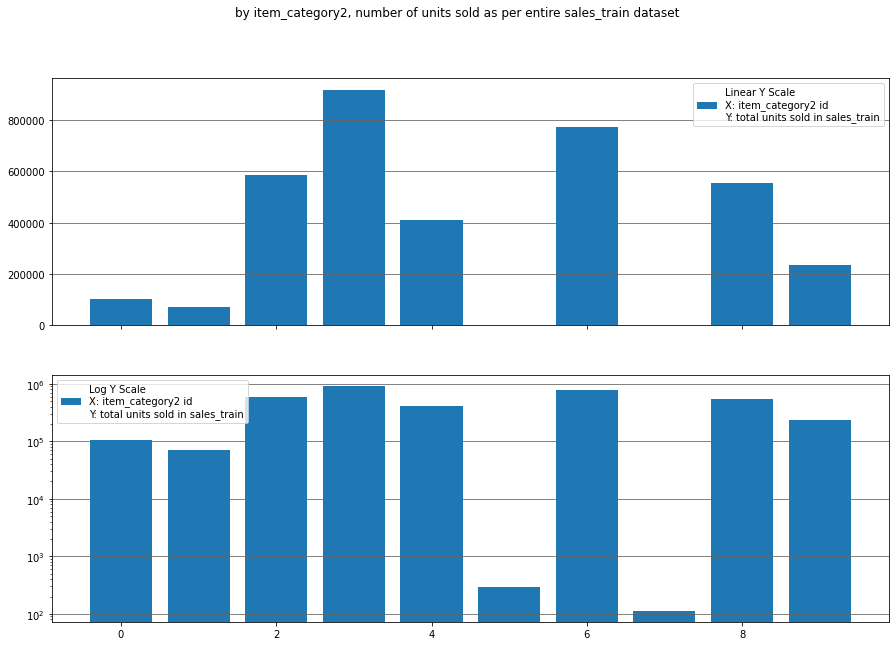

In [46]:
# Sales by item_category2 (categories grouped into 10 unique values, relating to item "brand" and "type")

# cat2_names_ids = item_categories_augmented.groupby('item_category2')['cat2_id'].mean()
# print(f"The {len(cat2_names_ids)} (manually generated) unique values in item_category2:")
# print(f'{cat2_names_ids}\n')

cat2_sales = train_cats.groupby("cat2_id", as_index=False).agg({'item_cnt_day': ['count', 'sum']})
cat2_sales.columns = ['cat2_id','cat2_total_train_rows','cat2_total_units_sold']
cat2_sales = cat2_sales.merge(item_categories_augmented.groupby('cat2_id').first().reset_index()[['cat2_id','item_category2']], on = 'cat2_id')
print(f'sales_train total number of units sold by item_category2:\n{cat2_sales}\n')
print(f'{cat2_sales.describe()}\n')

plt.rcParams["figure.figsize"] = [15,10]
cat2_sales.sort_values('cat2_id', inplace=True)
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('by item_category2, number of units sold as per entire sales_train dataset')
ax1.bar(cat2_sales['cat2_id'], cat2_sales['cat2_total_units_sold'], label = "Linear Y Scale\nX: item_category2 id\nY: total units sold in sales_train")
ax1.grid(b=True, which='major', axis='y', color='#666666', linestyle='-')
ax1.legend()
ax2.set_yscale('log')
ax2.bar(cat2_sales['cat2_id'], cat2_sales['cat2_total_units_sold'], label = "Log Y Scale\nX: item_category2 id\nY: total units sold in sales_train")
ax2.grid(b=True, which='major', axis='y', color='#666666', linestyle='-')
ax2.legend()

plt.show()

It is probable that the items in (item_category1 == 'audio') and in (item_category2 == 'phone' or item_category2 == 'other') should not be simply dispensed with, yet the very small numbers of units involved for these categories in the *sales_train* dataset make these to be poor choices of categories to get good model fitting.



---



---


So, let's revisit the manual category grouping that we did before, and see if these low-traffic item subcategories could be grouped with one of the larger subcategories so the low-traffic item subcategories can gain some benefit during training by sharing information with other item_category_id rows in the *sales_train* dataset.

---
OK, below we have modified cat1 --> cat3 and cat2 --> cat4.  Let's see how they look:


####2.4.2.4) by manually-created item_category3

sales_train total number of units sold by item_category3:
    cat3_id  cat3_total_train_rows  cat3_total_units_sold item_category3
0         0                  92514                 112921    Accessories
1         1                  69424                  76341          Books
2         2                  24770                  32155       Consoles
3         3                  37905                  53883    Debit_Cards
4         4                1029694                1335994          Games
5         5                 370450                 584366          Gifts
6         6                   5185                  11402       Internet
7         7                 833416                 916943         Movies
8         8                 401862                 411294          Music
9         9                   2193                  18118       Shipping
10       10                  65234                  74954       Software
11       11                   3202                  19835        T

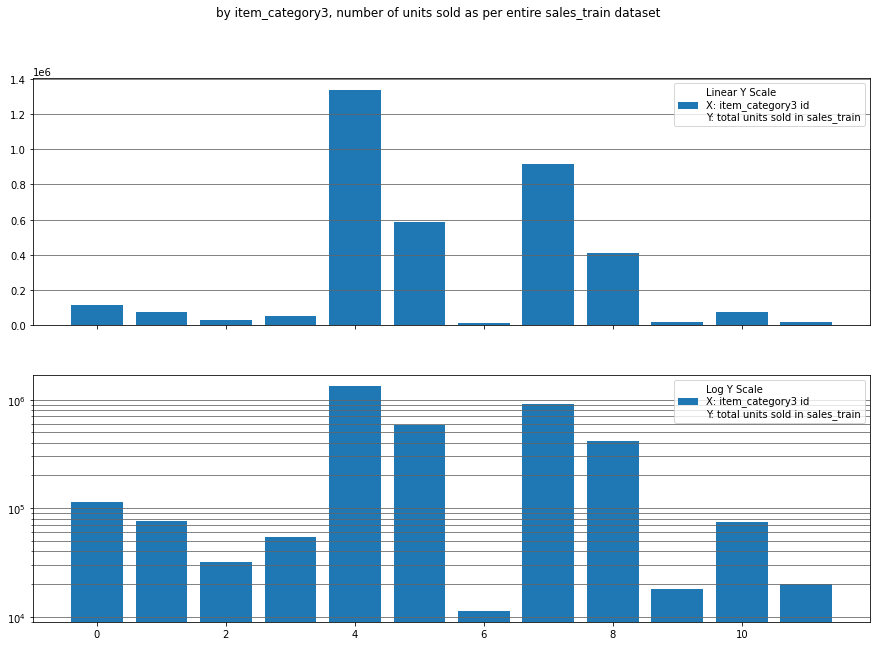

In [47]:
# Sales by item_category3:  (categories grouped into 12 unique values, relating to item "type")

# cat3_names_ids = item_categories_augmented.groupby('item_category3')['cat3_id'].mean()
# print(f"The {len(cat3_names_ids)} (manually generated) unique values in item_category3:")
# print(f'{cat3_names_ids}\n')

cat3_sales = train_cats.groupby("cat3_id", as_index=False).agg({'item_cnt_day': ['count', 'sum']})
cat3_sales.columns = ['cat3_id','cat3_total_train_rows','cat3_total_units_sold']
cat3_sales = cat3_sales.merge(item_categories_augmented.groupby('cat3_id').first().reset_index()[['cat3_id','item_category3']], on = 'cat3_id')
print(f'sales_train total number of units sold by item_category3:\n{cat3_sales}\n')
print(f'{cat3_sales.describe()}\n')

plt.rcParams["figure.figsize"] = [15,10]
cat3_sales.sort_values('cat3_id', inplace=True)
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('by item_category3, number of units sold as per entire sales_train dataset')
ax1.bar(cat3_sales['cat3_id'], cat3_sales['cat3_total_units_sold'], label = "Linear Y Scale\nX: item_category3 id\nY: total units sold in sales_train")
ax1.grid(b=True, which='major', axis='y', color='#666666', linestyle='-')
ax1.legend()
ax2.set_yscale('log')
ax2.bar(cat3_sales['cat3_id'], cat3_sales['cat3_total_units_sold'], label = "Log Y Scale\nX: item_category3 id\nY: total units sold in sales_train")
ax2.grid(b=True, which='major', axis='y', color='#666666', linestyle='-')
ax2.grid(b=True, which='minor', axis='y', color='#666666', linestyle='-')
ax2.legend()

plt.show()

####2.4.2.5) by manually-created item_category4

sales_train total number of units sold by item_category4:
   cat4_id  cat4_total_train_rows  cat4_total_units_sold item_category4
0        0                  50626                 104478            Any
1        1                  64243                  69429          Books
2        2                 370450                 584366          Gifts
3        3                 833416                 916943         Movies
4        4                 401862                 411294          Music
5        5                 576572                 771111             PC
6        6                 436591                 553929    PlayStation
7        7                 202089                 236656           Xbox

       cat4_id  cat4_total_train_rows  cat4_total_units_sold
count        8                      8                      8
mean     3.500            366,981.125            456,025.750
std      2.449            263,624.305            307,279.904
min          0                  50626            

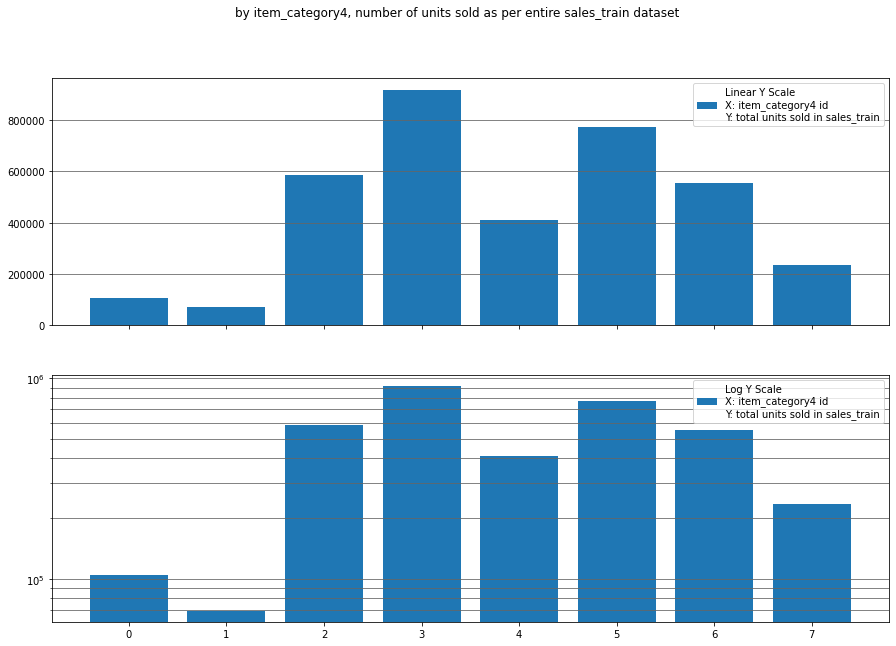

In [48]:
# OK, Cat3 looks better to use than Cat1 for subgrouping the 84 original categories
#
# Now check Cat4 (vs. Cat2)
# Sales by item_category4:  (categories grouped into 8 unique values, relating to item "brand" then "type")
# cat4_names_ids = item_categories_augmented.groupby('item_category4')['cat4_id'].mean()
# print(f"The {len(cat4_names_ids)} (manually generated) unique values in item_category4:")
# print(f'{cat4_names_ids}\n')

cat4_sales = train_cats.groupby("cat4_id", as_index=False).agg({'item_cnt_day': ['count', 'sum']})
cat4_sales.columns = ['cat4_id','cat4_total_train_rows','cat4_total_units_sold']
cat4_sales = cat4_sales.merge(item_categories_augmented.groupby('cat4_id').first().reset_index()[['cat4_id','item_category4']], on = 'cat4_id')
print(f'sales_train total number of units sold by item_category4:\n{cat4_sales}\n')
print(f'{cat4_sales.describe()}\n')

plt.rcParams["figure.figsize"] = [15,10]
cat4_sales.sort_values('cat4_id', inplace=True)
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('by item_category4, number of units sold as per entire sales_train dataset')
ax1.bar(cat4_sales['cat4_id'], cat4_sales['cat4_total_units_sold'], label = "Linear Y Scale\nX: item_category4 id\nY: total units sold in sales_train")
ax1.grid(b=True, which='major', axis='y', color='#666666', linestyle='-')
ax1.legend()
ax2.set_yscale('log')
ax2.bar(cat4_sales['cat4_id'], cat4_sales['cat4_total_units_sold'], label = "Log Y Scale\nX: item_category4 id\nY: total units sold in sales_train")
ax2.grid(b=True, which='major', axis='y', color='#666666', linestyle='-')
ax2.grid(b=True, which='minor', axis='y', color='#666666', linestyle='-')
ax2.legend()

plt.show()

###Observation / Summary Up to now:
It appears as if item_category3 is indeed an improvement over item_category1 grouping, and similarly, item_category4 is an improvement over item_category2.  And, all seem to be potentially more relevant (and generalizable) than the original item_category_id grouping.

So, let's proceed with the analysis of shop-shop correlations using the original item_category_id (84 values), the item_category3 (12 values), and the item_category4 (8 values)....

###2.4.3) shop-item_category correlations 
Investigate correlation between shops using item sales in a given item category as the correlation variable

####2.4.3.1) using original item_category_id categorization

In [49]:
# Compute the number of times a shop_id-category_id pair appears in the sales_train dataset
# Also, for each shop_id-category_id pair, compute the number of the particular items in that category sold at that shop (in the entire sales_train dataset)
# Finally, for each shop_id-category_id pair, compute the percentage of the above two items with respect to the total numbers for the shop
#   and with respect to the total numbers for the item category
shop_cat0_sales = train_cats.groupby(['shop_id','item_category_id'], as_index=False).agg({'item_cnt_day': ['count', 'sum']})
shop_cat0_sales.columns = ['shop_id','item_category_id','n_train_rows','n_units_sold']
shop_cat0_sales['n_units_sold'] = shop_cat0_sales['n_units_sold'].astype(int)
shop_cat0_sales = shop_cat0_sales.merge(cat0_sales, on = 'item_category_id')
shop_cat0_sales = shop_cat0_sales.merge(shops_sales, on = 'shop_id')
shop_cat0_sales['shop_row_pct'] = 100 * shop_cat0_sales.n_train_rows / shop_cat0_sales.shop_total_train_rows
shop_cat0_sales['shop_units_pct'] = 100 * shop_cat0_sales.n_units_sold / shop_cat0_sales.shop_total_units_sold
shop_cat0_sales['cat0_row_pct'] = 100 * shop_cat0_sales.n_train_rows / shop_cat0_sales.cat0_total_train_rows
shop_cat0_sales['cat0_units_pct'] = 100 * shop_cat0_sales.n_units_sold / shop_cat0_sales.cat0_total_units_sold
# clean up rows where total number of units sold = 0 (item_units_fraction = +/- inf)... note that we don't have to do this for shops column because total is never 0
shop_cat0_sales['cat0_units_pct'] = shop_cat0_sales['cat0_units_pct'].replace([np.inf, -np.inf], 0)
# drop the unneeded columns for easier readability
shop_cat0_sales.drop(['cat0_total_train_rows','cat0_total_units_sold','shop_total_train_rows','shop_total_units_sold'], axis=1, inplace=True)

print(shop_cat0_sales.describe())
shop_cat0_sales.head()

       shop_id  item_category_id  n_train_rows  n_units_sold  shop_row_pct  shop_units_pct  cat0_row_pct  cat0_units_pct
count     3271              3271          3271          3271          3271            3271          3271            3271
mean    29.764            41.077       897.539     1,115.318         1.834           1.834         2.568           2.568
std     17.266            24.175     2,629.420     3,221.940         3.912           3.809         7.403           7.512
min          0                 0             1             1         0.000           0.000         0.001           0.001
25%         15                20            40            45         0.135           0.127         0.540           0.496
50%         30                40           174           206         0.489           0.475         1.448           1.340
75%         45                63           614       717.500         1.382           1.306         2.438           2.338
max         59                83

,shop_id,item_category_id,n_train_rows,n_units_sold,en_cat_name,shop_row_pct,shop_units_pct,cat0_row_pct,cat0_units_pct
0,0,0,1,1,PC - Headsets / Headphones,0.010,0.009,33.333,33.333
1,0,1,1,1,Accessories - PS2,0.010,0.009,50,50
2,0,2,93,105,Accessories - PS3,0.943,0.897,0.504,0.536
3,0,3,35,52,Accessories - PS4,0.355,0.444,0.138,0.174
4,0,4,35,38,Accessories - PSP,0.355,0.325,1.519,1.579


In [50]:
# I would like to look at correlations between shops, between item categories, and between shop-item_category pairs
# For this, I need to fill out the shop_catX_sales table to include all possible shop-item_category pairs, using itertools.product

l1=shops['shop_id'].unique().tolist()
l2=items['item_category_id'].unique().tolist()
pairs_df =  pd.DataFrame(list(product(l1,l2))).rename(columns={0:'shop_id',1:'item_category_id'})
all_shop_cat0 = pd.merge(pairs_df, shop_cat0_sales, on=['shop_id', 'item_category_id'], how='left').fillna(0)
print("df rows = " + str(len(all_shop_cat0)) + "  and 84 x 60 = " + str(84*60))
all_shop_cat0.head()

df rows = 5040  and 84 x 60 = 5040


,shop_id,item_category_id,n_train_rows,n_units_sold,en_cat_name,shop_row_pct,shop_units_pct,cat0_row_pct,cat0_units_pct
0,0,40,3017,3768,Movie - DVD,30.608,32.191,0.534,0.594
1,0,76,0,0,0,0,0,0,0
2,0,55,889,899,Music - CD of local production,9.019,7.680,0.262,0.258
3,0,19,631,745,Games - PS3,6.402,6.365,0.303,0.292
4,0,30,1249,1500,Games PC - Standard Edition,12.671,12.815,0.355,0.329


In [51]:
shop_shop_units0 = all_shop_cat0.pivot(index='item_category_id',columns='shop_id',values='shop_units_pct')
print(len(shop_shop_units0))
shop_shop_units0.head()

84


shop_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
item_category_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.002,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.897,0.998,1.159,0.705,0.703,0.543,0.420,0.732,0.529,0.202,0.563,0.350,0.297,0,0.483,...,0.504,0.634,0.855,0.409,0.614,0.961,0.474,0.503,0.553,0.470,0,0.433,0.474,0.396,0.455
3,0.444,0.285,1.721,1.270,0.758,0.795,0.751,0.826,0,0.447,0.828,0.699,0.964,0.040,0.916,...,0.656,0.930,1.549,1.550,1.533,1.014,0.506,0.756,0.746,0.591,0,0.605,0.684,0.702,0.814
4,0.325,0.475,0.137,0.099,0.230,0.089,0.021,0.137,0.056,0,0.024,0,0.014,0,0.041,...,0.055,0.053,0.126,0,0.070,0.121,0.115,0.111,0.110,0.055,0,0.059,0.106,0.098,0.106


In [52]:
corr_matrix_cat0 = shop_shop_units0.corr()
corr_matrix_cat0 = corr_matrix_cat0.applymap(lambda x: 0 if abs(x) < 0.01 else x)  # stop the heatmap from printing -0.0 in some places instead of always 0.0, and no funky formatting from ":.1g"
corr_matrix_cat0.head()

shop_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
shop_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0.992,0.585,0.793,0.745,0.878,0.823,0.828,0.936,0.261,0.812,0.783,0.153,0.927,0.692,...,0.842,0.860,0.708,0.616,0.690,0.910,0.972,0.832,0.743,0.941,-0.057,0.972,0.977,0.977,0.818
1,0.992,1,0.579,0.799,0.767,0.886,0.823,0.838,0.946,0.296,0.822,0.797,0.151,0.920,0.703,...,0.849,0.864,0.710,0.622,0.691,0.904,0.965,0.838,0.759,0.926,-0.055,0.963,0.961,0.972,0.832
2,0.585,0.579,1,0.887,0.831,0.782,0.767,0.846,0.655,0.620,0.831,0.726,0.336,0.367,0.856,...,0.808,0.817,0.905,0.798,0.828,0.779,0.559,0.802,0.799,0.591,-0.079,0.603,0.556,0.606,0.822
3,0.793,0.799,0.887,1,0.973,0.967,0.956,0.989,0.893,0.564,0.966,0.908,0.303,0.672,0.974,...,0.976,0.978,0.969,0.929,0.938,0.955,0.804,0.969,0.972,0.822,-0.074,0.834,0.775,0.813,0.969
4,0.745,0.767,0.831,0.973,1,0.951,0.949,0.980,0.887,0.610,0.979,0.910,0.287,0.628,0.977,...,0.969,0.963,0.936,0.910,0.888,0.906,0.765,0.960,0.979,0.779,-0.073,0.791,0.717,0.755,0.982


<IPython.core.display.Javascript object>

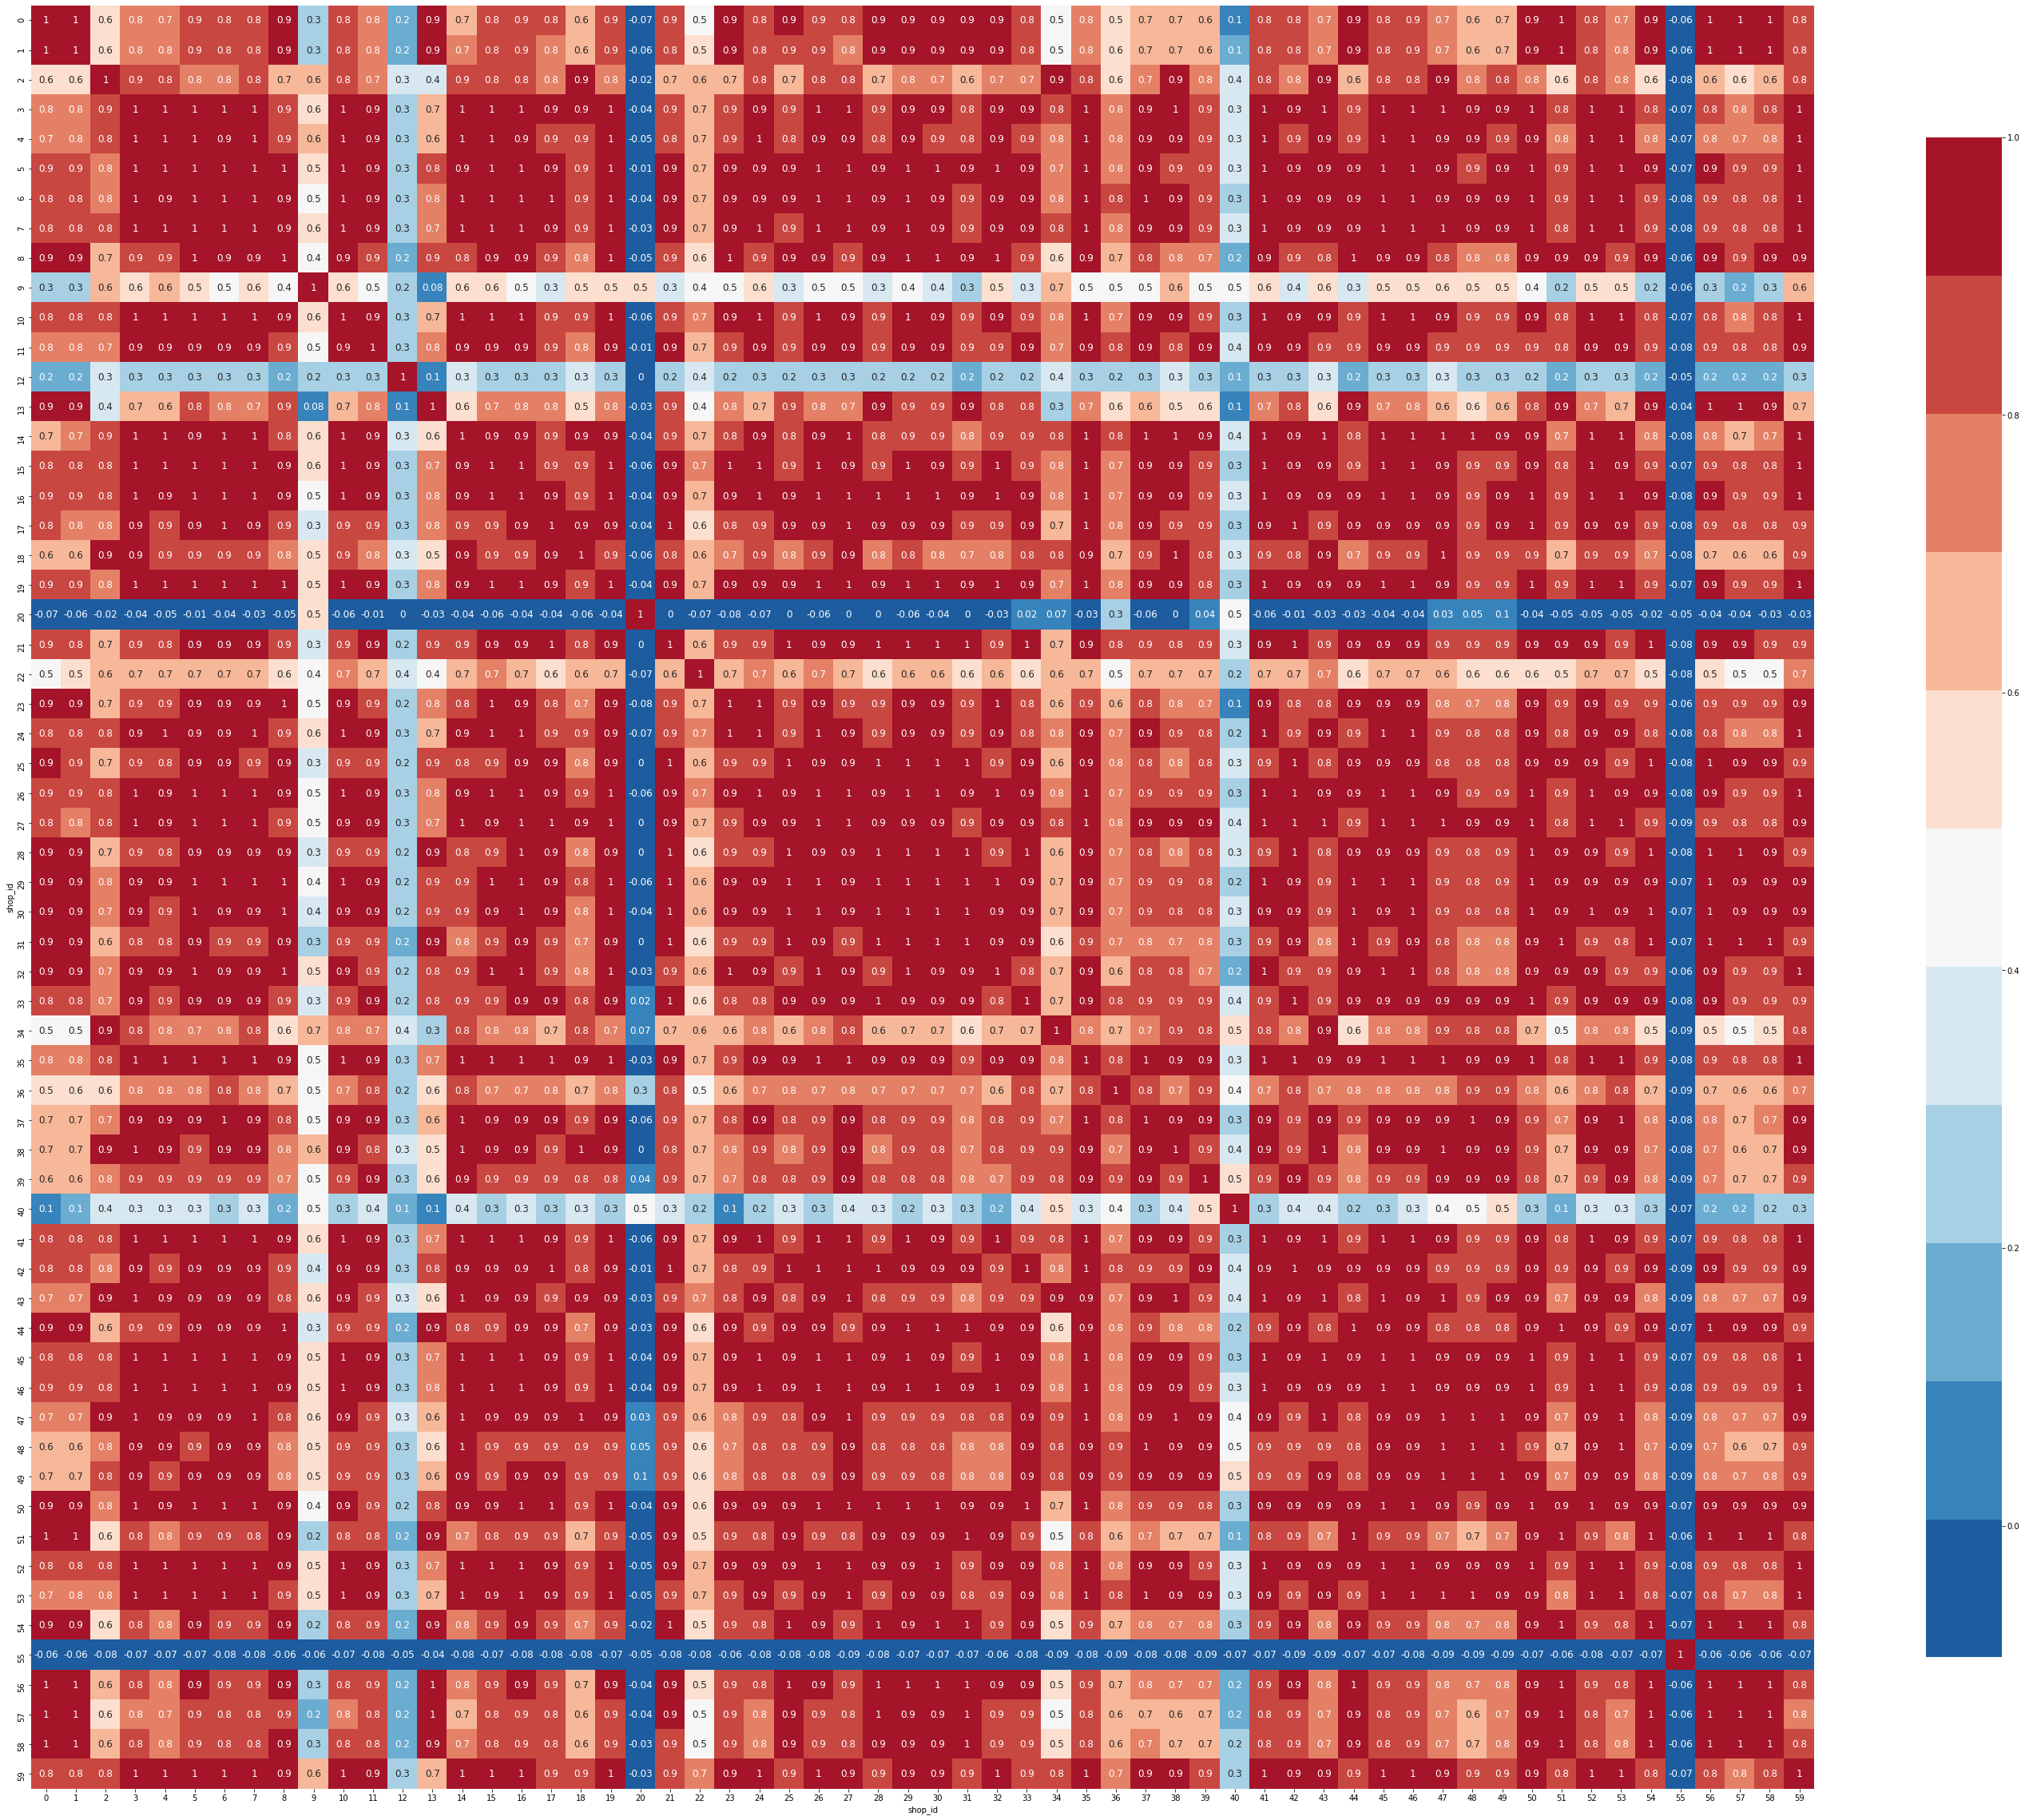

In [53]:
plt.rcParams["figure.figsize"] = [50,50]
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

h = sns.heatmap(corr_matrix_cat0,
                cmap= sns.color_palette("RdBu_r", 11), #sns.diverging_palette( 30, 50, s=90, l=60, n=11, center="dark"), #'coolwarm',
                annot=True,
                fmt= '.0g', #".1g", #".1f",
                annot_kws={'size':12},
                cbar=True,
                cbar_kws={"shrink": 0.7},
                square=True)
plt.show()

Observations:
Shops 20 and 55 not so don't correlate well with the other shops at all, yet both of these shops are in the test set.  We may want to train these two shops separately(?).

But, first, let's look at the correlation results from the grouped categories item_category3 and item_category4:

####2.4.3.2) using manually-generated item_category3 categorization

In [54]:
# Compute the number of times a shop_id-category_id pair appears in the sales_train dataset
# Also, for each shop_id-category_id pair, compute the number of the particular items in that category sold at that shop (in the entire sales_train dataset)
# Finally, for each shop_id-category_id pair, compute the percentage of the above two items with respect to the total numbers for the shop
#   and with respect to the total numbers for the item category
shop_cat3_sales = train_cats.groupby(['shop_id','cat3_id'], as_index=False).agg({'item_cnt_day': ['count', 'sum']})
shop_cat3_sales.columns = ['shop_id','cat3_id','n_train_rows','n_units_sold']
shop_cat3_sales['n_units_sold'] = shop_cat3_sales['n_units_sold'].astype(int)
shop_cat3_sales = shop_cat3_sales.merge(cat3_sales, on = 'cat3_id')
shop_cat3_sales = shop_cat3_sales.merge(shops_sales, on = 'shop_id')
shop_cat3_sales['shop_row_pct'] = 100 * shop_cat3_sales.n_train_rows / shop_cat3_sales.shop_total_train_rows
shop_cat3_sales['shop_units_pct'] = 100 * shop_cat3_sales.n_units_sold / shop_cat3_sales.shop_total_units_sold
shop_cat3_sales['cat3_row_pct'] = 100 * shop_cat3_sales.n_train_rows / shop_cat3_sales.cat3_total_train_rows
shop_cat3_sales['cat3_units_pct'] = 100 * shop_cat3_sales.n_units_sold / shop_cat3_sales.cat3_total_units_sold
# clean up rows where total number of units sold = 0 (item_units_fraction = +/- inf)... note that we don't have to do this for shops column because total is never 0
shop_cat3_sales['cat3_units_pct'] = shop_cat3_sales['cat3_units_pct'].replace([np.inf, -np.inf], 0)
# drop the unneeded columns for easier readability
shop_cat3_sales.drop(['cat3_total_train_rows','cat3_total_units_sold','shop_total_train_rows','shop_total_units_sold'], axis=1, inplace=True)

print(shop_cat3_sales.describe())
print(shop_cat3_sales.head())

# I would like to look at correlations between shops, between item categories, and between shop-item_category pairs
# For this, I need to fill out the shop_catX_sales table to include all possible shop-item_category pairs, using itertools.product

l1=shops['shop_id'].unique().tolist()
l2=cat3_sales['cat3_id'].unique().tolist()
pairs_df =  pd.DataFrame(list(product(l1,l2))).rename(columns={0:'shop_id',1:'cat3_id'})
shop_cat3_sales['item_category3'] = shop_cat3_sales['item_category3'].cat.add_categories(0) # need to do this to prevent error when using fillna(0)
all_shop_cat3 = pd.merge(pairs_df, shop_cat3_sales, on=['shop_id', 'cat3_id'], how='left').fillna(0)
print("df rows = " + str(len(all_shop_cat3)) + "  and 12 x 60 = " + str(12*60))
print(all_shop_cat3.head())

shop_shop_units3 = all_shop_cat3.pivot(index='cat3_id',columns='shop_id',values='shop_units_pct')
print(len(shop_shop_units3))
print(shop_shop_units3.head())

       shop_id  cat3_id  n_train_rows  n_units_sold  shop_row_pct  shop_units_pct  cat3_row_pct  cat3_units_pct
count      595      595           595           595           595             595           595             595
mean    29.440    4.983     4,934.200     6,131.439        10.084          10.084         2.017           2.017
std     17.411    3.453     9,216.833    11,674.251        13.647          13.654         4.502           4.804
min          0        0             1             1         0.001           0.001         0.001           0.001
25%         14        2       231.500       348.500         0.942           0.962         0.469           0.433
50%         29        5          1016          1238         2.806           2.699         1.395           1.250
75%         44        8          5307          6701        15.095          14.368         2.247           2.091
max         59       11         83875         99674        89.453          84.435           100         

In [55]:
corr_matrix_cat3 = shop_shop_units3.corr()
corr_matrix_cat3 = corr_matrix_cat3.applymap(lambda x: 0 if abs(x) < 0.01 else x)  # stop the heatmap from printing -0.0 in some places instead of always 0.0, and no funky formatting from ":.1g"
print(corr_matrix_cat3.head())

shop_id    0     1     2     3     4     5     6     7     8     9     10    11    12    13    14  ...    45    46    47    48    49    50    51    52    53    54    55    56    57    58    59
shop_id                                                                                            ...                                                                                          
0           1 0.996 0.697 0.805 0.790 0.882 0.884 0.839 0.932 0.349 0.850 0.803 0.415 0.847 0.779  ... 0.878 0.875 0.723 0.684 0.710 0.915 0.976 0.833 0.777 0.903 0.440 0.976 0.974 0.973 0.863
1       0.996     1 0.742 0.839 0.824 0.905 0.902 0.869 0.939 0.400 0.879 0.830 0.449 0.814 0.813  ... 0.903 0.901 0.762 0.720 0.747 0.934 0.966 0.860 0.808 0.902 0.482 0.973 0.966 0.979 0.891
2       0.697 0.742     1 0.973 0.969 0.901 0.876 0.952 0.822 0.754 0.955 0.898 0.702 0.270 0.961  ... 0.930 0.929 0.957 0.909 0.916 0.898 0.629 0.915 0.941 0.654 0.870 0.697 0.617 0.757 0.948
3       0.805 0.839 0.973     1 0.9

<IPython.core.display.Javascript object>

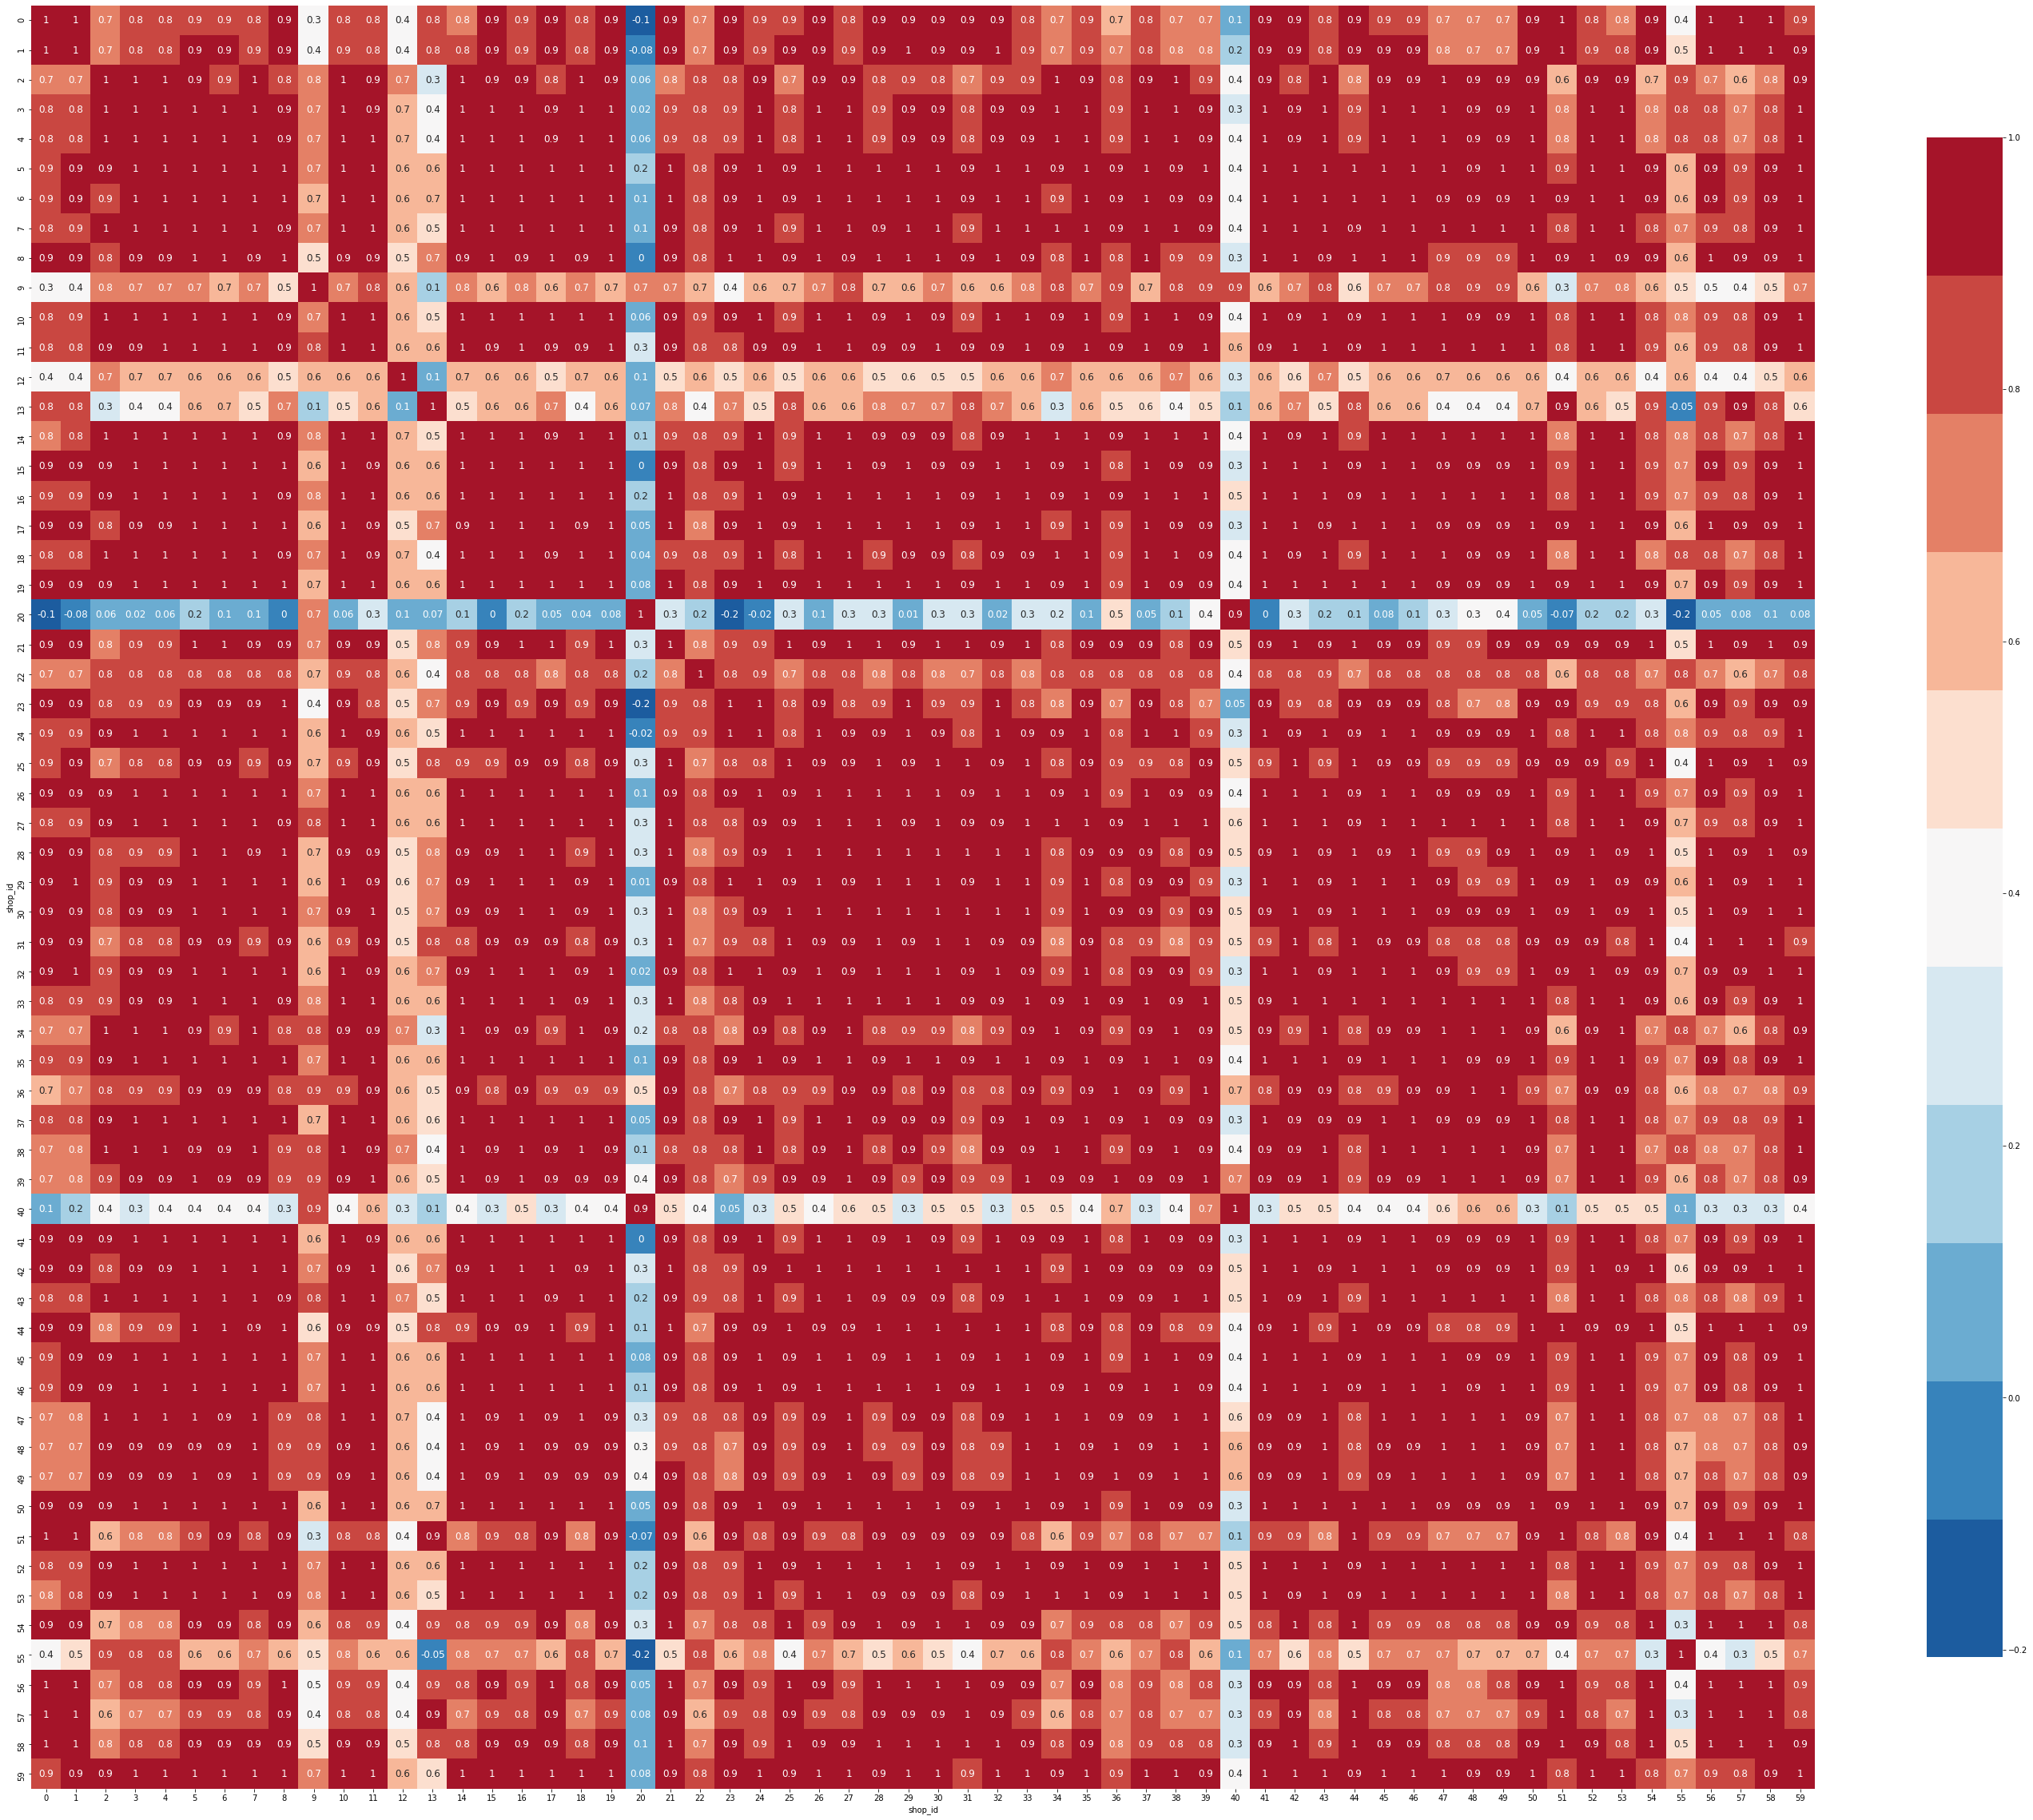

In [56]:
plt.rcParams["figure.figsize"] = [50,50]
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

h = sns.heatmap(corr_matrix_cat3,
                cmap= sns.color_palette("RdBu_r", 11), #sns.diverging_palette( 30, 50, s=90, l=60, n=11, center="dark"), #'coolwarm',
                annot=True,
                fmt= '.0g', #".1g", #".1f",
                annot_kws={'size':12},
                cbar=True,
                cbar_kws={"shrink": 0.7},
                square=True)
plt.show()

Observations:
Shop 55 correlation with other shops is much improved with the change in item categorization.
Shop 20 continues to be poorly correlated with everything except shop 40.  (And shop 40 correlates strongly only with shop 20.)

Shop 9 is not extremely well correlated with other shops, but appears better than shops 12, 13, 20, 40, 55

Shops 10 and 11 correlate very well with each other, and behave very much the same in correlations with other shops.

Note that shops 12, 20, and 55 are explicitly named as online shops (the only 3 explicit online shops).  Shop 40 has the exact same name as shop 39, except that the word "island" is appended to shop 39's name.  I'm thinking this may be a translation issue, and "island" indicates it is a mail-order branch of shop 39 (which is confirmed by web search to be in an SEC).
I was curious about the similarity in (poor) correlation with other shops as shown by shops 12 and 13.  It turns out that shop 13 is "Behetle," which is a supermarket chain (i.e., mostly selling food, and probably not many of the electronics-type items in the original item_category list).  

Need to dig deeper on shop 40 == online ??
Need to dig deeper on shop types, possibly adding "supermarket" to the list of possible shop categories.
Need to see if online shops (especially 20 and 55, and perhaps 40, and even #12) have a time-lag correlation with the brick-and-mortar type shops.  Interesting that #55 seems to have *negative* correlation with many other shops when using the original item_category_id values.


In [0]:
# Do the above analysis for item_category4

# dig deeper on shop 40 --> online?
# possibly add "supermarket" to list of categories of shops (= shop 13, Behetle;  maybe other shops too)

# verify shops 10 and 11 correlate with each other strongly and have similar correlations with other shops, so we can potentially combine (untested) shop 11 into shop 10 for training

# need to do time-lag correlations... have to automate it so we can run through a bunch of different time lags.  Try to figure out what to do with shop 9.
#     look especially at the online stores for their predictive potential


####2.4.3.3) using manually-generated item_category4 categorization

In [57]:
# item_category4

# Compute the number of times a shop_id-category_id pair appears in the sales_train dataset
# Also, for each shop_id-category_id pair, compute the number of the particular items in that category sold at that shop (in the entire sales_train dataset)
# Finally, for each shop_id-category_id pair, compute the percentage of the above two items with respect to the total numbers for the shop
#   and with respect to the total numbers for the item category
shop_cat4_sales = train_cats.groupby(['shop_id','cat4_id'], as_index=False).agg({'item_cnt_day': ['count', 'sum']})
shop_cat4_sales.columns = ['shop_id','cat4_id','n_train_rows','n_units_sold']
shop_cat4_sales['n_units_sold'] = shop_cat4_sales['n_units_sold'].astype(int)
shop_cat4_sales = shop_cat4_sales.merge(cat4_sales, on = 'cat4_id')
shop_cat4_sales = shop_cat4_sales.merge(shops_sales, on = 'shop_id')
shop_cat4_sales['shop_row_pct'] = 100 * shop_cat4_sales.n_train_rows / shop_cat4_sales.shop_total_train_rows
shop_cat4_sales['shop_units_pct'] = 100 * shop_cat4_sales.n_units_sold / shop_cat4_sales.shop_total_units_sold
shop_cat4_sales['cat4_row_pct'] = 100 * shop_cat4_sales.n_train_rows / shop_cat4_sales.cat4_total_train_rows
shop_cat4_sales['cat4_units_pct'] = 100 * shop_cat4_sales.n_units_sold / shop_cat4_sales.cat4_total_units_sold
# clean up rows where total number of units sold = 0 (item_units_fraction = +/- inf)... note that we don't have to do this for shops column because total is never 0
shop_cat4_sales['cat4_units_pct'] = shop_cat4_sales['cat4_units_pct'].replace([np.inf, -np.inf], 0)
# drop the unneeded columns for easier readability
shop_cat4_sales.drop(['cat4_total_train_rows','cat4_total_units_sold','shop_total_train_rows','shop_total_units_sold'], axis=1, inplace=True)

print(shop_cat4_sales.describe())
print(shop_cat4_sales.head())

# I would like to look at correlations between shops, between item categories, and between shop-item_category pairs
# For this, I need to fill out the shop_catX_sales table to include all possible shop-item_category pairs, using itertools.product

l1=shops['shop_id'].unique().tolist()
l2=cat4_sales['cat4_id'].unique().tolist()
pairs_df =  pd.DataFrame(list(product(l1,l2))).rename(columns={0:'shop_id',1:'cat4_id'})
shop_cat4_sales['item_category4'] = shop_cat4_sales['item_category4'].cat.add_categories(0) # need to do this to prevent error when using fillna(0)
all_shop_cat4 = pd.merge(pairs_df, shop_cat4_sales, on=['shop_id', 'cat4_id'], how='left').fillna(0)
print("df rows = " + str(len(all_shop_cat4)) + "  and 8 x 60 = " + str(8*60))
print(all_shop_cat4.head())

shop_shop_units4 = all_shop_cat4.pivot(index='cat4_id',columns='shop_id',values='shop_units_pct')
print(len(shop_shop_units4))
print(shop_shop_units4.head())

       shop_id  cat4_id  n_train_rows  n_units_sold  shop_row_pct  shop_units_pct  cat4_row_pct  cat4_units_pct
count      467      467           467           467           467             467           467             467
mean    29.422    3.493     6,286.615     7,812.004        12.848          12.848         1.713           1.713
std     17.328    2.303     8,547.135    10,760.691        11.175          10.801         1.783           2.104
min          0        0             1             1         0.088           0.051         0.002           0.001
25%         14        1           797       973.500         3.184           3.339         0.487           0.511
50%         30        3          3551          4557        11.811          11.851         1.356           1.250
75%         44    5.500          8595    10,229.500        17.642          18.424         2.110           2.035
max         59        7         83875         99674        92.295          84.435        14.576         

In [58]:
corr_matrix_cat4 = shop_shop_units4.corr()
corr_matrix_cat4 = corr_matrix_cat4.applymap(lambda x: 0 if abs(x) < 0.01 else x)  # stop the heatmap from printing -0.0 in some places instead of always 0.0, and no funky formatting from ":.1g"
print(corr_matrix_cat4.head())

shop_id    0     1     2     3     4     5     6     7     8      9     10    11     12     13    14  ...    45    46    47    48    49    50    51    52    53    54    55    56    57    58    59
shop_id                                                                                               ...                                                                                          
0           1 0.994 0.384 0.684 0.612 0.822 0.807 0.744 0.884 -0.082 0.713 0.618 -0.164  0.859 0.603  ... 0.817 0.813 0.412 0.302 0.343 0.884 0.953 0.715 0.586 0.825 0.176 0.962 0.953 0.942 0.766
1       0.994     1 0.416 0.707 0.655 0.840 0.821 0.771 0.884 -0.023 0.751 0.642 -0.071  0.829 0.634  ... 0.842 0.836 0.436 0.327 0.362 0.883 0.936 0.738 0.614 0.815 0.249 0.948 0.940 0.939 0.804
2       0.384 0.416     1 0.881 0.734 0.641 0.558 0.789 0.421  0.428 0.732 0.682  0.056 -0.049 0.795  ... 0.684 0.721 0.858 0.641 0.694 0.675 0.176 0.659 0.700 0.262 0.418 0.279 0.265 0.378 0.695
3       0.684 0.707 

<IPython.core.display.Javascript object>

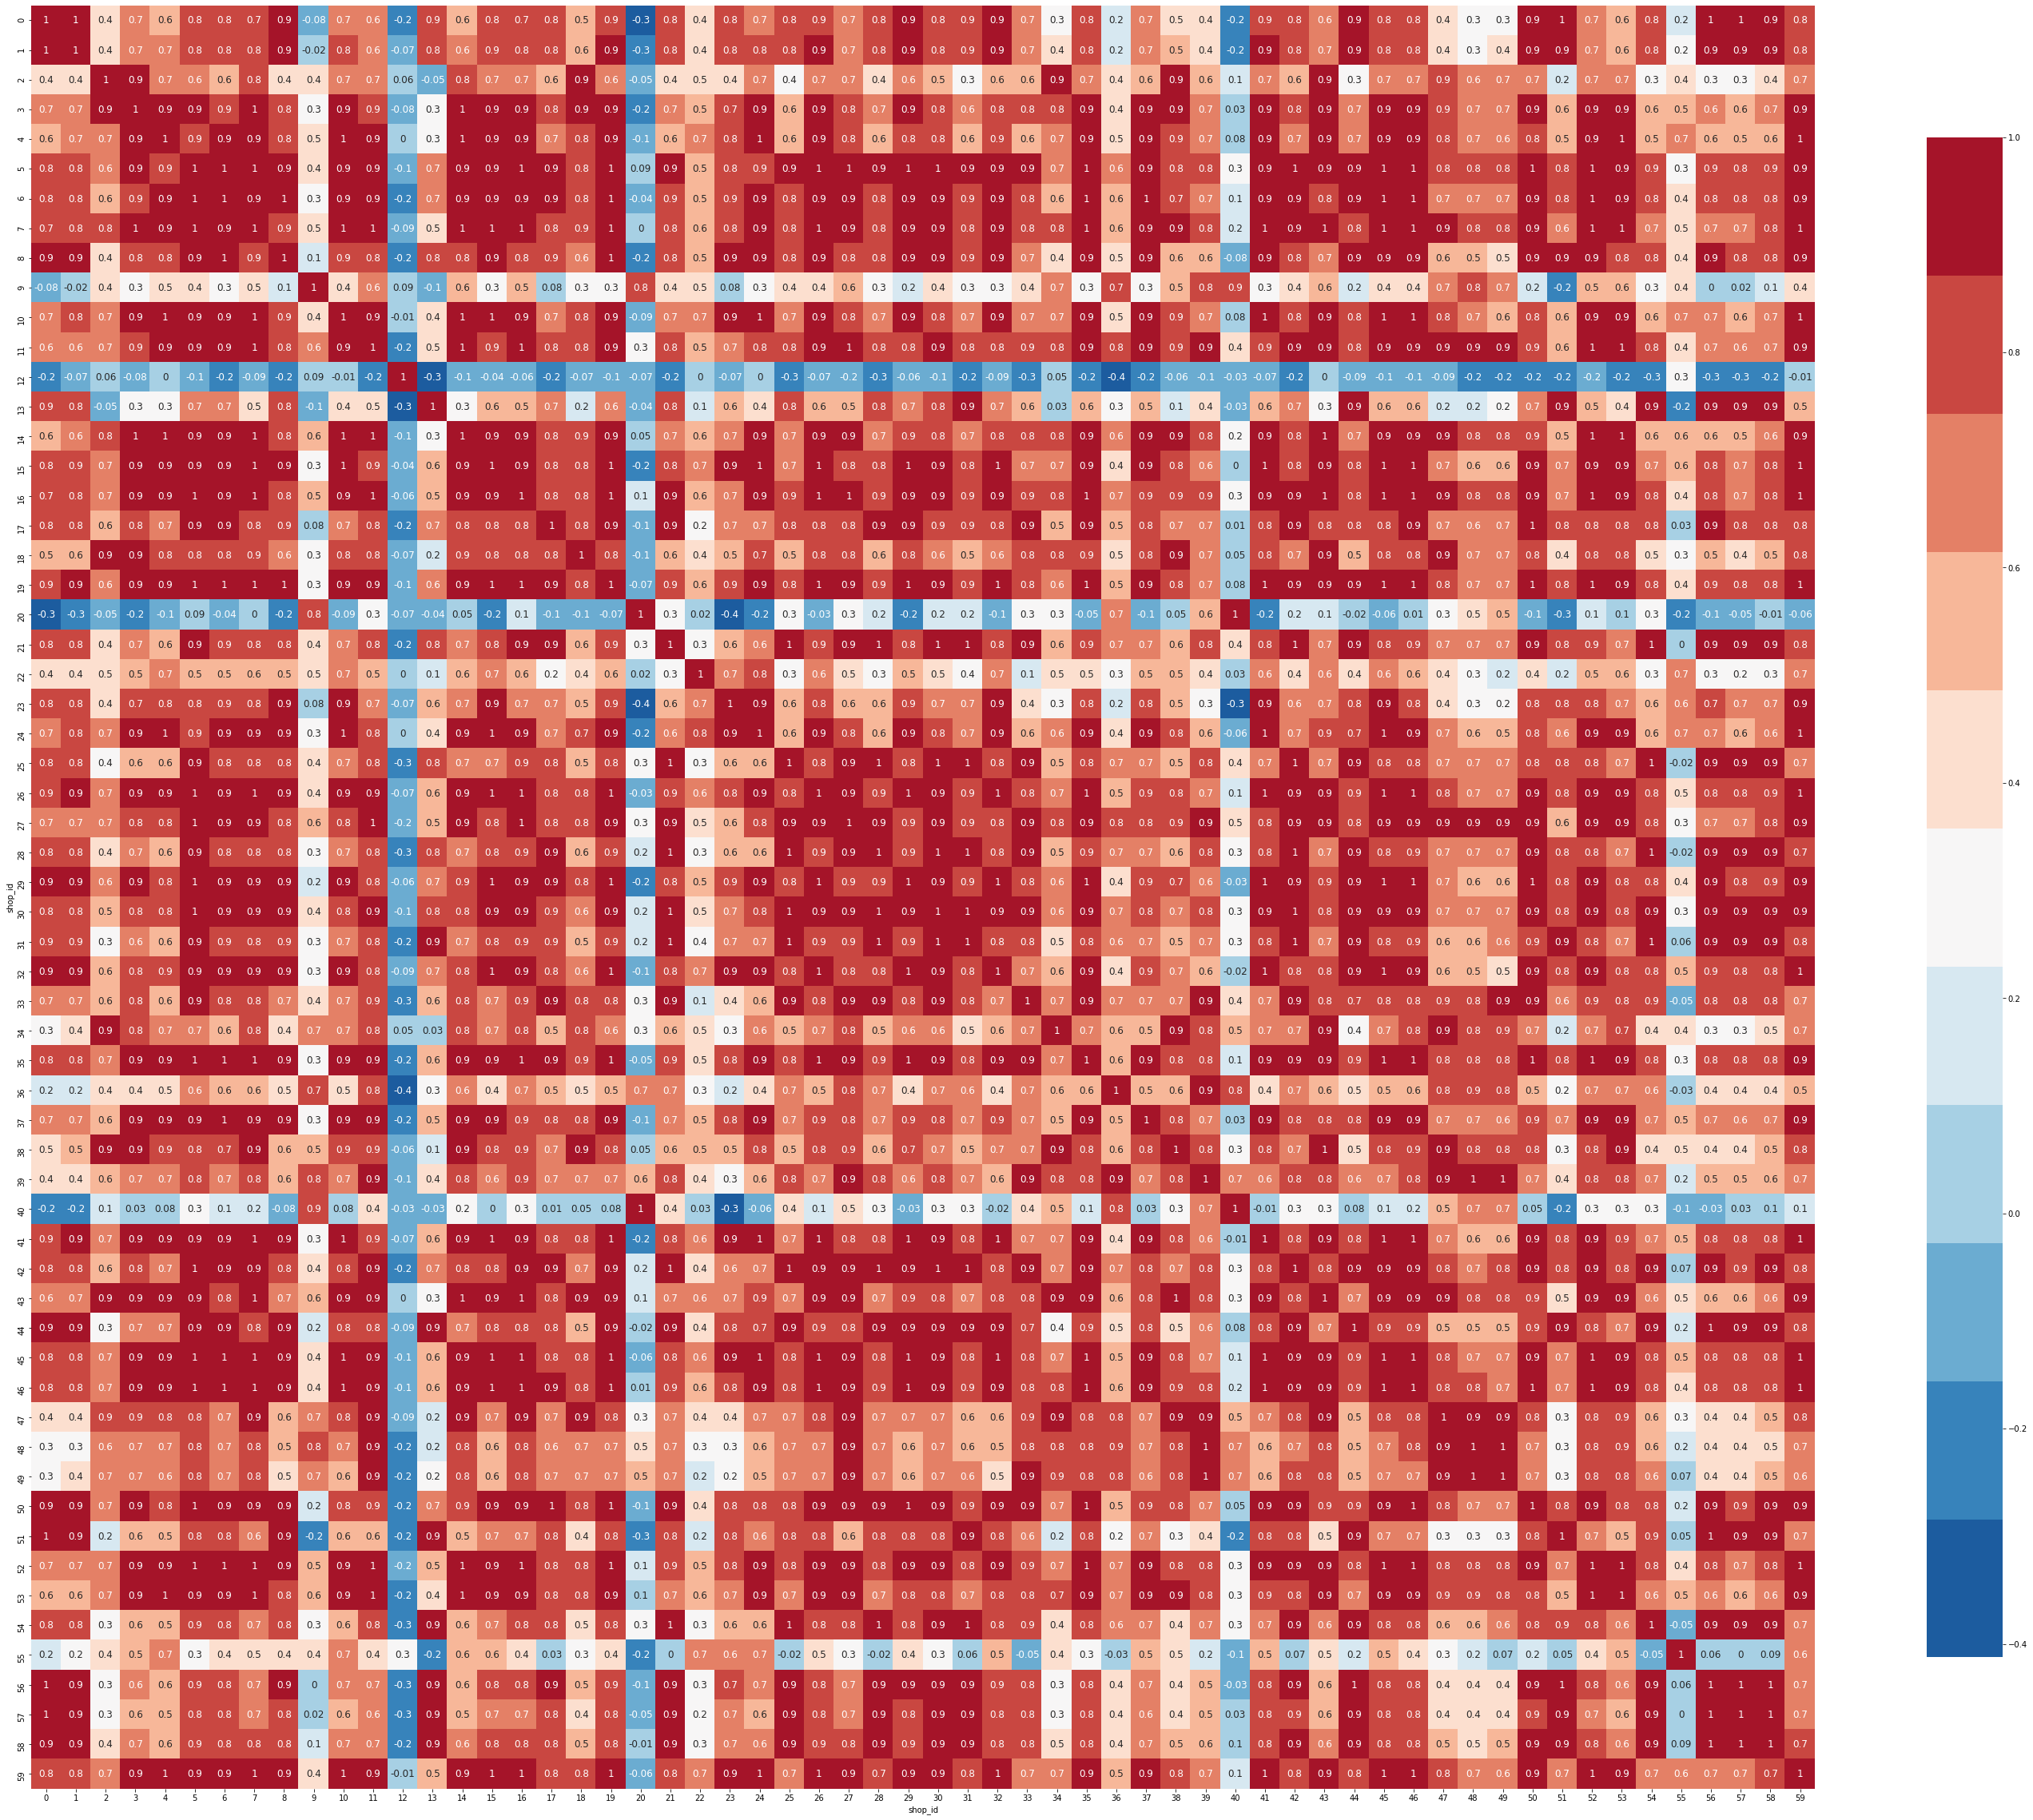

In [59]:
plt.rcParams["figure.figsize"] = [50,50]
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

h = sns.heatmap(corr_matrix_cat4,
                cmap= sns.color_palette("RdBu_r", 11), #sns.diverging_palette( 30, 50, s=90, l=60, n=11, center="dark"), #'coolwarm',
                annot=True,
                fmt= '.0g', #".1g", #".1f",
                annot_kws={'size':12},
                cbar=True,
                cbar_kws={"shrink": 0.7},
                square=True)
plt.show()

###Observations:  
Correlation differences are less striking with fewer categories (as expected).  Shops 9, 12, 13, 20, 40, 55 stand out.

Shops 10 and 11 are close enough to each other that we can combine them for training.

item_category3 seems to be a good balance between underfitting and overfitting

</br>

**Recommendations:**
* Merge shops 10 and 11
* Use item_category3 as a feature, rather than item_category_id
* Further investigation needed on shops 9, 12, 13, 20, 40, 55

#2.6 Core Data Sets:  EDA, Cleaning, Feature Generation

**Optional Section**

*  2.6) *sales_train* dataset EDA, outliers - cleaning
*  Include considerations with *test* dataset concerning overlap (or partial overlap) of *test* dataset inputs and *sales_train* training data

###2.6.1) *sales_train* data check for outliers or unusual trends

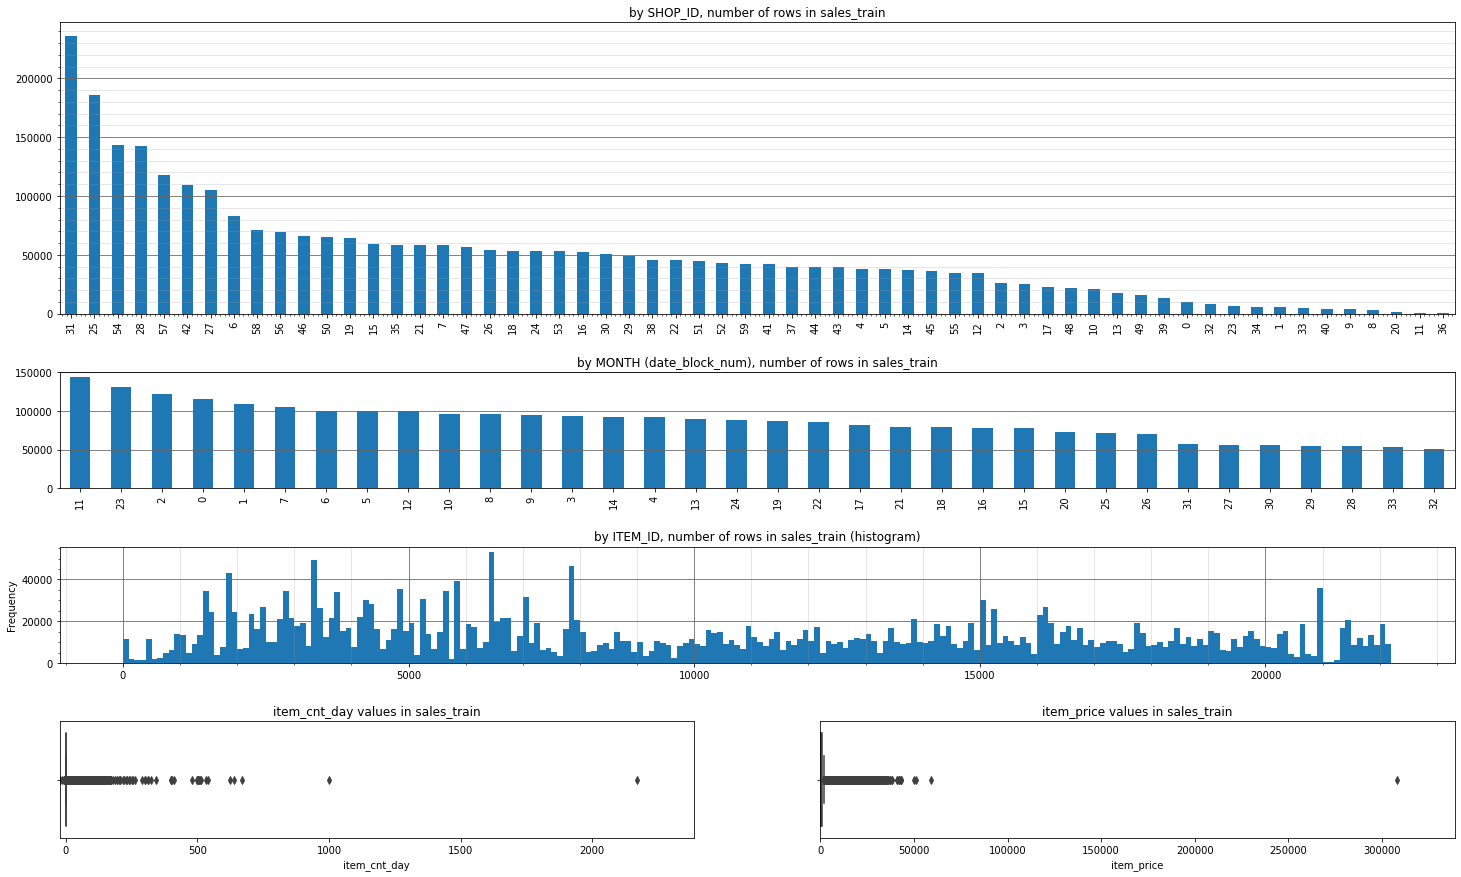

In [60]:
# Rough examination of sales_train data -- Plot histograms and bar/box plots of the features/values

fig = plt.figure(figsize=(25,15))
plt.subplots_adjust(hspace=.5)

# amount of training data vs. shop_id
plt.subplot2grid((5,2), (0,0), colspan = 2, rowspan = 2)
sales_train['shop_id'].value_counts(normalize=False).plot(kind='bar')
plt.title('by SHOP_ID, number of rows in sales_train')
plt.grid(b=True, which='major', axis='y', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', axis='y', color='#999999', linestyle='-', alpha=0.3)

# amount of training data vs. month
plt.subplot2grid((5,2), (2,0), colspan = 2)
sales_train['date_block_num'].value_counts(normalize=False).plot(kind='bar')
plt.title('by MONTH (date_block_num), number of rows in sales_train')
plt.grid(b=True, which='major', axis='y', color='#666666', linestyle='-')

# amount of training data vs. item_id
n_items = items.item_id.nunique()
binwidth = 100
plt.subplot2grid((5,2), (3,0), colspan = 2)
sales_train['item_id'].plot(kind='hist', bins=np.arange(0, n_items+binwidth, binwidth))
plt.title('by ITEM_ID, number of rows in sales_train (histogram)')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', axis='x', color='#999999', linestyle='-', alpha=0.3)
#plt.grid(b=None, which='minor', axis='y')

# item_cnt_day boxplot to look at outliers
plt.subplot2grid((5,2), (4,0))
plt.xlim(min(0,sales_train.item_cnt_day.min()*1.1), sales_train.item_cnt_day.max()*1.1)  # scale so we can see negative values
#plt.xscale("log")
plt.title('item_cnt_day values in sales_train')
sns.boxplot(x = sales_train.item_cnt_day)

# item prices boxplot to look at outliers
plt.subplot2grid((5,2), (4,1))
plt.xlim(min(0, sales_train.item_price.min()*1.1), sales_train.item_price.max()*1.1)  # scale so we can see negative values
#plt.xscale("log")
plt.title('item_price values in sales_train')
sns.boxplot(x = sales_train.item_price)

plt.show()

####2.6.1.1) *sales_train* data handling of outlier with negative price

       date_block_num  shop_id    item_id  item_price  item_cnt_day
count             100      100        100         100           100
mean            5.150   35.370 13,263.420       0.088         1.310
std             0.411    8.963  3,359.144       0.110         0.800
min                 4        6       2973          -1             1
25%                 5       29      11858       0.100             1
50%                 5       29      11864       0.100             1
75%                 5       44      11869       0.100             1
max                 7       58      20146       0.100             6


             date  date_block_num  shop_id  item_id  item_price  item_cnt_day
484683 2013-05-15               4       32     2973          -1             1
608763 2013-06-08               5       58    11865       0.070             1
579766 2013-06-11               5        6    11864       0.070             1
611400 2013-06-08               5       58    20146       0.087           

<Figure size 1152x360 with 0 Axes>

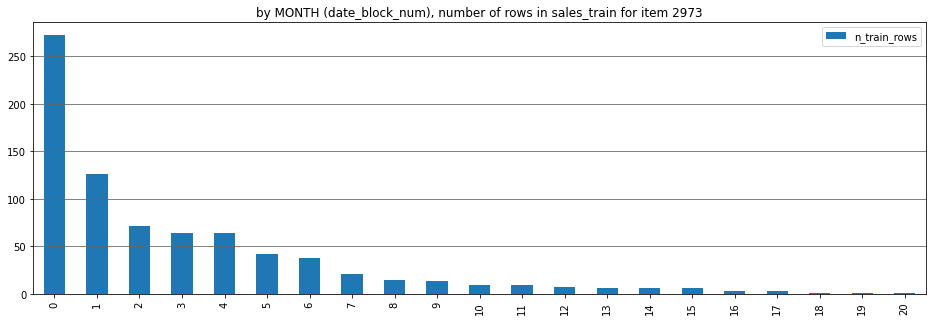

In [61]:
# look more closely at the items with very low price:
low_price = sales_train.sort_values('item_price')[:100]
print(low_price.describe())
print("\n")
print(low_price.head())

# seems to be one particular bad player... item 2973 from shop 6 in row 484683
#   look more at this item, shop, and item-shop combo:
print("\n")
print(2973 in test.item_id.to_list())
# this item is not in the test set... does it make up a significant amount of the train set?

print(f"Shop 32 = {shops_augmented.at[32,'en_shop_name']}", end="")
print(f", Item 2973 = {items_transl.at[2973,'en_item_name']}\n")

item2973 = sales_train[sales_train.item_id == 2973]
print(item2973.describe())
print("\n")
print(item2973.sort_values('item_price').head(10))
# only one sales_train row entry with price < 1000, and it is this negative outlier

print("\n")
item2973shop32 = item2973[item2973.shop_id == 32]
print(item2973shop32.describe())
print("\n")
print(item2973shop32.sort_values('date').head(15))
# it looks like perhaps this shop had a discount clearance sale in summer 2013, and
#  then never sold the item again

plt.rcParams["figure.figsize"] = [16,5]
fig = plt.figure() #figsize=(16,9))
#item2973.sort_values('date_block_num')['date_block_num'].value_counts().plot(kind='bar')
item2973.date_block_num.value_counts().reset_index().drop('index',axis=1).rename(columns={'date_block_num':'n_train_rows'}).plot(kind='bar')
plt.title('by MONTH (date_block_num), number of rows in sales_train for item 2973')
plt.grid(b=True, which='major', axis='y', color='#666666', linestyle='-')

plt.show()

# looks like this item has little bearing on sales in Nov. 2015, as its sales
#  died off (among all shops) by January 2015
# and, the one entry at row 484683 in sales_train with the negative price can be safely deleted

####2.6.1.2) *sales_train* data ouliers with high item_price and high item_cnt_day

        date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0 2015-01-15              24       12    20949           4          1000
1 2015-10-28              33       12    11373       0.909          2169
2 2013-12-13              11       12     6066      307980             1


Shop 12 = Shop Online Emergencies, Item 20949 = Corporate package white shirt 1C Interest (34 * 42) 45 m
Number of rows in sales_train for item 20949 = 31340

Shop 12 = Shop Online Emergencies, Item 11373 = Delivery to the delivery point (Boxberry)
Number of rows in sales_train for item 11373 = 464

Shop 12 = Shop Online Emergencies, Item 6066 = Radmin 3 - 522 persons.
Number of rows in sales_train for item 6066 = 1

False
              date  date_block_num  shop_id  item_id  item_price  item_cnt_day
1163158 2013-12-13              11       12     6066      307980             1
       date_block_num  shop_id  item_id  item_price  item_cnt_day
count           31340    31340    31340       31340    

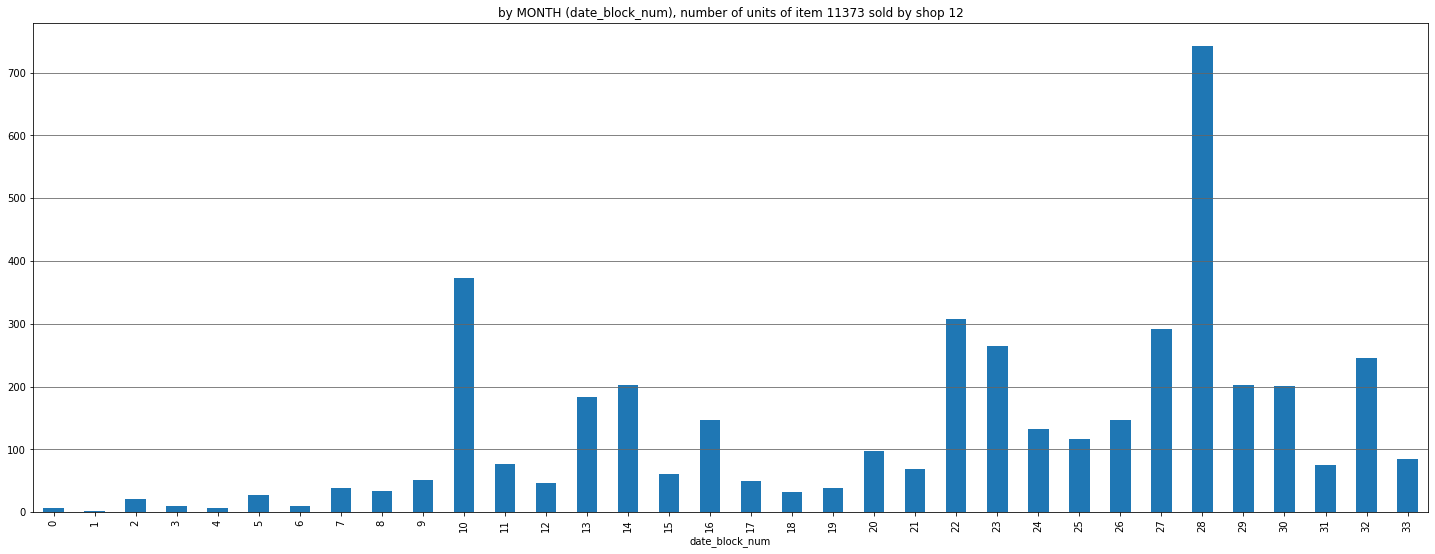

In [62]:
# What are the outliers?:
outliers = pd.concat( [sales_train[sales_train.item_cnt_day > 800],
                       sales_train[sales_train.item_price > 1e5]],
                      ignore_index=True ) 
print(outliers)
print("\n")
outlier_items = outliers.item_id.to_list()
outlier_shops = outliers.shop_id.to_list()
for row in range(len(outliers)):
  print(f"Shop {outlier_shops[row]} = {shops_augmented.at[outlier_shops[row],'en_shop_name']}", end="")
  print(f", Item {outlier_items[row]} = {items_transl.at[outlier_items[row],'en_item_name']}")
  print(f"Number of rows in sales_train for item {outlier_items[row]} = {len(sales_train[sales_train.item_id == outlier_items[row]])}\n")

# 300,000 rubles is about $400.  1 ruble is $0.014, so it looks like perhaps item_price is not in rubles
# is item 6066 even in the test set?  
print(6066 in test.item_id.to_list())
print(sales_train[sales_train.item_id == 6066])
# no it is not... so, let's just delete that row from the training data

# the other two items have a good number of rows in the sales_train dataset... let's look at their distributions
item20949 = sales_train[sales_train.item_id == 20949]
print(item20949.describe())
print(item20949.sort_values('item_cnt_day').tail(10))
item20949shop12 = item20949[item20949.shop_id == 12]
print(item20949shop12.describe())
print(item20949shop12.sort_values('item_cnt_day').tail(10))
print(20949 in test.item_id.to_list())
# Not good... shop12-item20949 is in our test set, but this pair only has three training rows, 
#   and the rows don't seem correlated by date in a way that they would help us predict sales for November 2015
#   However, we do see a rather large sale in October 2015, and the sparseness of the other sales would
#   suggest that shop12 won't sell another load of these items in the following month.
# I would recommend we remove the three rows from the training data, and set the test prediction = 0 sales for shop12-item20949
#   as a 'hard-wired' entry after model training and predictions are done.

item11373 = sales_train[sales_train.item_id == 11373]
print(item11373.describe())
print(item11373.sort_values('item_cnt_day').tail(10))
# only shop 12 sells item 11373; no other shops do
print(11373 in test.item_id.to_list())
fig = plt.figure(figsize=(25,9))
item11373.drop(2909818).sort_values('date_block_num').groupby('date_block_num')['item_cnt_day'].sum().plot(kind='bar')
plt.title('by MONTH (date_block_num), number of units of item 11373 sold by shop 12')
plt.grid(b=True, which='major', axis='y', color='#666666', linestyle='-')


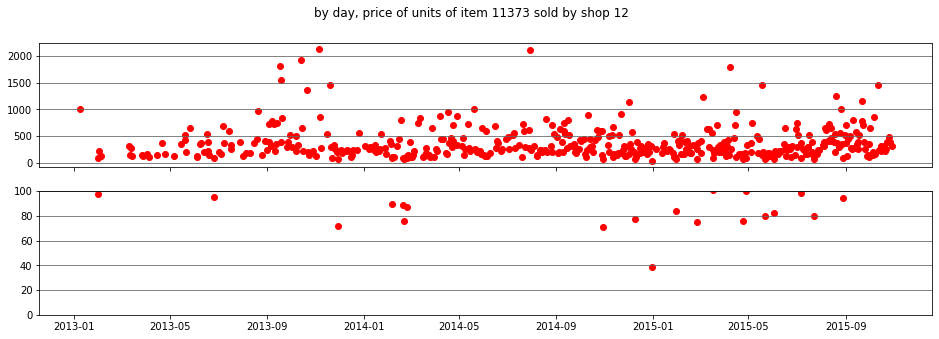

In [63]:
price11373 = item11373.drop(2909818).sort_values('date')

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('by day, price of units of item 11373 sold by shop 12')
ax1.scatter(price11373['date'], price11373['item_price'],color='red')
ax1.grid(b=True, which='major', axis='y', color='#666666', linestyle='-')
plt.ylim(0,100)
ax2.scatter(price11373['date'], price11373['item_price'],color='red')
ax2.grid(b=True, which='major', axis='y', color='#666666', linestyle='-')

plt.show()

# the price drops below 40 only on one day, and not by much
#  so, the sales_train row showing price of 0.9 and count of > 2000 seems to be a mistake
#  and, the best way I see of correcting it is to remove this row from sales_train before training

###2.6.2) Closer look at *sales_train* in conjunction with *test* dataset characteristics

####2.6.2.1) Some info on *sales_train* and *test* datasets

In [64]:
n_item_ids = items.item_id.nunique()
n_shop_ids = shops.shop_id.nunique()

print("------------------------------------------------------------------")
print("               SALES_TRAIN DATA SET")
print("------------------------------------------------------------------")
n_train_item_ids = sales_train.item_id.nunique()
n_train_shop_ids = sales_train.shop_id.nunique()
n_train_rows = len(sales_train)
train_shop_item_pairs = sales_train.groupby(['shop_id','item_id']).size().reset_index().rename(columns={0:'n_train_rows'})
train_shop_item_pairs['pair'] = list(zip(train_shop_item_pairs.shop_id, train_shop_item_pairs.item_id))  # make a column of (shop, item) tuples to compare with test set
n_train_shop_item_pairs = train_shop_item_pairs.pair.nunique()

print(f"Total number of rows in sales_train dataset: {n_train_rows:,d}")
print("\nWe are evaluated on predictions for a given shop-item pair, so let's group and explore:")
print(" _ _ _ _ _  grouping of sales_train dataset to show shop-item pairs _ _ _ _ _ _")
print(train_shop_item_pairs.head())
print("\nDataframe description of sales_train data grouped by shop_id and item_id:")
print(train_shop_item_pairs.describe())

print("\nThere are some apparent deficiencies in *sales_train* data:")
print("  1. SMALL AMOUNT OF TRAINING DATA:  Most of the data we are able to train on, for a given shop-item pair,")
print("         has relatively few rows present in the sales_train set, for most of the available shop-item pairs")
print("         (median is only 3 rows of training data for shop-item pairs, and 75th pctile is only 7 rows).")
print("  2. MISSING ITEMS: sales_train data does not contain rows for each and every item_id present in the items dataset:")
print(f"        Only {n_train_item_ids:,d} of {n_item_ids:,d} possible item_ids are in sales_train.", end=" ")
print(f" {n_item_ids - n_train_item_ids} are missing.")
print("        Good news: the maximum value of item_id in sales_train indicates the items dataset contains all items_ids in sales_train.")
print("  3. SHOPS (good news): sales_train data does contain transactions for each and every shop_id present in the shops dataset:")
print(f"        {n_train_shop_ids} of {n_shop_ids} possible shop_ids are in sales_train.")
print("  4. MISSING SHOP-ITEM PAIRS: sales_train data does not contain rows for a large number of the possible shop-item pairs:")
print(f"        Number of unique shop_id-item_id pairs in sales_train dataset: {n_train_shop_item_pairs:,d}.")
print(f"        Possible combinations of shop_ids and item_ids present in sales_train: {n_train_item_ids:,d} x {n_train_shop_ids} = {n_train_item_ids * n_train_shop_ids:,d}", end=" ")
print(f" ({n_train_item_ids * n_train_shop_ids - n_train_shop_item_pairs:,d} are not present in sales_train data.)")
print(f"        Possible combinations *all* available shop_ids and item_ids: {n_item_ids:,d} x {n_shop_ids} = {n_item_ids * n_shop_ids:,d}.", end=" ")
print(f" ({n_item_ids * n_shop_ids - n_train_shop_item_pairs:,d} are not present in sales_train data.)")
print(f"        Reminder FYI:  Total number of rows present in the given sales_train dataset: {n_train_rows:,d}")
print("\nLet's see the implications when we compare with the test dataset characteristics...")
print("\n\n")


print("------------------------------------------------------------------")
print("               TEST DATA SET")
print("------------------------------------------------------------------")
n_test_item_ids = test.item_id.nunique()
n_test_shop_ids = test.shop_id.nunique()
n_test_rows = len(test)
print(f"Total number of rows in test dataset: {n_test_rows:,d}")
print(f"Number of unique item_ids in test set: {n_test_item_ids:,d} out of {n_item_ids:,d} possible.")
# get category info on the 5100 items in the test data set:
items_transl_with_cat = items_transl.merge(item_categories_augmented[['item_category_id','en_cat_name','item_category1','item_category2','item_category3','item_category4']], 
                                           how='left', on='item_category_id').rename(columns={'en_cat_name':'category'})
test_with_cat = test.merge(items_transl_with_cat, how='left', on='item_id').drop(['item_name'], axis=1).rename(columns={'en_item_name':'item_name'})
test_category_ids = test_with_cat.item_category_id.unique()
test_category_names = test_with_cat.category.unique()
test_item_category3_names = test_with_cat.item_category3.unique()
test_item_category4_names = test_with_cat.item_category4.unique()
original_category_names = item_categories_augmented.en_cat_name.unique()
item_category3_names = item_categories_augmented.item_category3.unique()
item_category4_names = item_categories_augmented.item_category4.unique()
# which categories don't get tested?
untested_category_names = [x for x in original_category_names if x not in test_category_names]
untested_item_category3_names = [x for x in item_category3_names if x not in test_item_category3_names]
untested_item_category4_names = [x for x in item_category4_names if x not in test_item_category4_names]
print(f"Number of unique item_category_ids in test set: {len(test_category_ids)} out of {len(item_categories)} possible.")
print(f"Untested category names: {untested_category_names}")
print("(all categories explicitly involving 'PS2' or 'tickets' or 'Net carriers' are not in the test set)")
print(f"Number of unique item_category3 values in test set: {len(test_item_category3_names)} out of {len(item_category3_names)} possible.")
print(f"Untested item_category3 names: {untested_item_category3_names}")
print("(these untested item_category3 names correspond directly with 'tickets' and 'Net carriers' from the original category names)")
print(f"Number of unique item_category4 values in test set: {len(test_item_category4_names)} out of {len(item_category4_names)} possible.")
print(f"Untested item_category4 names: {untested_item_category4_names if untested_item_category4_names else 'None'}")
print("\nI'm liking item_category3 for use as a training feature, moreso than the original item_category designations\n")
print(f"Number of unique shop_ids in test set: {n_test_shop_ids} out of {n_shop_ids} possible.")
print(f"Number of possible unique combinations from item and shop ids present in the test set: {n_test_item_ids:,d} x {n_test_shop_ids} = {n_test_item_ids * n_test_shop_ids:,d}")
print("\nIt's apparent that the test set uses only select item_ids and shop_ids, yet creates all possible")
print("pairings of these select items and shops for us to predict, and every row in test set has a unique shop-item pair.")
print("   (because N rows in test set == N possible unique combinations of item and shop ids in test set)")
print("\nAs the test set uses fewer item_ids and fewer shop_ids than the train set, it is apparent that the train set")
print("contains rows with shop-item pairs that are not present in the test set.")
print("\nTherefore, we either have extranneous train data to discard, or we will need to generalize")
print("these non-corresponding train rows to help train the shop-item pairs that *are* relevant to test.")
print("\nNote:  In the EDA code further below, we will look more closely at shops, items, shop-item pairs,")
print("and item_categories to develop a plan for discarding or generalizing train data, so that we make")
print("best use of the sales_train data without overfitting or being influenced by outliers.")
print("\nLet's group the test dataset into shop-item pairs like we did above with the sales_train dataset,")
print("for a closer look at overlap between the two datasets:")
test_shop_item_pairs = test.groupby(['shop_id','item_id']).size().reset_index().rename(columns={0:'n_test_rows'})
test_shop_item_pairs['pair'] = list(zip(test_shop_item_pairs.shop_id, test_shop_item_pairs.item_id))  # make a column of (shop, item) tuples to compare with train set
test_shop_item_pairs['pair_in_train'] = test_shop_item_pairs.pair.isin(train_shop_item_pairs.pair)  # Boolean list to see if a given test shop-item pair is present in the train set
test_shop_item_pairs['item_in_train'] = test_shop_item_pairs.item_id.isin(train_shop_item_pairs.item_id)  # Boolean list to see if a given test shop-item pair is present in the train set
n_pairs_in_test_and_train = test_shop_item_pairs['pair_in_train'].sum()
n_rows_items_in_test_and_train = test_shop_item_pairs['item_in_train'].sum()

# add a column showing the number of rows in the sales_train set associated with each pair
test_shop_item_pairs = test_shop_item_pairs.merge(train_shop_item_pairs[['n_train_rows','pair']], how='left', on='pair').fillna(0)
# compute how many rows in the sales_train dataset deal with a test pair, a test item, and a test shop
n_rows_in_train_for_test_pairs = test_shop_item_pairs['n_train_rows'].sum()
n_rows_in_train_for_test_items = train_shop_item_pairs[train_shop_item_pairs['item_id'].isin(test_shop_item_pairs.item_id)]['n_train_rows'].sum()
n_rows_in_train_for_test_shops = train_shop_item_pairs[train_shop_item_pairs['shop_id'].isin(test_shop_item_pairs.shop_id)]['n_train_rows'].sum()

test_items = test.groupby(['item_id']).size().reset_index().rename(columns={0:'n_test_rows'})
test_items['item_in_train'] = test_items.item_id.isin(train_shop_item_pairs.item_id)  # Boolean list to see if a given test shop-item pair is present in the train set
n_items_in_test_and_train = test_items['item_in_train'].sum()


print("\n _ _ _ _ _  grouping of test dataset to show shop-item pairs _ _ _ _ _ _")
print(test_shop_item_pairs.head())
print("\nDataframe description of test data grouped by shop_id and item_id:")
print(test_shop_item_pairs.describe())
print(f"\nTotal number of rows in test dataset: {n_test_rows:,d}")
print(f"Number of 'True' entries in the pair_in_train column: {n_pairs_in_test_and_train:,d}")
print(f"Number of 'True' entries in the item_in_train column: {n_rows_items_in_test_and_train:,d}")
print(f"Number of unique item_ids with 'True' entries in the item_in_train column: {n_items_in_test_and_train:,d}")

print("\nLook at how many sales_train rows directly correlate with either the shops or items in the test set:")
print(f"Reminder FYI:  Total number of rows present in the given sales_train dataset: {n_train_rows:,d}")
print(f"Number of rows in sales_train dataset that have shop-item pair found in test: {int(n_rows_in_train_for_test_pairs):,d} or {100*n_rows_in_train_for_test_pairs/n_train_rows:.0f}%")
print(f"Number of rows in sales_train dataset that have item_id found in test: {int(n_rows_in_train_for_test_items):,d} or {100*n_rows_in_train_for_test_items/n_train_rows:.0f}%")
print(f"Number of rows in sales_train dataset that have shop_id found in test: {int(n_rows_in_train_for_test_shops):,d} or {100*n_rows_in_train_for_test_shops/n_train_rows:.0f}%")

print("\nThis further exposes deficiencies in the *sales_train* dataset:")
print(f"    1. SHOP-ITEM PAIR OVERLAP:  Only {n_pairs_in_test_and_train:,d} shop-item pairs are present in both test and train datasets.")
print(f"       Therefore, {n_test_rows - n_pairs_in_test_and_train:,d} pairs are present only in the test dataset.")
print(f"    2. ITEM OVERLAP:  Only {n_items_in_test_and_train:,d} items are present in both test and train datasets.")
print(f"       Therefore, {n_test_item_ids - n_items_in_test_and_train:,d} items are present only in the test dataset.")
print("       Good news: the maximum value of item_id in test set indicates the items dataset contains all items_ids in test.")
print(f"    3. More good news: sales_train contains rows for all {n_shop_ids} possible shops, thus it contains data for all {n_test_shop_ids} shops in the test set.")
print("\nRoughly half of our test predictions will be on shop-item pairs for which we have no previous data.")
print(f"Almost 15% of those {n_test_rows - n_pairs_in_test_and_train:,d} 'non-trained' shop-item pairs in the test set involve *item_id* for which we have no training data.")
print("\nSlightly less than half of our training data is directly associated with a shop-item pair present in our test set.")
print("\n------------------------------------------------------------------")
print("\nConclusion:  As important as it is for our model to generalize in time (to predict sales in the future month),")
print("our model will also need to generalize substantially in terms of item and in terms of shop-item pair.\n")

------------------------------------------------------------------
               SALES_TRAIN DATA SET
------------------------------------------------------------------
Total number of rows in sales_train dataset: 2,935,849

We are evaluated on predictions for a given shop-item pair, so let's group and explore:
 _ _ _ _ _  grouping of sales_train dataset to show shop-item pairs _ _ _ _ _ _
   shop_id  item_id  n_train_rows     pair
0        0       30             9  (0, 30)
1        0       31             7  (0, 31)
2        0       32            11  (0, 32)
3        0       33             6  (0, 33)
4        0       35            12  (0, 35)

Dataframe description of sales_train data grouped by shop_id and item_id:
       shop_id    item_id  n_train_rows
count   424124     424124        424124
mean    31.431 11,458.020         6.922
std     16.962  6,133.332        15.694
min          0          0             1
25%         18       6244             1
50%         30      11614        

In [0]:
optional_code = True  # in a code block: (at top of cell = notice for you; at bottom = prevents Jupyter printing """ comments)
'''
#################################################
#  Do NOT run unless recreating from beginning
#    This computation already stored in data file
#################################################

# add an extra column to the item_categories_augmented data file, indicating T/F if that row is in the test set

test_cats = test_with_cat.item_category_id.unique()
item_categories_augmented["item_cat_tested"] = False
for i in test_cats:
  item_categories_augmented.at[i,"item_cat_tested"] = True

item_categories_augmented.to_csv("data_output/item_categories_augmented.csv", index=False)
'''
optional_code = True  # in a code block: (at top of cell = notice for you; at bottom = prevents Jupyter printing """ comments)

####2.6.2.2) Analysis and treatment of 'nasty' shop_id - item_id pairs 
(those pairs present in the test set, but with little or no training data)

tbd... ongoing; not implemented in cleaning or feature generation yet


Nasty Pairs / Items / Shops are those present in the test set, but have little representation in the train set

Number of test set rows with shop-item pairs found in only 0 or 1 training rows = 125553
Number of shops present in nasty pairs (fewer than 2 training examples) = 42
Number of items present in nasty pairs (fewer than 2 training examples) = 5100



By shop in the test set, how many rows do we have in the train set?  (NOTE LOG Y Axis):

Looking only at the 42 shops present in the test set, and not including any item information, we find:
Shop 36 has the least training data, with a total of 306 rows in the sales_train dataset (paired with *any* item).
  Note that Novosibirsk SEC 'Gallery Novosibirsk' is shop 36, and is similar to 37 in name.
Shop 34 has a total of 5752 rows in the sales_train dataset (paired with *any* item).



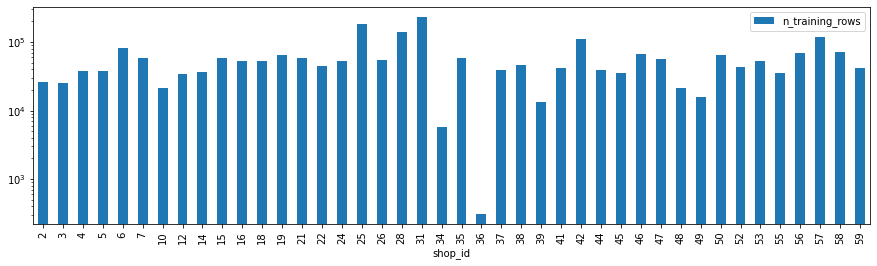

In [66]:
# Let's take a closer look at the bad pairs, shops, items (present in test but not in train, and/or present in both test and train, but with very few train rows)
print("\nNasty Pairs / Items / Shops are those present in the test set, but have little representation in the train set")
nasty_pairs = test_shop_item_pairs[test_shop_item_pairs.n_train_rows < 2]
print(f"\nNumber of test set rows with shop-item pairs found in only 0 or 1 training rows = {len(nasty_pairs)}")
print(f"Number of shops present in nasty pairs (fewer than 2 training examples) = {nasty_pairs.shop_id.nunique()}")
print(f"Number of items present in nasty pairs (fewer than 2 training examples) = {nasty_pairs.item_id.nunique()}\n")
#print(nasty_pairs.head())
print("\n")
#print(nasty_pairs.describe())
nasty_shops_train = sales_train.groupby('shop_id').count().reset_index().rename(columns={'item_id':'n_training_rows'})[['shop_id','n_training_rows']]
nasty_shops_train = nasty_shops_train[nasty_shops_train.shop_id.isin(nasty_pairs.shop_id)]

print("By shop in the test set, how many rows do we have in the train set?  (NOTE LOG Y Axis):")
print("\nLooking only at the 42 shops present in the test set, and not including any item information, we find:")
print(f"Shop 36 has the least training data, with a total of {sales_train[sales_train.shop_id == 36]['shop_id'].count()} rows in the sales_train dataset (paired with *any* item).")
print(f"  Note that Novosibirsk SEC 'Gallery Novosibirsk' is shop 36, and is similar to 37 in name.")
print(f"Shop 34 has a total of {sales_train[sales_train.shop_id == 34]['shop_id'].count()} rows in the sales_train dataset (paired with *any* item).\n")
plt.rcParams["figure.figsize"] = [15,4]
nasty_shops_train.plot(kind='bar',x='shop_id',y='n_training_rows', logy=True)

    item_id  n_training_rows
28      180                1
40      315                1
42      342                1
50      445                1
75      547                1
         item_id  n_training_rows
count        446              446
mean  10,553.451            0.186
std    6,564.726            0.390
min           83                0
25%    5,320.250                0
50%        10000                0
75%   15,868.500                0
max        22137                1

A total of 83 of the items in the test set have only 1 row in the train set.
And, as determined earlier, 363 items in the test set have 0 rows in the train set
Total items with 0 or 1 rows in train set: 446
Let's have a look at some of their item names...

                                                                         item_name                     category
0    1C: Audiobooks. Epics of the Russian people. Collection [PC, Digital Version]  Books - Audiobooks (figure)
1           1C: Audiobooks. Mark Twain

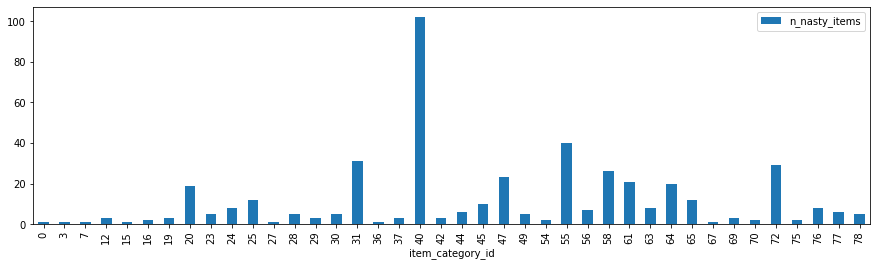

In [67]:
nasty_items_train = sales_train.groupby('item_id').count().reset_index().rename(columns={'shop_id':'n_training_rows'})[['item_id','n_training_rows']]
nasty_items_train = nasty_items_train[nasty_items_train.item_id.isin(nasty_pairs.item_id)]  # keep only items that are in the set of 5100 test set items
nasty_items_train = nasty_items_train.merge(test_items, how='right', on='item_id').fillna(0)  # include the items that are only found in the test set
nasty_items_train = nasty_items_train[nasty_items_train.n_training_rows < 2][['item_id','n_training_rows']]
print(nasty_items_train.head())
print(nasty_items_train.describe())

print("\nA total of 83 of the items in the test set have only 1 row in the train set.")
print("And, as determined earlier, 363 items in the test set have 0 rows in the train set")
print(f"Total items with 0 or 1 rows in train set: {len(nasty_items_train)}")
print("Let's have a look at some of their item names...\n")
nasty_items_train2 = nasty_items_train.merge(items_transl_with_cat, how='left', on='item_id').drop(['item_name'], axis=1).rename(columns={'en_item_name':'item_name'})
print(nasty_items_train2[['item_name','category']].head())

print("\nThere are too many items to deal with manually in some fashion at this time,")
print("so let's reduce the info by grouping into item categories.")
nasty_categories = nasty_items_train2.groupby(['item_category_id','category']).count().reset_index()[['item_id','item_category_id','category']].rename(columns={'item_id':'n_nasty_items'})
print(f"Total number of unique item_category_id values present in 'nasty items' is: {nasty_categories.category.nunique()}\n")
print(nasty_categories.head())
nastiest_cat_row = nasty_categories.loc[nasty_categories.n_nasty_items.argmax()]
print(f"\nThe nastiest category is #{nastiest_cat_row.item_category_id}, '{nastiest_cat_row.category}'\n")

plt.rcParams["figure.figsize"] = [15,4]
nasty_categories.plot(kind='bar',x='item_category_id',y='n_nasty_items', logy=False)

In [68]:
print("\nAnd let's have a look at item_category1 to see if there is a tighter distribution:")
nasty_Subcategories1 = nasty_items_train2.groupby('item_category1').count().reset_index()[['item_id','item_category1']].rename(columns={'item_id':'n_nasty_items'})
print(f"Total number of unique item_category1 values present in 'nasty items' is: {nasty_Subcategories1.item_category1.nunique()}\n")
nasty_Subcategories1


And let's have a look at item_category1 to see if there is a tighter distribution:
Total number of unique item_category1 values present in 'nasty items' is: 13



,n_nasty_items,item_category1
0,2,Accessories
1,1,Audio
2,49,Books
3,6,Consoles
4,1,Debit_Cards
5,92,Games
6,96,Gifts
7,0,Internet
8,105,Movies
9,73,Music


In [0]:
# to be continued...

##**Summary of sales_train vs. test datasets:**

###**Numerical Recap:**


*  There are 424,124 unique pairs of "shop_id" with "item_id" in the 2,935,849 rows of the *sales_train* dataset

*  Half the shop-item pairs have 3 or fewer rows in the entire *sales_train* dataset, and at least 25% of the shop-item pairs have only 1 row in the *sales_train* dataset.

*  There are 22,170 unique item_id values in the *items* dataset, of which only 21,807 are present in the *sales_train* dataset.  Only 5,100 of the 22,170 items are present in the *test* dataset.  The 363 items present in the *items* dataset but not in the *sales_train* dataset are ***all present*** in the *test* set.  Therefore, of the 5,100 unique items in the *test* set, only 5,100 - 373 = 4737 items are also present in the *sales_train* set.  Our model will have to make predictions on sales of 363 items for which we have no historical record of ever being sold.

*  There are 60 unique shop_id values in the *shops* dataset, all of which are present in the *sales_train* dataset, but only 42 of which are present in the *test* dataset.

*  The *test* dataset has 214,200 rows.  This happens to be equal to 5,100 \* 42, which is the number of possible unique pairings for the shop_ids and item_ids present in the *test* dataset.  There are no duplicate rows in the *test* dataset, so we know that the *test* set contains every possible pairing of the 42 shops with the 5100 items.

*  Of the 214,200 unique shop-item pairs in the *test* set, only 111,404 of them are present in the *sales_train* data set.  Therfore, our model will need to predict sales for a very large number of items at shops that have no recorded history of selling that item previously.  This type of "novel" prediction makes up roughly half of the total predictions we need to make.

*  All of the 42 unique *test* set shop_ids are present in both the set of shop-item pairs common to *test* and *sales_train* as well as the set of shop-item pairs found only in the *test*

*  All 5,100 unique item_id values in the *test* set are found in the set of shop-item pairs found in *test* but not in *sales_train*.  Only 4,716 unique item_id values are in the *test* set corresponding to shop-item pairs that are present in both *test* and *sales_train*.

###**Issues:**

1.  LACK OF TRAINING DATA: For most shop-item pairs, the sales_train training data has relatively few rows describing any day's transactions.  Statstical analysis indicates that at least half the shop-item pairs have 3 or fewer rows in the sales_train dataset.  (*Caveat*:  this could be a manifestation of unnecessary rows in the items dataset.  It appears as though the items dataset does not truly describe 21,700 very different objects, but rather has multiple rows referring to the same (or nearly the same) object, and are in separate rows because one shop may have slightly different nomenclature from another shop.  We will look at this below, and see if it is feasible to compress the items dataset.)

2.  NO TRAINING EXAMPLES FOR HALF OF TEST QUERIES:  Roughly half the shop-item pairs present in the test dataset have no training data present in the sales_train dataset.  Almost 15% of these 'no-train-data' shop-item pairs in the test set come from item_ids which are not present at all in the sales_train dataset.

###**Observations:**

1.  As per the explicit guidelines for the competition, our model must be able to generalize in time -- such that it can predict an unknown future (i.e., a test set that has dates which are not present in the training set).  From the above EDA, it is apparent that our model also needs to be powerful in generalizing for item_id and for shop_id-item_id pairs (i.e., the test set includes item_ids and shop_id-item_id pairs which are not present in the training set).  There are a substantial number of these non-overlapping train/test items and shop-item pairs.

2.  For feature generation and model inputs, one might focus on the competition guidelines and create such things based on time (e.g., only looking at November sales, or looking at the predictive power of a previous month's sales (or previous day/week/season/year)) by creating time-lag inputs to the model.  We know from the above EDA that it is also going to be important to create features based on item_id and shop_id-item_id pair.  For example, do some item_ids have predictive power for other item_ids in time (not just for the same item_id, but generalized to other item_ids as well)?  Or, do some item_ids behave similarly to other item_ids such that we can group them and essentially have more training data for a given item_id?  (And, can we gather information from the items dataset or item_categories dataset that will help us generalize further to predict the test queries with items that have no training data.)  Similarly, shop-item pairs need to be considered.

###**A few questions to think about:**

1.  At one extreme, we could train our model for the 111,404 shop-item pairs that are in both the *test* and the *sales_train* sets, and predict 0 sales for the shop-item pairs that historically have not existed?  </br>
Or, perhaps instead of setting predicted sales to 0 for those shop-item pairs with no historical information, we assign weights so that in some way the *test* set's novel pairs are treated differently?

2.  More optimistically, we might think it is possible that certain shops lag other shops in obtaining items for sale.  For the novel *test* set pairs we should look to predict from our model by extrapolating *sales_train* data from similar shops and items in previous months.</br>
It could help to have a "similarity" metric between each of the shop-item pairs in the *test* set and each of the shop-item pairs in the *sales_train* set, and use this metric to restrict which shop-item pairs in the *sales_train* set are useful for predicting the sales of novel shop-item pairs in the *test* set.

3.  Do we use the full *sales_train* dataset to train our model, or do we eliminate certain rows that pertain to irrelevant shop_id or item_id or shop-item pairs?</br>
The *shops* dataframe is only 60 rows, so it shouldn't be too hard to analyze manually and see if we can find some sort of data leak that allows us to use only a subset of the shops when training our model.  We should certainly keep all *sales_train* data pertaining to the 42 shops in the *test* set, but how much of the data from the other 18 shops should we use to train our model?

4.  Because we will be predicting future sales of 363 items of which we have no record of ever being sold, we will need to rely heavily on item category or other similarities with items that we *do* have in our *sales_train* set.  We need to establish correlations between item_ids and shop_ids that we can exploit to predict future sales of shop-item pairs that have no historical record.

#2.5 items database EDA / Cleaning / Feature Gen
Temporarily moved below section 2.6 so I can select this here text box and tell Colab to "run before" and execute all the above cells when I start a new runtime.

Then, I can get to work on the NLP in section 2.5, knowing all my variables and such are properly assigned.

##2.5) ***items*** Dataset: EDA, Cleaning, and Feature Generation

---



---



####Quick look at original *items* dataset

In [70]:
items.describe

<bound method NDFrame.describe of                                                                   item_name  item_id  item_category_id
0                                 ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0                40
1      !ABBYY FineReader 12 Professional Edition Full [PC, Цифровая версия]        1                76
2                             ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2                40
3                           ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3                40
4                               ***КОРОБКА (СТЕКЛО)                       D        4                40
...                                                                     ...      ...               ...
22165                                Ядерный титбит 2 [PC, Цифровая версия]    22165                31
22166                       Язык запросов 1С:Предприятия  [Цифровая версия]    22166                54
22167                 Язык запросов 1С:

In [71]:
items.head(2)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,"!ABBYY FineReader 12 Professional Edition Full [PC, Цифровая версия]",1,76


In [72]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


###2.5.1) **Translate and Ruminate**
We will start by translating the Russian text in the dataframe, and add our ruminations on possible new features we can generate.

The dataframe *items_transl* (equivalent to *items* plus a column for English translation) is saved as a .csv file so we do not have to repeat the translation process the next time we open a Google Colab runtime.

####Translation Code for 22,170-row *items* data set
Skip this section if you have already loaded the items_transl dataframe from previous translation efforts (save yourself about 15 hours)

In [73]:
'''
#use this if you don't already have items_transl loaded:
temp_store = []
items_transl = items.copy(deep=True)
items_transl['en_item_name']= ""  # initialize an empty column
'''

'\n#use this if you don\'t already have items_transl loaded:\ntemp_store = []\nitems_transl = items.copy(deep=True)\nitems_transl[\'en_item_name\']= ""  # initialize an empty column\n'

In [74]:
'''
# google translate API is reliable for me only if I submit fewer than about 1 request every 2 seconds
#   below is a loop to translate all item_name cells for the 22,170 rows of the items dataframe

translator = Translator()

progress_counter = 0
progress_interval = 500  # we will print out a row number every 500 translations, for confirmation things are working OK (it takes several hours at 2sec per translation)
for i in range(len(items_transl)):
  items_transl.at[i,'en_item_name'] = translator.translate(items_transl.at[i,'item_name'],src='ru',dest='en').text
  if i//progress_interval > progress_counter:
    progress_counter += 1
    print("Translation completed for row number: " + str(i) + " at " + strftime("%H:%M",localtime()))
  sleep(2)

items_transl.to_csv("data_output/items_transl.csv", index = False)
items_transl.head()
'''

'\n# google translate API is reliable for me only if I submit fewer than about 1 request every 2 seconds\n#   below is a loop to translate all item_name cells for the 22,170 rows of the items dataframe\n\ntranslator = Translator()\n\nprogress_counter = 0\nprogress_interval = 500  # we will print out a row number every 500 translations, for confirmation things are working OK (it takes several hours at 2sec per translation)\nfor i in range(len(items_transl)):\n  items_transl.at[i,\'en_item_name\'] = translator.translate(items_transl.at[i,\'item_name\'],src=\'ru\',dest=\'en\').text\n  if i//progress_interval > progress_counter:\n    progress_counter += 1\n    print("Translation completed for row number: " + str(i) + " at " + strftime("%H:%M",localtime()))\n  sleep(2)\n\nitems_transl.to_csv("data_output/items_transl.csv", index = False)\nitems_transl.head()\n'

###Thoughts regarding items dataframe
Let's first look at how many training examples we have to work with...

Many of the items have similar names, but slightly different punctuation, or only very slightly different version numbers or types.  (e.g., 'Call of Duty III' vs. 'Call of Duty III DVD')

One can expect that these two items would have similar sales in general, and by grouping them into a single feature category, we can eliminate some of the overfitting that might come as a result of the relatively small ratio of (training set shop-item-date combinations = 2935849)/(total number of unique items = 22170).  (This is an average of about 132 rows in the sales_train data for each shop-item-date combination that we are using to train our model.  Our task is to produce a monthly estimate of sales (for November 2015), so it is relevant to consider training our model based on how many sales in a month vs. how many sales in the entire training set.  Given that the sales_train dataset covers the time period from January 2013 to October 2015 (34 months), we have on average fewer than 4 shop-item combinations in our training set for a given item in any given month.  Furthermore, as we are trying to predict for a particular month (*November* 2015), it is relevant to consider how many rows in our training set occur in the month of November.  The sales_train dataset contains data for two 'November' months out of the total 34 months of data.  Another simple calculation gives us an estimate that our training set contains on average 0.23 shop-item combinations per item for November months.

To summarize:

*  *sales_train* contains 34 months of data, including 2935849 shop-item-date combinations
*  *items* contains 22170 "unique" item_id values

In the *sales_train* data, we therefore have:
*  on average, 132 rows with a given shop-item pair for a given item_id
*  on average, 4 rows with a given shop-item pair for a given item_id in a given month
*  on average, 0.23 rows with a given shop-item pair for a given item_id in all months named 'November'

If we wish to improve our model predictions for the following month of November, it behooves us to use monthly grouping of sales, or, even better, November grouping of sales.  This smooths out day-to-day variations in sales for a better monthly prediction.  However, the sparse number of available rows in the *sales_train* data will contribute to inaccuracy in our model training and predictions.

Imagine if we could reduce the number of item_id values from 22170 to perhaps half that or even less.  Given that the number of rows for training (per item, on a monthly or a November basis) is so small, then such a reduction in the number of item_id values would have a big impact.  (The same is true for creating features to supplement "shop_id" so as to group and reduce the individuality of each shop - and thus effectively create, on average, more rows of training data for each shop-item pair.

In [75]:
print(items_transl.info())
print("\n")
print(items_transl.tail(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
 3   en_item_name      22170 non-null  object
dtypes: int64(2), object(2)
memory usage: 692.9+ KB
None


                                                   item_name  item_id  item_category_id                                           en_item_name
22160                             ЯРМАРКА ТЩЕСЛАВИЯ (Регион)    22160                40                                   Vanity Fair (Region)
22161                       ЯРОСЛАВ. ТЫСЯЧУ ЛЕТ НАЗАД э (BD)    22161                37                YAROSLAV. Thousands of years ago e (BD)
22162                                                 ЯРОСТЬ    22162                40                                         

####NLP for feature generation from items dataframe
Automate the search for commonality among items, and create new categorical feature to prevent overfitting from close similarity between many item names

####Investigate possibility of using NLP to reduce or regularize the items dataset

---

---


In [76]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
# use wordnet??
from nltk.corpus import wordnet as wn
# example uses of wordnet
w = "volume iiii"
print(f"Lemmatization of '{w}'':", lemmatizer.lemmatize(w)) 
w = "rocks"
print(f"Lemmatization of '{w}'':", lemmatizer.lemmatize(w)) 
wn.synsets('rus')

# Here is the approach I plan to take to look at item name similarity:
#   1) vectorize item names, with vector elements chosen as follows:
#         a) uncommon words or part numbers found inside delimiters like () or [] or / / etc.
#               1.) large "n" n-grams
#               2.) part numbers and uncommon words
#         b) uncommon words in entire item name (not only delimited words)
#         c) words used in "item_categories" names, supplemented
#         d) special descriptors like edition number, english/russian, etc.  (keep all numbers as "words")
#   2) compute cosine similarity or other method giving special weight to the above tiers
#   3) manually investigate item names with very high similarity, and combine if actually the same name
#   4) set a certain similarity limit, and item groups above that limit will form new item categories (target: 2000 categories)
#   5) check any items not in one of these new categories, and see if they are tested... if so, assign to closest of the new categories
#
# Idea is to then use the 2000 category list instead of item name as a key feature in fitting the model, both to help
#   regularize, and to help generalize to the items in test set that are not in train set
#
# What words are "uncommon"?
#   Use the top 50,000 words in 2018 database of movie/tv subtitles from https://github.com/hermitdave/FrequencyWords
#   The en_50k dataframe has the 50,000 most-commonly found words in this database, along with a number of "counts" 
#   or appearances in that text corpus.  The word count gives us an idea of word popularity (higher count = higher popularity of use)
#   We can then do an inverse-frequency type of word characterization on our item names
# Why not use a pre-existing word vectorizer package to create our item_name vectors?...
#   because this 21,700 item database is somewhat unique in that it is heavily weighted 
#   towards Russian entertainment sales.  We don't want word vectors that ignore things 
#   like xbox versus playstation.  We want to "tweak" the vectors to help us form relevant 
#   item groups, and not just use any word in the item name to dominate in group identification
#   (We know, for example, that the word "rus" is likely to mean "Russian" in our database,
#   whereas a standard vectorizer would either characterize it as "rus" or as "ruthenium" perhaps)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Lemmatization of 'volume iiii'': volume iiii
Lemmatization of 'rocks'': rock


[Synset('rus.n.01'), Synset('ruthenium.n.01')]

#####Investigating "special" delimited word groups (like this) or [here] or /hobbitville/ that are present in item names, and may be particularly important in creating n>1 n-grams for uniquely identifying items so that we can tell if two items are the same or nearly the same

In [0]:
# explanation of regex string I'm using to parse the item_name
'''

^\s+|\s*[,\"\/\(\)\[\]]+\s*|\s+$

gm
1st Alternative ^\s+
^ asserts position at start of a line
\s+ matches any whitespace character (equal to [\r\n\t\f\v ])
+ Quantifier — Matches between one and unlimited times, as many times as possible, giving back as needed (greedy)

2nd Alternative \s*[,\"\/\(\)\[\]]+\s*
\s* matches any whitespace character (equal to [\r\n\t\f\v ])
* Quantifier — Matches between zero and unlimited times, as many times as possible, giving back as needed (greedy)
Match a single character present in the list below [,\"\/\(\)\[\]]+
+ Quantifier — Matches between one and unlimited times, as many times as possible, giving back as needed (greedy)
, matches the character , literally (case sensitive)
\" matches the character " literally (case sensitive)
\/ matches the character / literally (case sensitive)
\( matches the character ( literally (case sensitive)
\) matches the character ) literally (case sensitive)
\[ matches the character [ literally (case sensitive)
\] matches the character ] literally (case sensitive)
\s* matches any whitespace character (equal to [\r\n\t\f\v ])
* Quantifier — Matches between zero and unlimited times, as many times as possible, giving back as needed (greedy)

3rd Alternative \s+$
\s+ matches any whitespace character (equal to [\r\n\t\f\v ])
+ Quantifier — Matches between one and unlimited times, as many times as possible, giving back as needed (greedy)
$ asserts position at the end of a line

Global pattern flags
g modifier: global. All matches (don't return after first match)
m modifier: multi line. Causes ^ and $ to match the begin/end of each line (not only begin/end of string)
'''
commented_cell = True  # prevent Jupyter from printing triple-quoted comments

In [0]:
# before removing undesirable characters / punctuation from the item name,
#   let's see if we can find n-grams or useful describers or common abbreviations by looking between the nasty characters
# first, let's see what characters are present in the en_item_name column
'''
nasty_symbols = re.compile('[^0-9a-zA-Z ]')
nasties = set()
for i in range(len(items_transl)):
  n = nasty_symbols.findall(items_transl.at[i,'en_item_name'])
  nasties = nasties.union(set(n))
print(nasties)
{'[', '\u200b', 'ñ', '(', ')', '.', 'à', '`', 'ó', '®', 'Á', 
'\\', 'è', '&', '-', ':', 'ë', '_', 'û', '»', '=', '+', ']', ',', 
'«', 'ú', "'", 'ö', '#', 'ä', ';', 'ü', '"', 'ô', '/', '№', 'é', 
'í', '!', '°', 'å', '*', 'ĭ', 'ð', '?', 'â'}
'''
# From the above set of nasty characters, it looks like slashes, single quotes, double quotes, parentheses, and square brackets might enclose relevant n-grams
# Let's pull everything from en_item_name that is inside ' ', " ", (), or [] and see how many unique values we get, and if they are n-grams or abbreviations, for example
# It also seems that many of the item names end in a single character "D" for example, which should be converted to DVD
# Let's set up columns for ()[]-grams, for last string in the name, and for first string in name, and for text that precedes ":", and for text that surrounds "&" or "+"
#   but first, we will strip out every nasty character except ()[]:&+'"/ and replace the nasties with spaces, then eliminating double spaces
# And, let's add a boolean column for whether or not that item is in the test set

'''
# sanity check:
really_nasty_symbols = re.compile('[^0-9a-zA-Z \(\)\[\]:&+\'"/]')
really_nasties = set()
for i in range(len(items_transl)):
  rn = really_nasty_symbols.findall(items_transl.at[i,'en_item_name'])
  really_nasties = really_nasties.union(set(rn))
print(really_nasties)
{'\u200b', 'ñ', '.', 'à', '`', 'ó', '®', 'Á', '\\', 'è', '-', 'ë', '_', 'û', '»', '=', ',', '«', 'ú', 'ö', '#', 'ä', ';', 'ü', 'ô', '№', 'é', 'í', '!', '°', 'å', '*', 'ĭ', 'ð', '?', 'â'}
OK, looks good
'''
commented_cell = True  # prevent Jupyter from printing triple-quoted comments

In [113]:
items_delimited = items_transl.copy(deep=True)
# delete the wide "item_name" column so we can read more of the data table width-wise
items_delimited = items_delimited.drop("item_name", axis=1).rename(columns = {'en_item_name':'item_name','item_category_id':'i_cat_id'})
#print(items_delimited.head())
items_in_test_set = test.item_id.unique()
items_delimited["i_tested"] = False
for i in items_in_test_set:
  items_delimited.at[i,"i_tested"] = True

nasty_symbols_re = re.compile('[^0-9a-zA-Z ]')
really_nasty_symbols_re = re.compile('[^0-9a-zA-Z \(\)\[\]\:\&\+\'"/]')
multiple_whitespace_re = re.compile('[ ]{2,}')
#multiple_slash_re = re.compile('[/]{2,}')
delimiters_re = re.compile('[\(\)\[\]"/]')
delim_pattern_re = re.compile('^\s+|\s*[,\"\/\(\)\[\]\:]+\s*|\s+$') # special symbols indicating a
d_to_dvd_re = re.compile('\s+d$')  #several item names end in "d" -- which actually seems to indicate dvd (because the items I see are in category 40: Movies-DVD)... standardize so d --> dvd
digitalin_to_digitalversion_re = re.compile('digital in$') # several items seem to end in "digital in"... maybe in = internet?, but looking at nearby items/categories, 'digital version' looks standard
conjunctions_re = re.compile('\s*[\+\:\&]\s*')

def text_total_clean(text):
    #text: the original en_item_name
    #return: en_item_name made lowercase, stripped of "really_nasties" and multiple spaces
    #     NOTE: this is not stripping stopwords
    text = text.lower()
    text = d_to_dvd_re.sub(" dvd", text)
    text = digitalin_to_digitalversion_re.sub("digital version",text)
    text = nasty_symbols_re.sub("", text)  # just delete anything other than letters, numbers, and spaces
    text = multiple_whitespace_re.sub(" ", text)  # replace multiple spaces with a single space
    return text

def text_clean_delimited(text):
    #text: the original en_item_name
    #return: en_item_name made lowercase, stripped of "really_nasties" and multiple spaces, in a list of strings that had been separated by one of the above "delimiters"
    #     NOTE: this is not stripping out all punctuation, and not stripping stopwords... we are first getting a look at commonly found phrases
    text = text.lower()
    text = really_nasty_symbols_re.sub("", text)  # just delete the nasty symbols, keeping certain "conjunction" symbols like : + &
    text = multiple_whitespace_re.sub(" ", text)  # replace multiple spaces with a single space
    text = d_to_dvd_re.sub(" dvd", text)
    text = delim_pattern_re.split(text)           # split item_name at all delimiters, irrespective of number of spaces before or after the string or delimiter
    text = [x for x in text if x]                 # remove empty strings "" from the list of split items in text
    text = [conjunctions_re.sub("&",x) for x in text]  # standardize the "conjunction" symbols
    return text

# add a column of simply cleaned text without any undesired punctuation or delimiters
items_delimited['clean_item_name'] = items_delimited['item_name'].apply(text_total_clean)

# now add a column of lists of delimited (cleaned) text
items_delimited['delim_name_list'] = items_delimited['item_name'].apply(text_clean_delimited)

# have a look at what we got with our delimited text globs
def maxgram(gramlist):
    maxg = 0
    for g in gramlist:
        maxg = max(maxg,len(g.split()))
    return maxg
items_delimited['d_len'] = items_delimited.delim_name_list.apply(lambda x: len(x))
items_delimited['d_maxgram'] = items_delimited.delim_name_list.apply(maxgram)
print(items_delimited.head())
print("\n")
print(items_delimited.describe())

#items_delimited.to_csv("data_output/items_delimited.csv", index=False)

   item_id  i_cat_id                                                              item_name  i_tested                                                    clean_item_name                                                      delim_name_list  d_len  d_maxgram
0        0        40                                           ! POWER IN glamor (PLAST.) D     False                                          power in glamor plast dvd                                        [power in glamor, plast, dvd]      3          3
1        1        76  ! ABBYY FineReader 12 Professional Edition Full [PC, Digital Version]     False   abbyy finereader 12 professional edition full pc digital version  [abbyy finereader 12 professional edition full, pc digital version]      2          6
2        2        40                                               *** In the glory (UNV) D     False                                               in the glory unv dvd                                             [in the glory, unv,

######Look at the characteristics of different length n-grams in our delimited set

In [0]:
# make item df easier to read for the following stuff
items_clean_delimited = items_delimited.copy(deep=True).drop("item_name", axis=1).rename(columns = {'clean_item_name':'item_name'})

In [0]:
items_delimited_1gram = items_clean_delimited.copy(deep=True)
items_delimited_1gram["d_1grams"] = items_delimited_1gram.delim_name_list.apply(lambda x: [a for a in x if len(a.split()) == 1]) # column contains all "delimited" 1-grams in the translation

g1 = items_delimited_1gram.d_1grams.apply(pd.Series,1).stack()
g1.index = g1.index.droplevel(-1)
g1.name = 'd_1grams'
del items_delimited_1gram['d_1grams']
items_delimited_1gram = items_delimited_1gram.join(g1)

In [116]:
print(items_delimited_1gram.head())
print("\n")
freq_1grams = items_delimited_1gram.d_1grams.value_counts()
print(f'Number of unique delimited 1-grams: {len(freq_1grams)}')
print(f'Number of unique delimited 1-grams that are duplicated at least once: {len(freq_1grams[freq_1grams > 1])}')
print(freq_1grams[1:20])  # can ignore index 0, as it is the empty string

   item_id  i_cat_id  i_tested                                                          item_name                                                      delim_name_list  d_len  d_maxgram d_1grams
0        0        40     False                                          power in glamor plast dvd                                        [power in glamor, plast, dvd]      3          3    plast
0        0        40     False                                          power in glamor plast dvd                                        [power in glamor, plast, dvd]      3          3      dvd
1        1        76     False   abbyy finereader 12 professional edition full pc digital version  [abbyy finereader 12 professional edition full, pc digital version]      2          6      NaN
2        2        40     False                                               in the glory unv dvd                                             [in the glory, unv, dvd]      3          3      unv
2        2        40     False

In [0]:
items_delimited_2gram = items_clean_delimited.copy(deep=True)
items_delimited_2gram["d_2grams"] = items_delimited_2gram.delim_name_list.apply(lambda x: [a for a in x if len(a.split()) == 2]) # column contains all "delimited" 2-grams in the translation

g2 = items_delimited_2gram.d_2grams.apply(pd.Series,1).stack()
g2.index = g2.index.droplevel(-1)
g2.name = 'd_2grams'
del items_delimited_2gram['d_2grams']
items_delimited_2gram = items_delimited_2gram.join(g2)

In [83]:
print(items_delimited_2gram.tail(10))
print("\n")
freq_2grams = items_delimited_2gram.d_2grams.value_counts()
print(f'Number of unique delimited 2-grams: {len(freq_2grams)}')
print(f'Number of unique delimited 2-grams that are duplicated at least once: {len(freq_2grams[freq_2grams > 1])}')
print(freq_2grams[1:20])

       item_id  i_cat_id                                              item_name  i_tested                                        delim_name_list  d_len  d_maxgram         d_2grams
22161    22161        37                YAROSLAV. Thousands of years ago e (BD)     False                [yaroslav thousands of years ago e, bd]      2          6              NaN
22162    22162        40                                                   FURY      True                                                 [fury]      1          1              NaN
22163    22163        40                                          FURY (region)      True                                         [fury, region]      2          1              NaN
22164    22164        37                                              FURY (BD)      True                                             [fury, bd]      2          1              NaN
22165    22165        31                 Nuclear titbit 2 [PC, Digital Version]     False           

In [0]:
items_delimited_3gram = items_clean_delimited.copy(deep=True)
items_delimited_3gram["d_3grams"] = items_delimited_3gram.delim_name_list.apply(lambda x: [a for a in x if len(a.split()) == 3]) # column contains all "delimited" 3-grams in the translation

g3 = items_delimited_3gram.d_3grams.apply(pd.Series,1).stack()
g3.index = g3.index.droplevel(-1)
g3.name = 'd_3grams'
del items_delimited_3gram['d_3grams']
items_delimited_3gram = items_delimited_3gram.join(g3)

In [85]:
print(items_delimited_3gram.tail(10))
print("\n")
freq_3grams = items_delimited_3gram.d_3grams.value_counts()
print(f'Number of unique delimited 3-grams: {len(freq_3grams)}')
print(f'Number of unique delimited 3-grams that are duplicated at least once: {len(freq_3grams[freq_3grams > 1])}')
print(freq_3grams[1:20])

       item_id  i_cat_id                                              item_name  i_tested                                        delim_name_list  d_len  d_maxgram             d_3grams
22161    22161        37                YAROSLAV. Thousands of years ago e (BD)     False                [yaroslav thousands of years ago e, bd]      2          6                  NaN
22162    22162        40                                                   FURY      True                                                 [fury]      1          1                  NaN
22163    22163        40                                          FURY (region)      True                                         [fury, region]      2          1                  NaN
22164    22164        37                                              FURY (BD)      True                                             [fury, bd]      2          1                  NaN
22165    22165        31                 Nuclear titbit 2 [PC, Digital Version] 

In [0]:
items_delimited_4gram = items_clean_delimited.copy(deep=True)
items_delimited_4gram["d_4grams"] = items_delimited_4gram.delim_name_list.apply(lambda x: [a for a in x if len(a.split()) == 4]) # column contains all "delimited" 4-grams in the translation

g4 = items_delimited_4gram.d_4grams.apply(pd.Series,1).stack()
g4.index = g4.index.droplevel(-1)
g4.name = 'd_4grams'
del items_delimited_4gram['d_4grams']
items_delimited_4gram = items_delimited_4gram.join(g4)

In [87]:
print(items_delimited_4gram.tail(10))
print("\n")
freq_4grams = items_delimited_4gram.d_4grams.value_counts()
print(f'Number of unique delimited 4-grams: {len(freq_4grams)}')
print(f'Number of unique delimited 4-grams that are duplicated at least once: {len(freq_4grams[freq_4grams > 1])}')
print(freq_4grams[1:20])

       item_id  i_cat_id                                              item_name  i_tested                                        delim_name_list  d_len  d_maxgram            d_4grams
22160    22160        40                                   Vanity Fair (Region)     False                                  [vanity fair, region]      2          2                 NaN
22161    22161        37                YAROSLAV. Thousands of years ago e (BD)     False                [yaroslav thousands of years ago e, bd]      2          6                 NaN
22162    22162        40                                                   FURY      True                                                 [fury]      1          1                 NaN
22163    22163        40                                          FURY (region)      True                                         [fury, region]      2          1                 NaN
22164    22164        37                                              FURY (BD)      

In [0]:
items_delimited_5gram = items_clean_delimited.copy(deep=True)
items_delimited_5gram["d_5grams"] = items_delimited_5gram.delim_name_list.apply(lambda x: [a for a in x if len(a.split()) == 5]) # column contains all "delimited" 5-grams in the translation

g5 = items_delimited_5gram.d_5grams.apply(pd.Series,1).stack()
g5.index = g5.index.droplevel(-1)
g5.name = 'd_5grams'
del items_delimited_5gram['d_5grams']
items_delimited_5gram = items_delimited_5gram.join(g5)

In [89]:
print(items_delimited_5gram.tail(10))
print("\n")
freq_5grams = items_delimited_5gram.d_5grams.value_counts()
print(f'Number of unique delimited 5-grams: {len(freq_5grams)}')
print(f'Number of unique delimited 5-grams that are duplicated at least once: {len(freq_5grams[freq_5grams > 1])}')
print(freq_5grams[1:20])

       item_id  i_cat_id                                              item_name  i_tested                                        delim_name_list  d_len  d_maxgram d_5grams
22160    22160        40                                   Vanity Fair (Region)     False                                  [vanity fair, region]      2          2      NaN
22161    22161        37                YAROSLAV. Thousands of years ago e (BD)     False                [yaroslav thousands of years ago e, bd]      2          6      NaN
22162    22162        40                                                   FURY      True                                                 [fury]      1          1      NaN
22163    22163        40                                          FURY (region)      True                                         [fury, region]      2          1      NaN
22164    22164        37                                              FURY (BD)      True                                             [fury,

In [0]:
items_delimited_6gram = items_clean_delimited.copy(deep=True)
items_delimited_6gram["d_6grams"] = items_delimited_6gram.delim_name_list.apply(lambda x: [a for a in x if len(a.split()) == 6]) # column contains all "delimited" 6-grams in the translation

g6 = items_delimited_6gram.d_6grams.apply(pd.Series,1).stack()
g6.index = g6.index.droplevel(-1)
g6.name = 'd_6grams'
del items_delimited_6gram['d_6grams']
items_delimited_6gram = items_delimited_6gram.join(g6)

In [91]:
print(items_delimited_6gram.tail(10))
print("\n")
freq_6grams = items_delimited_6gram.d_6grams.value_counts()
print(f'Number of unique delimited 6-grams: {len(freq_6grams)}')
print(f'Number of unique delimited 6-grams that are duplicated at least once: {len(freq_6grams[freq_6grams > 1])}')
print(freq_6grams[1:20])

       item_id  i_cat_id                                              item_name  i_tested                                        delim_name_list  d_len  d_maxgram                           d_6grams
22160    22160        40                                   Vanity Fair (Region)     False                                  [vanity fair, region]      2          2                                NaN
22161    22161        37                YAROSLAV. Thousands of years ago e (BD)     False                [yaroslav thousands of years ago e, bd]      2          6  yaroslav thousands of years ago e
22162    22162        40                                                   FURY      True                                                 [fury]      1          1                                NaN
22163    22163        40                                          FURY (region)      True                                         [fury, region]      2          1                                NaN
22164    2

In [0]:
items_delimited_12gram = items_clean_delimited.copy(deep=True)
items_delimited_12gram["d_12grams"] = items_delimited_12gram.delim_name_list.apply(lambda x: [a for a in x if len(a.split()) == 12]) # column contains all "delimited" 12-grams in the translation

g12 = items_delimited_12gram.d_12grams.apply(pd.Series,1).stack()
g12.index = g12.index.droplevel(-1)
g12.name = 'd_12grams'
del items_delimited_12gram['d_12grams']
items_delimited_12gram = items_delimited_12gram.join(g12)

In [93]:
print(items_delimited_12gram.tail(2))
print("\n")
freq_12grams = items_delimited_12gram.d_12grams.value_counts()
print(f'Number of unique delimited 12-grams: {len(freq_12grams)}')
print(f'Number of unique delimited 12-grams that are duplicated at least once: {len(freq_12grams[freq_12grams > 1])}')
freq_12grams = freq_12grams[freq_12grams > 1]
print(freq_12grams)
duplicate12grams = freq_12grams.index.to_list()

#find which items have these 12-grams in their item names, and print out item id and full item name (English)
def list_in_name(x):
    in_name = False
    for phrase in duplicate12grams:
        for d in x:
          if phrase == d:
              in_name = True
    return in_name

items12gram = items_delimited.copy(deep=True)
#items12gram = items12gram.drop(["delim_name_list","d_len","d_maxgram"], axis=1)
items12gram['duplicates12'] = items12gram.delim_name_list.apply(list_in_name)
items12gram = items12gram[items12gram.duplicates12 == True].sort_values('item_id')
print(items12gram[['item_id','i_cat_id','item_name','i_tested']])

       item_id  i_cat_id                     item_name  i_tested                delim_name_list  d_len  d_maxgram d_12grams
22168    22168        62            Egg for Little Inu     False           [egg for little inu]      1          4       NaN
22169    22169        69  Dragon egg (Game of Thrones)     False  [dragon egg, game of thrones]      2          3       NaN


Number of unique delimited 12-grams: 153
Number of unique delimited 12-grams that are duplicated at least once: 8
online access to matpo ist 511 cl economy 911 and obschestvozn 1011              2
education collection useful lessons math for 10 minutes a day grade 2            2
education collection useful lessons math for 10 minutes a day grade 5            2
kaspersky internet security for android russian edi1mobile dev 1 year base rp    2
from the middle of xvi until the end of the xviii century                        2
clapton eric&wynton marsalis play the blues live from jazz at lincoln center     2
cognitive coll

######Consider as special the n-grams that follow certain descriptive keywords such as "by" or "for" or "from" (? TBD)

In [0]:
# these are words we could consider to highlight n-grams that follow these words, similar to the thinking that "delimited" words may be special
key_modifiers = "by,for,from"  

####Continue on the work to vectorize item names and compute similarities between items (this section should be grouped with the above section eventually, but I have it set apart for now, so it is easy to find)

---

---


In [0]:
# Inspecting the "delimited" n-grams, I've considered the following for use in vectorizing our item names

# Regarding the use of NLTK stopwords, meh... a lot of these stopwords are irrelevant regarding excess text in our item names... 
#    We really should make our own stopword list
s = "a,the,an,only,more,are,any,on,your,just,it,its,it's,has,with,for,by,from"

# make some dictionaries to "lemmatize" certain keywords into standardized 1-grams
# volumes/editions
key_descriptors = {'1': 'first,1st,1ed,v1,vol1,volume1,ver1,version1,edition1,original,standard'}
key_descriptors['2'] = 'second,2nd,ii,2ed,v2,vol2,volume2,ver2,version2,edition2,updated,revised'
key_descriptors['3'] = 'third,3rd,iii,3ed,v3,vol3,volume3,ver3,version3,edition3'
key_descriptors['4'] = 'fourth,4th,iiii,4ed,v4,vol4,volume4,ver4,version4,edition4'
# special, highlighted items
key_descriptors['special'] = 'collector,collection,premium,platinum,gold,silver,black,boxset,classic,trilogy'
# items dealing with business
key_descriptors['biz'] = 'company,business,enterprise,firm,professional'
# items likely to be a Russian version, or translated into Russian
key_descriptors['rus'] = 'russian,rus,rusv,translate,translated'
# items likely to be in English
key_descriptors['eng'] = 'english,eng,engl'
# relatively frequent descriptors that should have substantial weight in the item name vectorization
key_descriptors['0'] = 'essential,preorder,supplement,addition,catalog,reprint'

key_platforms = '1c,1cpublishing,playstation,psp,ps2,ps3,ps4,psvita,psn,pc,android,iphone,phone,tablet,'
key_platforms += 'ipad,xbox,xbox 360,xbox one,xbox360,xboxone,xbox1,xone,apple,mac,microsoft,windows,98,live,marvel,cech4008c'

key_formats = {'dvd': 'pcdvd,dvd,2dvd,3dvd,4dvd,5dvd,6dvd,dvddigipack,dvdbox,mp3dvd,dvdbook,dvdcd'}
key_formats['cd'] = 'cd,mp3cd,2cd,cdbox,compactdisk,audiocd,cddigipack'
key_formats['movie'] = 'bd,2bd,3bd,bluray,blueray,4k,movie,dvdmovie,moviedvd,dvdbd,bddvd,2dvdbd,tv'
key_formats['0'] = 'book,audiobook,digibook,wb,wd,mp3,digipack,jewel,umdcase,keychain,ac,6cm,8cm,12cm,14cm,dicomp,glass,delivery,online,gb,tb,mb'

special_words = 'komplvoprsertekzam1s,softklab,transformer,hobbit,barbie,middleearth,'  # plus any 4-digit numbers like 1812, 2014,...
special_words += 'red30,red20,alien,toy,region,bbc,batman,scee,cyrus,mtg,berserk,disney,spell,'
special_words += 'buh8,b01,retribution,metodmaterialy,destiny,wolfenstein,hhkata,luntik,'
special_words += 'paragon,42,72,buka,injustice,call,action,universal,zhelboks,fallout,cuh1108a,16,cechzc2e,'
special_words += 'pch1108za01,dinosaur,braveheart,titanic,infamous,spiderman,armageddon,universe,'
special_words += 'rezhversiya,outcast,wheelbarrow,yellow,inquisition,pch1008za01,zolushka,xmen,'
special_words += 'metro,battlefront,cuh1208b,wargame,operation,cech3008b,poirot,hhkatv,kitchen,'
special_words += 'icecrown,underworld,shepherd,thief,sensor,shrek,oceans,castlevania,murdered,'
special_words += 'madagascar,shelter,devastation,deadpool,incredibles,jungle,titanfall,pspe1008,cech2508b,skyrim,avatar,maleficent,invizimals,heracles,phantom,toysmlk,aladdin'

#key_categories = 1-grams from all item_categories_augmented (0,1,2,3,4 columns)
  


In [0]:
# Get word counts from en_50k for the delimited terms:
#   combine all words in delim_name_list, and search one-by-one through en_50k
#   create a column for words with zero counts
#   create a column for words with 1 to 1000 counts

In [97]:
en50k_word_list = en_50k.word.to_numpy(dtype='str')
swfreq = []
for sw in special_words.split(","):
    sw_50k_rank = np.where(en50k_word_list == sw)[0]
    if len(sw_50k_rank) > 0:
        swfreq.append(en_50k.at[sw_50k_rank[0],'word_count'])
    else:
        swfreq.append(0)

special_wds_df = pd.DataFrame({"word": special_words.split(","), "counts_50k": swfreq}).sort_values('counts_50k')
print(special_wds_df.head(20))
print(special_wds_df.describe())

                    word  counts_50k
0   komplvoprsertekzam1s           0
24           wolfenstein           0
25                hhkata           0
26                luntik           0
28                    42           0
29                    72           0
30                  buka           0
61             cech3008b           0
59               wargame           0
89               toysmlk           0
58              cuh1208b           0
35              zhelboks           0
55                  xmen           0
37              cuh1108a           0
38                    16           0
39              cechzc2e           0
40           pch1108za01           0
54              zolushka           0
53           pch1008za01           0
57           battlefront           0
       counts_50k
count          91
mean   10,899.868
std    60,340.351
min             0
25%             0
50%           624
75%          3637
max        572997


######Items containing "1C" in their name

In [120]:
# I'm curious about items containing "1C" ... there seem to be quite a few, and if I'm not mistaken,
#    1C is an ERP like Oracle or SAP, but 1C is based in Russia.  Let's see how many items have 1C
#    in their item_name, and what categories these belong to, and what the item names look like (what are common words that accompany "1C"?)
items_delimited_1c = items_clean_delimited.copy(deep=True)
# delete the wide "item_name" column so we can read more of the data table width-wise
items_delimited_1c = items_delimited_1c.drop(['delim_name_list','d_len','d_maxgram'], axis=1)
items_delimited_1c.head()


,item_id,i_cat_id,i_tested,item_name
0,0,40,False,power in glamor plast dvd
1,1,76,False,abbyy finereader 12 professional edition full pc digital version
2,2,40,False,in the glory unv dvd
3,3,40,False,blue wave univ dvd
4,4,40,False,box glass dvd


In [0]:
# do the long ngrams have much commonality?
'''
items_delimited["long_grams2"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) == 2 else "" for a in x][0])
items_delimited["long_grams3"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) == 3 else "" for a in x][0])
items_delimited["long_grams4"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) == 4 else "" for a in x][0])
items_delimited["long_grams5"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) == 5 else "" for a in x][0])
items_delimited["long_grams6"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) == 6 else "" for a in x][0])
items_delimited["long_grams7"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) == 7 else "" for a in x][0])
items_delimited["long_grams8"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) == 8 else "" for a in x][0])
items_delimited["long_grams9"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) == 9 else "" for a in x][0])
items_delimited["long_grams10"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) == 10 else "" for a in x][0])
items_delimited["long_grams11"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) == 11 else "" for a in x][0])
items_delimited["long_grams12"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) == 12 else "" for a in x][0])
items_delimited["long_grams13"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) == 13 else "" for a in x][0])
items_delimited["long_grams14"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) == 14 else "" for a in x][0])
items_delimited["long_grams15"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) == 15 else "" for a in x][0])
items_delimited["long_grams16"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) == 16 else "" for a in x][0])
items_delimited["long_grams17"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) == 17 else "" for a in x][0])
items_delimited["long_grams18"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) == 18 else "" for a in x][0])
items_delimited["long_grams19"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) == 19 else "" for a in x][0])
items_delimited["long_grams20"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) == 20 else "" for a in x][0])
items_delimited["long_grams21"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) == 21 else "" for a in x][0])
items_delimited["long_grams22"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) == 22 else "" for a in x][0])
#print(items_delimited.head())
#print(items_delimited.describe())
ngram_list = []
for i in range(2,23):  # first ngram is column 7
    print("NOTE: only looking at the first occurence of the n-gram in the list of n-grams in the item name!")
    print(f'{i}-gram n-unique = {items_delimited.iloc[:,i+5].nunique() - 1}')
    ngram_list.append( items_delimited.iloc[:,i+5].value_counts() )
    print(f'   top 5 by number of occurrences:\n  {ngram_list[-1][1:6]}\n')

print("\n")
#items_delimited.iloc[:,7:].describe()
'''
a = 'probably do not need this cell, but keeping it for now'

In [100]:
items_delimited.iloc[1,8]

['abbyy finereader 12 professional edition full', 'pc digital version']

In [101]:
for i in range(5,23):
    print(f'items_delimited["long_grams{str(i)}"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) == {i} else "" for a in x][0])')

items_delimited["long_grams5"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) == 5 else "" for a in x][0])
items_delimited["long_grams6"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) == 6 else "" for a in x][0])
items_delimited["long_grams7"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) == 7 else "" for a in x][0])
items_delimited["long_grams8"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) == 8 else "" for a in x][0])
items_delimited["long_grams9"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) == 9 else "" for a in x][0])
items_delimited["long_grams10"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) == 10 else "" for a in x][0])
items_delimited["long_grams11"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) == 11 else "" for a in x][0])
items_delimited["long_grams12"] = items_delimited.en_item_name.apply(lambda x: [a if len(a.split()) 

In [102]:
'''
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
MULTIPLE_WHITESPACE_RE = re.compile('[ ]{2,}')
STOPWORDS = set(stopwords.words('english'))  #using "set" speeds things up a little; note all stopwords are in lowercase
#print("." in STOPWORDS)
def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text... need to do this before removing stopwords because stopwords are all lowercase
    text = REPLACE_BY_SPACE_RE.sub(' ',text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('',text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = MULTIPLE_WHITESPACE_RE.sub(' ',text)
    text = " ".join([word for word in text.split(" ") if word not in stopwords.words('english')]) # delete stopwords from text
 
    return text
'''

'\nREPLACE_BY_SPACE_RE = re.compile(\'[/(){}\\[\\]\\|@,;]\')\nBAD_SYMBOLS_RE = re.compile(\'[^0-9a-z #+_]\')\nMULTIPLE_WHITESPACE_RE = re.compile(\'[ ]{2,}\')\nSTOPWORDS = set(stopwords.words(\'english\'))  #using "set" speeds things up a little; note all stopwords are in lowercase\n#print("." in STOPWORDS)\ndef text_prepare(text):\n    """\n        text: a string\n        \n        return: modified initial string\n    """\n    text = text.lower() # lowercase text... need to do this before removing stopwords because stopwords are all lowercase\n    text = REPLACE_BY_SPACE_RE.sub(\' \',text) # replace REPLACE_BY_SPACE_RE symbols by space in text\n    text = BAD_SYMBOLS_RE.sub(\'\',text) # delete symbols which are in BAD_SYMBOLS_RE from text\n    text = MULTIPLE_WHITESPACE_RE.sub(\' \',text)\n    text = " ".join([word for word in text.split(" ") if word not in stopwords.words(\'english\')]) # delete stopwords from text\n \n    return text\n'

#XX) Below this markdown cell can be ignored

These are just code snippets I used to debug how to accomplish some of the tasks above.  I may want to revisit them some day, so I am too scared to just delete them. :)

Below is a code snippet to plot item sales vs. month for one or more item ids

In [122]:
# enter the desired item_ids here:
to_plot = [617,618]

item_plot_df = sales_train[sales_train.item_id.isin(to_plot)] 
print(item_plot_df.head())

# what does "figure" mean in category name?
#fig_cat_df = items_transl_with_cat[items_transl_with_cat.item_category_id.isin([77,78])][['item_id','en_item_name','item_category_id','category']] 
#fig_cat_df = items_transl_with_cat[items_transl_with_cat.item_category_id.isin([43,44])][['item_id','en_item_name','item_category_id','category']] 
#fig_cat_df = items_transl_with_cat[items_transl_with_cat.item_category_id.isin([75,76])][['item_id','en_item_name','item_category_id','category']] 
fig_cat_df = items_transl_with_cat[items_transl_with_cat.item_category_id.isin([6])][['item_id','en_item_name','item_category_id','category']] 
print(fig_cat_df.tail())

# get item names from rare words
rare_words = 'pch1008za01' #,hhkatv,pspe1008,cech2508b,komplvoprsertekzam1s'
#reg_pattern = re.compile('|'.join(rare_words.split(',')), flags=re.IGNORECASE)
any_rare_words = '|'.join(rare_words.split(','))
rare_items_df = items_clean_delimited[items_clean_delimited.item_name.str.contains(any_rare_words, case=False, na=False)][['item_id','i_cat_id','i_tested','item_name']] 
print(rare_items_df.head(50))
'''

# seems to be one particular bad player... item 2973 from shop 6 in row 484683
#   look more at this item, shop, and item-shop combo:
print("\n")
print(2973 in test.item_id.to_list())
# this item is not in the test set... does it make up a significant amount of the train set?

print(f"Shop 32 = {shops_augmented.at[32,'en_shop_name']}", end="")
print(f", Item 2973 = {items_transl.at[2973,'en_item_name']}\n")

item2973 = sales_train[sales_train.item_id == 2973]
print(item2973.describe())
print("\n")
print(item2973.sort_values('item_price').head(10))
# only one sales_train row entry with price < 1000, and it is this negative outlier

print("\n")
item2973shop32 = item2973[item2973.shop_id == 32]
print(item2973shop32.describe())
print("\n")
print(item2973shop32.sort_values('date').head(15))
# it looks like perhaps this shop had a discount clearance sale in summer 2013, and
#  then never sold the item again

plt.rcParams["figure.figsize"] = [16,5]
fig = plt.figure() #figsize=(16,9))
#item2973.sort_values('date_block_num')['date_block_num'].value_counts().plot(kind='bar')
item2973.date_block_num.value_counts().reset_index().drop('index',axis=1).rename(columns={'date_block_num':'n_train_rows'}).plot(kind='bar')
plt.title('by MONTH (date_block_num), number of rows in sales_train for item 2973')
plt.grid(b=True, which='major', axis='y', color='#666666', linestyle='-')

plt.show()

# looks like this item has little bearing on sales in Nov. 2015, as its sales
#  died off (among all shops) by January 2015
# and, the one entry at row 484683 in sales_train with the negative price can be safely deleted
'''
a=1

              date  date_block_num  shop_id  item_id  item_price  item_cnt_day
505355  2013-05-07               4       55      618         172             1
933109  2013-09-27               8       55      618         172             1
933124  2013-09-06               8       55      618         172             1
1088977 2013-11-24              10       55      618         172             1
1088978 2013-11-03              10       55      618         172             1
       item_id                                                                        en_item_name  item_category_id                category
8448      8448                                   Accessory: Xbox 360 Hard Drive 500 GB (6FM-00003)                 6  Accessories - XBOX 360
8449      8449                  Accessory: Xbox 360 Wireless Controller Chrome magenta (43G-00062)                 6  Accessories - XBOX 360
8450      8450                    Accessory: Xbox 360 Wireless Controller Black Chrome (43G-00059)     